<a href="https://colab.research.google.com/github/vqrca/bootcamp_alura_projeto_1/blob/main/Bootcamp_Projeto_1__Valquiria_Alencar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introdução**

Este é o projeto do módulo 01, desenvolvido no Bootcamp Data Science Aplicada 2, da Alura. 
O Módulo 01 foi sobre Python e pandas para análise de dados reais. Neste módulo foi possível aprender como utilizar Python, Pandas e Matplotlib para explorar os dados financeiros do SUS, mais precisamente os gastos por Unidade Federativa ao longo dos anos. Após aprender como realizar essas análises, foi possível desenvolver esse projeto, onde o objetivo era analisar uma outra informação referente a base de dados de produção hospitalar, seja número de internação, óbito, dias de permanência, taxa de mortalidade ou qualquer outra informação disponível no banco de dados do DATASUS. 

##**Projeto desenvolvido**
###**Análise dos Gastos Hospitalares do SUS (Sistema Único de Saúde) e Evolução das Taxas de Mortalidade no Brasil**

A aquisição dos dados foi realizada na base de dados governamental de [Produção Hospitalar](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sih/cnv/qiuf.def), que disponibliza uma série de informações como número de internação, dias de permanência, procedimentos, exames, atos médicos realizados, diagnóstico,
motivo da alta, número de óbitos, taxa de mortalidade, etc. 

Os dados disponibilizados nessa plataforma são oriundos do Sistema de Informações Hospitalares do SUS - SIH/SUS, que é gerido pelo Ministério da Saúde, através da Secretaria de Assistência à Saúde, em conjunto com as Secretarias Estaduais de Saúde e as Secretarias Municipais de Saúde, sendo processado pelo DATASUS - Departamento de Informática do SUS, da Secretaria Executiva do Ministério da Saúde. 

As unidades hospitalares participantes do SUS (públicas ou particulares conveniadas) enviam as informações das internações efetuadas através da AIH - *Autorização de Internação Hospitalar*, para os gestores municipais (se em gestão plena) ou estaduais (para os demais). Estas informações são consolidadas no DATASUS, formando uma valiosa Base de Dados, contendo dados de grande parte das internações hospitalares realizadas no Brasil. 

Os dados são disponibilizados em duas formas diferentes: 

- **Por ano e mês de processamento**

  Período do processamento da informação, sendo igual ao mês anterior ao da
apresentação da AIH para faturamento.

- **Por ano e mês de atendimento**

  Período correspondente à data de internação do paciente na unidade hospitalar.

####**Estrutura do projeto:**

Este projeto está dividido em três partes:

1.   Análise dos gastos hospitalares totais em todos os Estados Brasileiros

2.   Análise do número de internações em todos os Estados Brasileiros

3.   Análise do número de óbitos e taxa de mortalidade em todos os Estados Brasileiros

Portanto, os objetos delimitados dentro desses tópicos foram:
- Quais estados têm mais gastos hospitalares? 
- Qual a relação de gastos nas regiões brasileiras?
- Os gastos são proporcionais ao tamanho populacional de cada Estado? 
- Há picos de gastos períodos associados com surtos de doenças? 
- O aumento de gastos e internações estão crescendo juntos? 
- Qual a média de internações por ano?
- Qual é a taxa de mortalidade por ano em cada Estado?
- A taxa de mortalidade aumentou após a pandemia de SARS-CoV-2? 

####**Dados utilizados**

**Valor total**

Valor referente às AIH aprovadas no período. Este valor não obrigatoriamente
corresponde ao valor repassado ao estabelecimento, pois, dependendo da situação das unidades, estes recebem recursos orçamentários ou pode haver retenções e pagamentos de incentivos, não aqui apresentados. Portanto, este valor deve ser considerado como o valor aprovado da produção.

**Internações**

Quantidade de AIH aprovadas no período, não considerando as de prorrogação (longa permanência). Este é um valor aproximado das internações, pois as transferências e reinternações estão aqui computadas. 

**Óbitos**

Quantidade de internações que tiveram alta por óbito, nas AIH aprovadas no período.

**Taxa de Mortalidade**

Razão entre a quantidade de óbitos e o número de AIH aprovadas, computadas como
internações, no período, multiplicada por 100.





#**Importando as Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


#**Parte I - Análise dos gastos hospitalares totais em todos os Estados Brasileiros**

##**Importando os dados**

Os dados estão disponíveis no [Github](https://github.com/vqrca/bootcamp_alura_projeto_1/tree/main/Dados).



Para carregar a base de dados foi necessário ignorar as 3 primeiras linhas e as últimas 12 linhas, pois não eram conteúdos necessários. Isso foi feito com os comandos: 
`skiprows` e `skipfooter`, respectivamente.
Além disso, foi necessário mudar o enconding dos dados para `encoding="ISO-8859-1"`. A indicação de separação do texto foi feita com ";" e os valores de milhares e decimais foram definidos com os comandos: 
`thousands="."` e ` decimal =","`.

Nessa etapa do projeto foi utilizada a base de dados com as informações de **Valor Total**, por ano e mês de processamento e por ano e mês de atendimento.


###**Dados por ano e mês de processamento:**

In [2]:
dados_processamento = pd.read_csv('https://github.com/vqrca/bootcamp_alura_projeto_1/blob/main/Dados/gastos_totais_ano_mes_processamento.csv?raw=True', encoding='ISO-8859-1', 
            skiprows=3, sep=';', skipfooter = 12, thousands='.', decimal =',')
dados_processamento

Unidade da Federação     2008/Jan  ...      2021/Mar         Total
0              11 Rondônia   1388528.39  ...  1.102331e+07  9.964113e+08
1                  12 Acre    902416.00  ...  4.077046e+06  4.500485e+08
2              13 Amazonas   4735529.42  ...  2.203218e+07  1.917248e+09
3               14 Roraima    657889.53  ...  3.985530e+06  3.288770e+08
4                  15 Pará  18864744.11  ...  3.327639e+07  4.705309e+09
5                 16 Amapá   1120973.34  ...  3.188211e+06  3.098601e+08
6             17 Tocantins   3441592.69  ...  1.357751e+06  1.020028e+09
7              21 Maranhão  10723506.39  ...  3.966368e+07  3.871069e+09
8                 22 Piauí   7985142.43  ...  2.001833e+07  2.280889e+09
9                 23 Ceará  15539821.90  ...  6.207962e+07  6.591837e+09
10  24 Rio Grande do Norte   5947814.08  ...  2.330650e+07  2.660122e+09
11              25 Paraíba  10723002.45  ...  2.575090e+07  2.614919e+09
12           26 Pernambuco  14393949.89  ...  8.387099e+07  8.581190e+09
13              27 Alagoas   6243726.32  ...  2.211864e+07  2.236415e+09
14              28 Sergipe   2780750.11  ...  1.332149e+07  1.215853e+09
15                29 Bahia  21211522.47  ...  9.874633e+07  9.791542e+09
16         31 Minas Gerais  45671659.76  ...  2.004710e+08  2.041874e+10
17       32 Espírito Santo   5456723.98  ...  4.549050e+07  3.405851e+09
18       33 Rio de Janeiro  23025258.52  ...  1.068373e+08  1.033739e+10
19            35 São Paulo  91678473.48  ...  3.929461e+08  4.139660e+10
20               41 Paraná  38266347.46  ...  1.402646e+08  1.468151e+10
21       42 Santa Catarina  16504913.45  ...  8.137663e+07  7.835011e+09
22    43 Rio Grande do Sul  30931325.46  ...  1.301552e+08  1.276439e+10
23   50 Mato Grosso do Sul   5377392.11  ...  2.516820e+07  2.324525e+09
24          51 Mato Grosso   4795299.01  ...  1.961103e+07  2.180120e+09
25                52 Goiás  15310637.29  ...  4.559269e+07  4.973574e+09
26     53 Distrito Federal   4745919.19  ...  3.183192e+07  2.592423e+09

[27 rows x 161 columns]

###**Dados por ano e mês de atendimento:**

In [32]:
dados_atendimento = pd.read_csv('https://github.com/vqrca/bootcamp_alura_projeto_1/blob/main/Dados/gastos_totais_ano_mes_atendimento.csv?raw=True', encoding='ISO-8859-1', 
            skiprows=3, sep=';', skipfooter = 12, thousands='.', decimal =',')
dados_atendimento

Unidade da Federação  1992/Mar  ...     2021/Mar          Total
0              11 Rondônia         -  ...   4732441.04   996411254.68
1                  12 Acre         -  ...   1137341.65   450048530.47
2              13 Amazonas         -  ...   6799060.80  1917247936.05
3               14 Roraima         -  ...   2381844.31   328876965.09
4                  15 Pará         -  ...  13069564.31  4705309002.29
5                 16 Amapá         -  ...    989155.40   309860092.59
6             17 Tocantins         -  ...    928756.84  1020028272.64
7              21 Maranhão         -  ...  17294509.11  3871069498.04
8                 22 Piauí         -  ...   9542151.53  2280888802.74
9                 23 Ceará         -  ...  17173151.55  6591836650.18
10  24 Rio Grande do Norte         -  ...   8733455.36  2660122027.15
11              25 Paraíba         -  ...  12517894.05  2614919044.63
12           26 Pernambuco         -  ...  39472738.81  8581189975.91
13              27 Alagoas         -  ...   8180887.21  2236415402.51
14              28 Sergipe         -  ...   3081081.42  1215853015.00
15                29 Bahia         -  ...  31314602.44  9791541570.52
16         31 Minas Gerais         -  ...  79780838.00 20418737536.66
17       32 Espírito Santo         -  ...  15606368.11  3405850698.58
18       33 Rio de Janeiro         -  ...  49149884.48 10337389922.09
19            35 São Paulo  40243.16  ... 177408317.71 41396408548.81
20               41 Paraná         -  ...  43480729.07 14681514706.67
21       42 Santa Catarina         -  ...  19375822.56  7835011163.40
22    43 Rio Grande do Sul         -  ...  37798832.80 12764391179.92
23   50 Mato Grosso do Sul         -  ...   4035989.77  2324525096.33
24          51 Mato Grosso         -  ...   8835890.09  2180119781.15
25                52 Goiás         -  ...  24867001.02  4973572261.43
26     53 Distrito Federal         -  ...  14731938.43  2592422853.56

[27 rows x 287 columns]

##**Estrutura dos dados**

O DataFrame de mês/ano por processamento possui nas linhas as 27 Unidades de Federação e colunas contendo os gastos para cada mês, desde janeiro de 2008 até março de 2021, que é a data mais recente disponibilizada pela plataforma. 
A última coluna apresenta os valores totais para todo período (janeiro de 2008/ março de 2021).
Já o DataFrame de mês/ano por atendimento possui informações desde março de 1992, porém muitos valores estão faltando nos primeiros anos.



In [4]:
dados_processamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 161 entries, Unidade da Federação to Total
dtypes: float64(159), object(2)
memory usage: 34.1+ KB


In [5]:
dados_atendimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 287 entries, Unidade da Federação to Total
dtypes: float64(165), object(122)
memory usage: 60.7+ KB


## **Análise exploratória dos dados**

Utilizando `.describe` podemos ter uma visão geral do dataframe, com a média dos valores, desvio padrão, valores mínimos e máximos.

In [6]:
dados_processamento.describe()

2008/Jan      2008/Fev  ...      2021/Mar         Total
count  2.700000e+01  2.700000e+01  ...  2.700000e+01  2.700000e+01
mean   1.512685e+07  2.271016e+07  ...  6.250230e+07  6.388213e+09
std    1.915919e+07  3.087944e+07  ...  8.232063e+07  8.572077e+09
min    6.578895e+05  7.779393e+05  ...  1.357751e+06  3.098601e+08
25%    4.740724e+06  7.060732e+06  ...  1.981468e+07  2.048684e+09
50%    7.985142e+06  1.007993e+07  ...  3.183192e+07  2.660122e+09
75%    1.768483e+07  2.569327e+07  ...  8.262381e+07  8.208101e+09
max    9.167847e+07  1.486775e+08  ...  3.929461e+08  4.139660e+10

[8 rows x 159 columns]

In [7]:
dados_atendimento.describe()

2007/Ago      2007/Set  ...      2021/Mar         Total
count  2.700000e+01  2.700000e+01  ...  2.700000e+01  2.700000e+01
mean   3.049528e+05  7.881453e+05  ...  2.416371e+07  6.388206e+09
std    3.928060e+05  1.071748e+06  ...  3.570121e+07  8.572046e+09
min    4.113760e+03  1.185863e+04  ...  9.287568e+05  3.098601e+08
25%    4.658042e+04  1.394239e+05  ...  5.765751e+06  2.048684e+09
50%    1.793958e+05  4.180536e+05  ...  1.306956e+07  2.660122e+09
75%    3.929855e+05  9.699998e+05  ...  2.809080e+07  8.208101e+09
max    1.665350e+06  4.434169e+06  ...  1.774083e+08  4.139641e+10

[8 rows x 165 columns]

Como podemos observar no dataframe **dados_atendimento** só temos valores em todas as colunas a partir de 2007/Ago, pois o `describe` não fez os cálculos antes dessa data, já que ele só considera colunas sem valores vazios. Os dados estão em notação científica, então será necessário formatar os valores.

##**Tratamento da base de dados**

Como podemos observar os valores dos gastos nos dois DataFrames estão em notação científica. Para corrigir isso basta informar que, na hora de formatar um número de ponto flutuante (float_format), a função deve utilizar um número com duas casas decimais:

In [8]:
pd.options.display.float_format = '{:.2f}'.format

Para retirar os números que estão antes do nome dos Estados na coluna 'Unidade da Federação', basta usar uma função lambda: 

In [20]:
dados_processamento['Unidade da Federação'] = dados_processamento['Unidade da Federação'].apply(lambda x: x[2:])
dados_processamento

Unidade da Federação    2008/Jan  ...     2021/Mar          Total
0               Rondônia  1388528.39  ...  11023309.47   996411254.68
1                   Acre   902416.00  ...   4077045.92   450048530.47
2               Amazonas  4735529.42  ...  22032176.22  1917247936.05
3                Roraima   657889.53  ...   3985530.08   328876965.09
4                   Pará 18864744.11  ...  33276392.89  4705309002.29
5                  Amapá  1120973.34  ...   3188210.98   309860092.59
6              Tocantins  3441592.69  ...   1357751.33  1020028272.64
7               Maranhão 10723506.39  ...  39663677.48  3871069498.04
8                  Piauí  7985142.43  ...  20018325.75  2280888802.74
9                  Ceará 15539821.90  ...  62079618.54  6591836650.18
10   Rio Grande do Norte  5947814.08  ...  23306498.68  2660122027.15
11               Paraíba 10723002.45  ...  25750897.89  2614919044.63
12            Pernambuco 14393949.89  ...  83870992.73  8581189975.91
13               Alagoas  6243726.32  ...  22118639.05  2236415402.51
14               Sergipe  2780750.11  ...  13321494.41  1215853015.00
15                 Bahia 21211522.47  ...  98746333.07  9791541570.52
16          Minas Gerais 45671659.76  ... 200471045.07 20418737536.66
17        Espírito Santo  5456723.98  ...  45490499.45  3405850698.58
18        Rio de Janeiro 23025258.52  ... 106837295.81 10337391164.52
19             São Paulo 91678473.48  ... 392946147.42 41396604304.13
20                Paraná 38266347.46  ... 140264608.52 14681514706.67
21        Santa Catarina 16504913.45  ...  81376630.57  7835011163.40
22     Rio Grande do Sul 30931325.46  ... 130155185.16 12764391179.92
23    Mato Grosso do Sul  5377392.11  ...  25168195.34  2324525096.33
24           Mato Grosso  4795299.01  ...  19611032.61  2180119781.15
25                 Goiás 15310637.29  ...  45592686.49  4973573613.47
26      Distrito Federal  4745919.19  ...  31831917.45  2592422853.56

[27 rows x 161 columns]

In [33]:
dados_atendimento['Unidade da Federação'] = dados_atendimento['Unidade da Federação'].apply(lambda x: x[2:])
dados_atendimento

Unidade da Federação  1992/Mar  ...     2021/Mar          Total
0               Rondônia         -  ...   4732441.04   996411254.68
1                   Acre         -  ...   1137341.65   450048530.47
2               Amazonas         -  ...   6799060.80  1917247936.05
3                Roraima         -  ...   2381844.31   328876965.09
4                   Pará         -  ...  13069564.31  4705309002.29
5                  Amapá         -  ...    989155.40   309860092.59
6              Tocantins         -  ...    928756.84  1020028272.64
7               Maranhão         -  ...  17294509.11  3871069498.04
8                  Piauí         -  ...   9542151.53  2280888802.74
9                  Ceará         -  ...  17173151.55  6591836650.18
10   Rio Grande do Norte         -  ...   8733455.36  2660122027.15
11               Paraíba         -  ...  12517894.05  2614919044.63
12            Pernambuco         -  ...  39472738.81  8581189975.91
13               Alagoas         -  ...   8180887.21  2236415402.51
14               Sergipe         -  ...   3081081.42  1215853015.00
15                 Bahia         -  ...  31314602.44  9791541570.52
16          Minas Gerais         -  ...  79780838.00 20418737536.66
17        Espírito Santo         -  ...  15606368.11  3405850698.58
18        Rio de Janeiro         -  ...  49149884.48 10337389922.09
19             São Paulo  40243.16  ... 177408317.71 41396408548.81
20                Paraná         -  ...  43480729.07 14681514706.67
21        Santa Catarina         -  ...  19375822.56  7835011163.40
22     Rio Grande do Sul         -  ...  37798832.80 12764391179.92
23    Mato Grosso do Sul         -  ...   4035989.77  2324525096.33
24           Mato Grosso         -  ...   8835890.09  2180119781.15
25                 Goiás         -  ...  24867001.02  4973572261.43
26      Distrito Federal         -  ...  14731938.43  2592422853.56

[27 rows x 287 columns]

É necessário retirar as colunas com valores nulos (todas as colunas antes de '2007/Ago') do DataFrame por **dados_atendimento**:

In [34]:
#Definindo quais serão as colunas usáveis:
colunas_usaveis_atendimento = dados_atendimento.mean().index
colunas_usaveis_atendimento

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2020/Jul', '2020/Ago', '2020/Set', '2020/Out', '2020/Nov', '2020/Dez',
       '2021/Jan', '2021/Fev', '2021/Mar', 'Total'],
      dtype='object', length=165)

In [35]:
dados_atendimento[colunas_usaveis_atendimento]

2007/Ago   2007/Set    2007/Out  ...     2021/Fev     2021/Mar          Total
0     4209.37   16397.03   133645.19  ...   6039419.59   4732441.04   996411254.68
1    10470.07   14001.71    86200.85  ...   2272733.90   1137341.65   450048530.47
2    35752.72   45570.64   416012.30  ...  13679358.06   6799060.80  1917247936.05
3     4785.91   11858.63    43852.67  ...   3044798.77   2381844.31   328876965.09
4   181159.29  433414.74  1893197.50  ...  23343222.94  13069564.31  4705309002.29
5    33672.74  104822.98   118378.28  ...   1534733.18    989155.40   309860092.59
6     4113.76   76633.06   343702.61  ...    416534.32    928756.84  1020028272.64
7   385330.18 1018352.93  2277717.78  ...  23260245.95  17294509.11  3871069498.04
8   220788.25  353468.67  1078182.68  ...  13636005.36   9542151.53  2280888802.74
9   357904.65  572356.18  1865065.71  ...  30186951.00  17173151.55  6591836650.18
10  134605.36  272088.08   684678.30  ...  18186942.80   8733455.36  2660122027.15
11   97352.78  368130.43  1002088.64  ...  16996494.03  12517894.05  2614919044.63
12  400640.85 1088340.42  2973553.48  ...  62259409.32  39472738.81  8581189975.91
13  104243.75  174024.90   595544.54  ...  12792571.64   8180887.21  2236415402.51
14   27453.63   78565.19   122952.94  ...   4129845.36   3081081.42  1215853015.00
15  135146.36  448349.75  1382038.11  ...  55544579.04  31314602.44  9791541570.52
16  971394.37 2861781.50 10018011.35  ... 119877417.15  79780838.00 20418737536.66
17   57408.11  284224.80  1152115.25  ...  25669612.63  15606368.11  3405850698.58
18  469469.34  921646.57  2994664.57  ...  60873103.08  49149884.48 10337389922.09
19 1665349.90 4434168.64 14577395.84  ... 268193064.06 177408317.71 41396408548.81
20  554800.22 1431708.01  4630402.44  ...  83130175.37  43480729.07 14681514706.67
21  693955.05 1092964.12  3562300.82  ...  47429335.91  19375822.56  7835011163.40
22 1049252.33 3182913.14  8571312.11  ...  84404640.00  37798832.80 12764391179.92
23  199556.12  573675.41  1069816.66  ...  11428462.42   4035989.77  2324525096.33
24   63562.50  232444.62   927219.59  ...  13207979.82   8835890.09  2180119781.15
25  179395.82  418053.58  1198730.25  ...  32253788.65  24867001.02  4973572261.43
26  191951.47  769966.25  2165619.56  ...  19004029.87  14731938.43  2592422853.56

[27 rows x 165 columns]

o index é uma série imutável. A ideia é transformar esse objetivo em uma lista de Python, que é mutável, ou seja, pode ser alterada. Isso será feito com a instrução `tolist()`.

In [36]:
#recuperar o nome dos estados:
colunas_usaveis_atendimento = dados_atendimento.mean().index.tolist()
colunas_usaveis_atendimento.insert(0, 'Unidade da Federação') #inserir na posição 0
colunas_usaveis_atendimento

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [37]:
usaveis_atendimento = dados_atendimento[colunas_usaveis_atendimento]
usaveis_atendimento.head()

Unidade da Federação  2007/Ago  ...    2021/Mar         Total
0             Rondônia   4209.37  ...  4732441.04  996411254.68
1                 Acre  10470.07  ...  1137341.65  450048530.47
2             Amazonas  35752.72  ...  6799060.80 1917247936.05
3              Roraima   4785.91  ...  2381844.31  328876965.09
4                 Pará 181159.29  ... 13069564.31 4705309002.29

[5 rows x 166 columns]

Agora é necessário deixar 'Unidade da Federação' como index:

In [38]:
usaveis_atendimento = usaveis_atendimento.set_index('Unidade da Federação')
usaveis_atendimento

2007/Ago   2007/Set  ...     2021/Mar          Total
Unidade da Federação                        ...                            
 Rondônia               4209.37   16397.03  ...   4732441.04   996411254.68
 Acre                  10470.07   14001.71  ...   1137341.65   450048530.47
 Amazonas              35752.72   45570.64  ...   6799060.80  1917247936.05
 Roraima                4785.91   11858.63  ...   2381844.31   328876965.09
 Pará                 181159.29  433414.74  ...  13069564.31  4705309002.29
 Amapá                 33672.74  104822.98  ...    989155.40   309860092.59
 Tocantins              4113.76   76633.06  ...    928756.84  1020028272.64
 Maranhão             385330.18 1018352.93  ...  17294509.11  3871069498.04
 Piauí                220788.25  353468.67  ...   9542151.53  2280888802.74
 Ceará                357904.65  572356.18  ...  17173151.55  6591836650.18
 Rio Grande do Norte  134605.36  272088.08  ...   8733455.36  2660122027.15
 Paraíba               97352.78  368130.43  ...  12517894.05  2614919044.63
 Pernambuco           400640.85 1088340.42  ...  39472738.81  8581189975.91
 Alagoas              104243.75  174024.90  ...   8180887.21  2236415402.51
 Sergipe               27453.63   78565.19  ...   3081081.42  1215853015.00
 Bahia                135146.36  448349.75  ...  31314602.44  9791541570.52
 Minas Gerais         971394.37 2861781.50  ...  79780838.00 20418737536.66
 Espírito Santo        57408.11  284224.80  ...  15606368.11  3405850698.58
 Rio de Janeiro       469469.34  921646.57  ...  49149884.48 10337389922.09
 São Paulo           1665349.90 4434168.64  ... 177408317.71 41396408548.81
 Paraná               554800.22 1431708.01  ...  43480729.07 14681514706.67
 Santa Catarina       693955.05 1092964.12  ...  19375822.56  7835011163.40
 Rio Grande do Sul   1049252.33 3182913.14  ...  37798832.80 12764391179.92
 Mato Grosso do Sul   199556.12  573675.41  ...   4035989.77  2324525096.33
 Mato Grosso           63562.50  232444.62  ...   8835890.09  2180119781.15
 Goiás                179395.82  418053.58  ...  24867001.02  4973572261.43
 Distrito Federal     191951.47  769966.25  ...  14731938.43  2592422853.56

[27 rows x 165 columns]

Para melhorar a visualização do DataFrame é só usar `.T`, para fazer a transposição:

In [39]:
#Transposição
usaveis_atendimento.T.head()

Unidade da Federação   Rondônia      Acre  ...      Goiás   Distrito Federal
2007/Ago                4209.37  10470.07  ...  179395.82          191951.47
2007/Set               16397.03  14001.71  ...  418053.58          769966.25
2007/Out              133645.19  86200.85  ... 1198730.25         2165619.56
2007/Nov              346912.84 301323.68  ... 2712117.54         3813256.48
2007/Dez              711758.31 769612.36  ... 9293914.78         7121965.42

[5 rows x 27 columns]

In [40]:
#visualizando o final do DataFrame
usaveis_atendimento.T.tail()

Unidade da Federação     Rondônia         Acre  ...         Goiás   Distrito Federal
2020/Dez               9003402.23   3711660.71  ...   37614253.55        22552034.04
2021/Jan               8414690.60   3005561.16  ...   35655886.73        22573869.50
2021/Fev               6039419.59   2272733.90  ...   32253788.65        19004029.87
2021/Mar               4732441.04   1137341.65  ...   24867001.02        14731938.43
Total                996411254.68 450048530.47  ... 4973572261.43      2592422853.56

[5 rows x 27 columns]

Será necessário retirar a coluna total, pois ela irá atrapalhar na plotagem dos gráficos.

In [41]:
usaveis_atendimento_drop = usaveis_atendimento.drop('Total', axis=1)
usaveis_atendimento_drop

2007/Ago   2007/Set  ...     2021/Fev     2021/Mar
Unidade da Federação                        ...                          
 Rondônia               4209.37   16397.03  ...   6039419.59   4732441.04
 Acre                  10470.07   14001.71  ...   2272733.90   1137341.65
 Amazonas              35752.72   45570.64  ...  13679358.06   6799060.80
 Roraima                4785.91   11858.63  ...   3044798.77   2381844.31
 Pará                 181159.29  433414.74  ...  23343222.94  13069564.31
 Amapá                 33672.74  104822.98  ...   1534733.18    989155.40
 Tocantins              4113.76   76633.06  ...    416534.32    928756.84
 Maranhão             385330.18 1018352.93  ...  23260245.95  17294509.11
 Piauí                220788.25  353468.67  ...  13636005.36   9542151.53
 Ceará                357904.65  572356.18  ...  30186951.00  17173151.55
 Rio Grande do Norte  134605.36  272088.08  ...  18186942.80   8733455.36
 Paraíba               97352.78  368130.43  ...  16996494.03  12517894.05
 Pernambuco           400640.85 1088340.42  ...  62259409.32  39472738.81
 Alagoas              104243.75  174024.90  ...  12792571.64   8180887.21
 Sergipe               27453.63   78565.19  ...   4129845.36   3081081.42
 Bahia                135146.36  448349.75  ...  55544579.04  31314602.44
 Minas Gerais         971394.37 2861781.50  ... 119877417.15  79780838.00
 Espírito Santo        57408.11  284224.80  ...  25669612.63  15606368.11
 Rio de Janeiro       469469.34  921646.57  ...  60873103.08  49149884.48
 São Paulo           1665349.90 4434168.64  ... 268193064.06 177408317.71
 Paraná               554800.22 1431708.01  ...  83130175.37  43480729.07
 Santa Catarina       693955.05 1092964.12  ...  47429335.91  19375822.56
 Rio Grande do Sul   1049252.33 3182913.14  ...  84404640.00  37798832.80
 Mato Grosso do Sul   199556.12  573675.41  ...  11428462.42   4035989.77
 Mato Grosso           63562.50  232444.62  ...  13207979.82   8835890.09
 Goiás                179395.82  418053.58  ...  32253788.65  24867001.02
 Distrito Federal     191951.47  769966.25  ...  19004029.87  14731938.43

[27 rows x 164 columns]

##**Análise dos dados**

Análise geral do DataFrame que contém os dados por mês e ano de processamento, mostrando os gastos totais para cada estado de janeiro de 2008 até março de 2021:

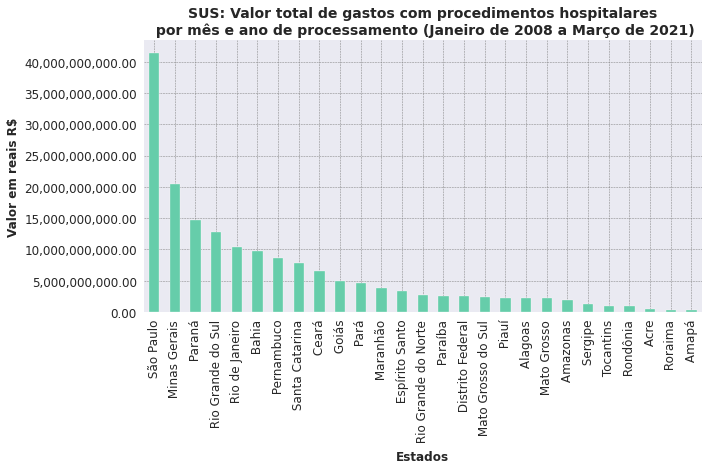

In [61]:

dados_processamento_sort = dados_processamento[['Unidade da Federação', 'Total']].sort_values(by = 'Total', ascending = False)
ax = dados_processamento_sort.plot(x='Unidade da Federação', y = 'Total', kind ="bar", figsize=(10,5), legend=None, color='mediumaquamarine')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}')) #alterar casas decimais e adicionar separador de milhares (,)
plt.title('SUS: Valor total de gastos com procedimentos hospitalares\n por mês e ano de processamento (Janeiro de 2008 a Março de 2021)', size=14, weight='bold')
plt.xlabel("Estados", size = 12, weight='bold')
plt.ylabel("Valor em reais R$", size = 12, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=90)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

Visualizando o gráfico de **gastos totais por processamento** é possível observar que os **Estados com maiores gastos hospitalares**, do período de janeiro de 2008 até março de 2021, foram **São Paulo, Minas Gerais e Paraná**. 

Visualização gráfica dos dados provenientes do **DataFrame por atendimento**, após passar por todos os processos de tratamento:

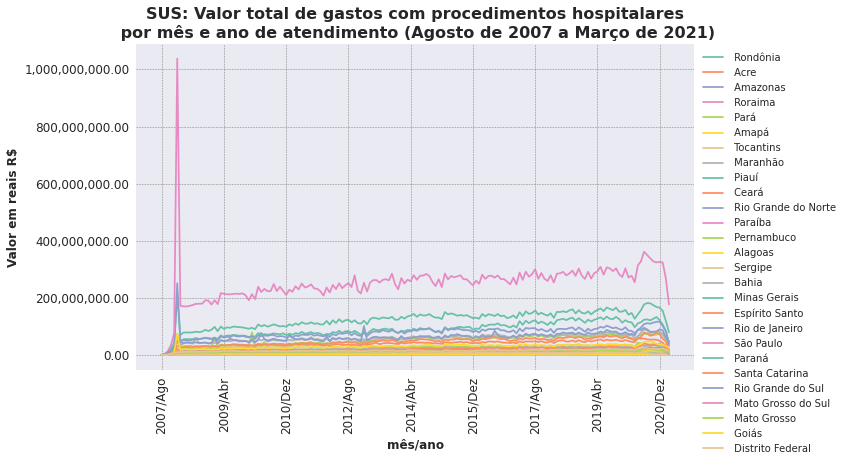

In [42]:
fig, ax = plt.subplots(figsize=(10,6)) 
sns.set_style('darkgrid') #mudar o estilo do fundo

sns.set_palette(sns.color_palette('Set2', 20)) #paleta de cores
 
usaveis_atendimento_drop.T.plot(ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}')) 
plt.title('SUS: Valor total de gastos com procedimentos hospitalares\n por mês e ano de atendimento (Agosto de 2007 a Março de 2021)', weight='bold', fontsize=16)
plt.xlabel('mês/ano', weight='bold', fontsize=12)
plt.ylabel('Valor em reais R$', weight='bold', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left')
plt.xticks(rotation=90)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.show()

Como podemos observar há algo muito estranho o início do gráfico, pois há um pico imenso no estado de São Paulo. 
Esse conjunto de dados quando foi gerado usou como data base 2008/janeiro. É a mesma data da criação da base de dados. Então, pode ser algum problema com essa base, como a forma que os dados foram incluídos no sistema. Portanto, algumas colunas iniciais serão retiradas:


In [43]:
#Para ordernar pelo valor total: adicionar novamente o valor Total.
usaveis_atendimento_drop['Total'] = usaveis_atendimento_drop.sum(axis=1)
usaveis_atendimento_drop.head()


2007/Ago  2007/Set  ...    2021/Mar         Total
Unidade da Federação                      ...                          
 Rondônia              4209.37  16397.03  ...  4732441.04  996410650.35
 Acre                 10470.07  14001.71  ...  1137341.65  450047246.65
 Amazonas             35752.72  45570.64  ...  6799060.80 1917245104.64
 Roraima               4785.91  11858.63  ...  2381844.31  328876551.40
 Pará                181159.29 433414.74  ... 13069564.31 4705290466.69

[5 rows x 165 columns]

In [44]:
atendimento_ordenado_por_total = usaveis_atendimento.sort_values('Total', ascending=False)
atendimento_ordenado_por_total = atendimento_ordenado_por_total.drop('Total', axis=1)
atendimento_ordenado_por_total.head()

2007/Ago   2007/Set  ...     2021/Fev     2021/Mar
Unidade da Federação                        ...                          
 São Paulo           1665349.90 4434168.64  ... 268193064.06 177408317.71
 Minas Gerais         971394.37 2861781.50  ... 119877417.15  79780838.00
 Paraná               554800.22 1431708.01  ...  83130175.37  43480729.07
 Rio Grande do Sul   1049252.33 3182913.14  ...  84404640.00  37798832.80
 Rio de Janeiro       469469.34  921646.57  ...  60873103.08  49149884.48

[5 rows x 164 columns]

In [45]:
#Retirando as 6 primeiras colunas:
colunas_interessadas = atendimento_ordenado_por_total.columns[6:]
atendimento_ordenado_por_total = atendimento_ordenado_por_total[colunas_interessadas]
atendimento_ordenado_por_total

2008/Fev     2008/Mar  ...     2021/Fev     2021/Mar
Unidade da Federação                            ...                          
 São Paulo           172961999.58 170556696.16  ... 268193064.06 177408317.71
 Minas Gerais         70301089.50  79119005.51  ... 119877417.15  79780838.00
 Paraná               48855046.46  55611791.07  ...  83130175.37  43480729.07
 Rio Grande do Sul    45897704.82  52928695.92  ...  84404640.00  37798832.80
 Rio de Janeiro       44128159.73  42900847.02  ...  60873103.08  49149884.48
 Bahia                33410124.06  41316672.72  ...  55544579.04  31314602.44
 Pernambuco           26222079.10  30716361.81  ...  62259409.32  39472738.81
 Santa Catarina       24409572.92  27483480.50  ...  47429335.91  19375822.56
 Ceará                27643304.86  30085370.22  ...  30186951.00  17173151.55
 Goiás                18149374.27  20992213.03  ...  32253788.65  24867001.02
 Pará                 20126081.01  22149375.82  ...  23343222.94  13069564.31
 Maranhão             13452263.93  14750895.33  ...  23260245.95  17294509.11
 Espírito Santo       10032886.43  12262049.08  ...  25669612.63  15606368.11
 Rio Grande do Norte   9110108.87  10126626.54  ...  18186942.80   8733455.36
 Paraíba              10871589.62  12348758.14  ...  16996494.03  12517894.05
 Distrito Federal     10215956.80  11627918.26  ...  19004029.87  14731938.43
 Mato Grosso do Sul    8279288.79   9793888.78  ...  11428462.42   4035989.77
 Piauí                 9711680.20  10428191.09  ...  13636005.36   9542151.53
 Alagoas               8112220.30   9210505.56  ...  12792571.64   8180887.21
 Mato Grosso           7929894.93   9416367.68  ...  13207979.82   8835890.09
 Amazonas              7934652.10   8641517.13  ...  13679358.06   6799060.80
 Sergipe               4636850.76   5017838.07  ...   4129845.36   3081081.42
 Tocantins             5051932.07   5200151.87  ...    416534.32    928756.84
 Rondônia              1940792.63   1955721.68  ...   6039419.59   4732441.04
 Acre                  1743978.66   2057439.02  ...   2272733.90   1137341.65
 Roraima                771687.83    876091.18  ...   3044798.77   2381844.31
 Amapá                 1275063.72   1177745.93  ...   1534733.18    989155.40

[27 rows x 158 columns]

Agora é possível plotar o gráfico sem aqueles picos que estavam aparecendo na data da criação do banco de dados:


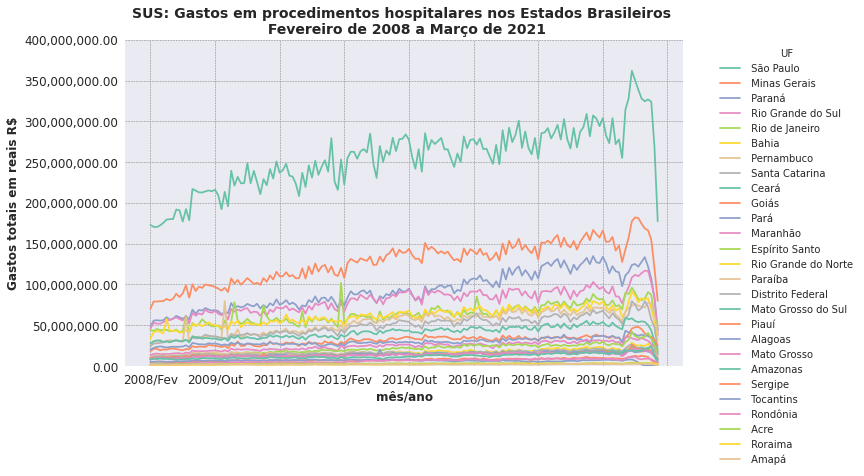

In [46]:
fig, ax = plt.subplots(figsize=(10,6)) 
sns.set_style('darkgrid')

sns.set_palette(sns.color_palette('Set2', 5))
atendimento_ordenado_por_total.T.plot(ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}')) 
plt.title('SUS: Valor total de gastos com procedimentos hospitalares por Unidade da Federação', weight='bold', fontsize=12)
plt.xlabel('mês/ano', weight='bold', fontsize=12)
plt.ylabel('Gastos totais em reais R$', weight='bold', fontsize=12)
plt.title('SUS: Gastos em procedimentos hospitalares nos Estados Brasileiros \n Fevereiro de 2008 a Março de 2021', weight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylim(0, 400000000.00)
plt.show()


Como temos todos os estados no mesmo gráfico a visualização fica comprometida. Portando, nas próximas etapas os dados serão analisados separadamente.

###**Quais Estados têm mais gastos totais hospitalares?**

Análise dos estados com maiores gastos:

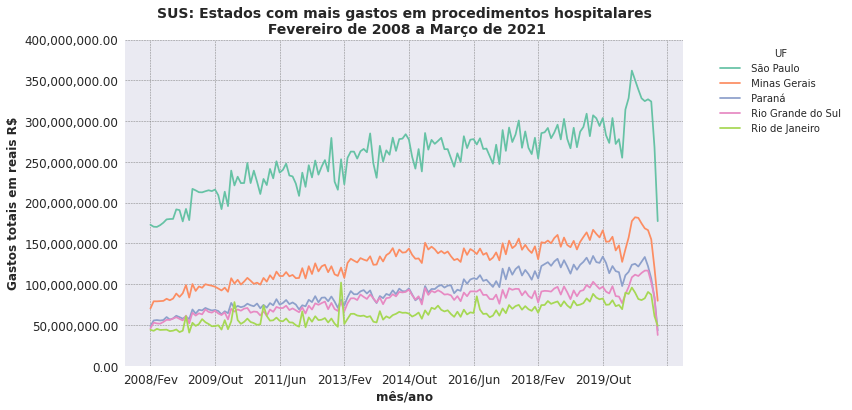

In [47]:
fig, ax = plt.subplots(figsize=(10,6)) 
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('Set2', 5))
atendimento_ordenado_por_total.head(5).T.plot(ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}')) 
plt.title('SUS: Estados com mais gastos em procedimentos hospitalares\n Fevereiro de 2008 a Março de 2021', weight='bold', fontsize=14)
plt.xlabel('mês/ano', weight='bold', fontsize=12)
plt.ylabel('Gastos totais em reais R$', weight='bold', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylim(0, 400000000.00)
plt.show()

Os **Estados** Brasileiros **com mais gastos em procedimentos hospitalares** são: **São Paulo, Minas Gerais, Paraná, Rio Grande do Sul e Rio de Janeiro**.
É importante pensarmos que a queda de gastos no final do gráfico, referente aos últimos meses, pode ser pelo fato dos gastos ainda não terem sido processados.

Já que São Paulo é o Estado com mais gastos hospitalares, será feita uma **análise da proporção dos gastos hospitalares de atendimentos em função de São Paulo** entre 2008 e 2021:

In [51]:
gastos_funcao_sp = pd.DataFrame(index = {'Unidade da Federação':atendimento_ordenado_por_total.index})

for i, col in atendimento_ordenado_por_total.iloc[:,:-1].items():
    info = pd.DataFrame(col/col[' São Paulo'])
    gastos_funcao_sp = pd.concat([gastos_funcao_sp, info], axis=1)

In [52]:
gastos_funcao_sp.dropna(inplace=True)
gastos_funcao_sp['Média de gastos em função de SP'] = gastos_funcao_sp.mean(axis=1)

In [53]:
gastos_funcao_sp

2008/Fev  ...  Média de gastos em função de SP
 São Paulo                1.00  ...                             1.00
 Minas Gerais             0.41  ...                             0.50
 Paraná                   0.28  ...                             0.36
 Rio Grande do Sul        0.27  ...                             0.31
 Rio de Janeiro           0.26  ...                             0.25
 Bahia                    0.19  ...                             0.24
 Pernambuco               0.15  ...                             0.21
 Santa Catarina           0.14  ...                             0.19
 Ceará                    0.16  ...                             0.16
 Goiás                    0.10  ...                             0.12
 Pará                     0.12  ...                             0.12
 Maranhão                 0.08  ...                             0.09
 Espírito Santo           0.06  ...                             0.08
 Rio Grande do Norte      0.05  ...                             0.07
 Paraíba                  0.06  ...                             0.06
 Distrito Federal         0.06  ...                             0.06
 Mato Grosso do Sul       0.05  ...                             0.06
 Piauí                    0.06  ...                             0.06
 Alagoas                  0.05  ...                             0.05
 Mato Grosso              0.05  ...                             0.05
 Amazonas                 0.05  ...                             0.05
 Sergipe                  0.03  ...                             0.03
 Tocantins                0.03  ...                             0.03
 Rondônia                 0.01  ...                             0.02
 Acre                     0.01  ...                             0.01
 Roraima                  0.00  ...                             0.01
 Amapá                    0.01  ...                             0.01

[27 rows x 158 columns]

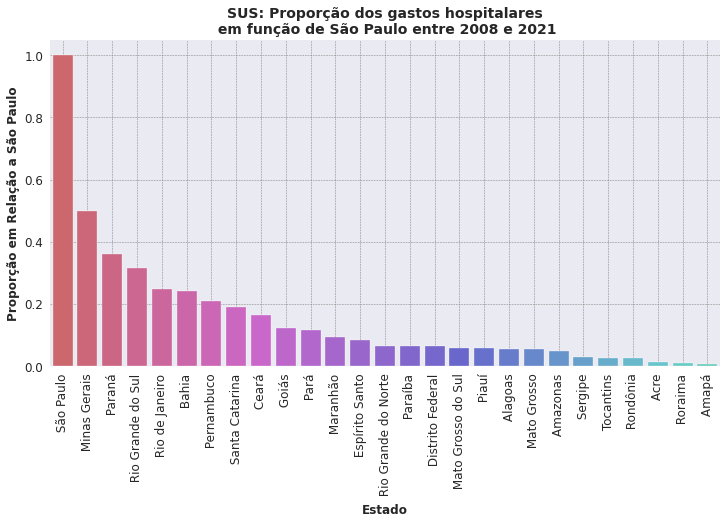

In [62]:
#Gráfico das proporções:
fig, ax = plt.subplots(figsize=(12,6)) 
sns.set_style('darkgrid')
sns.set_palette(list(reversed(sns.color_palette('hls',50))))
sns.barplot(gastos_funcao_sp.index, gastos_funcao_sp['Média de gastos em função de SP'])
plt.title('SUS: Proporção dos gastos hospitalares\n em função de São Paulo entre 2008 e 2021', weight='bold', fontsize=14)
plt.xlabel('Estado', weight='bold', fontsize=12)
plt.ylabel('Proporção em Relação a São Paulo', weight='bold', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

Esse gráfico nos mostra a proporção dos gastos hospitalares de cada Estado quando comparados aos gastos de São Paulo.
Adiante vamos ver a relação de gastos entre as regiões brasileiras e os gastos *per capita* em cada Estado. 

###**Qual a relação de gastos nas regiões brasileiras?**

####Região Sudeste

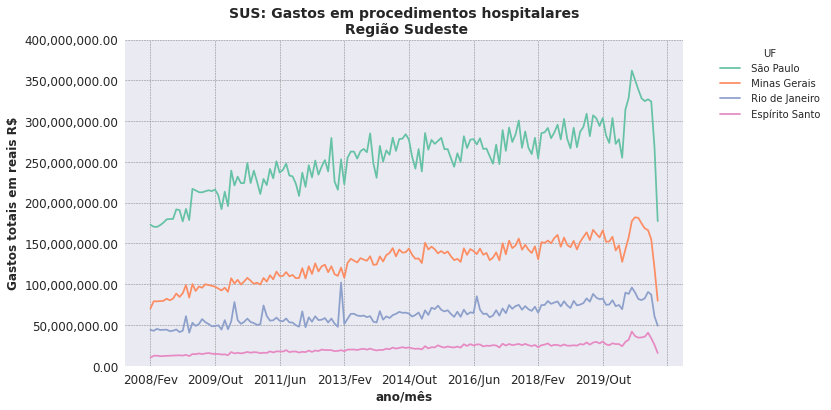

In [71]:
#Sudeste
fig, ax = plt.subplots(figsize=(10,6)) 
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('Set2', 7))
atendimento_ordenado_por_total.T[[' São Paulo', ' Minas Gerais', ' Rio de Janeiro', ' Espírito Santo']].plot(ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}')) 
plt.title('SUS: Valor total de gastos com procedimentos hospitalares por Unidade da Federação', weight='bold', fontsize=12)
plt.xlabel('ano/mês', weight='bold', fontsize=12)
plt.ylabel('Gastos totais em reais R$', weight='bold', fontsize=12)
plt.title('SUS: Gastos em procedimentos hospitalares\n Região Sudeste', weight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 400000000.00)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show() 

Na **região Sudeste**: **São Paulo** é o estado com **mais gastos** hospitalares, já que é o estado com a maior população do Brasil *(46.289.333 habitantes, segundo a última estimativa populacional do IBGE)*. Análises com o número da população serão mostrados adiante.
No **Rio de janeiro** pode-se destacar **picos de gastos** em alguns períodos como **final de 2009**, **fevereiro de 2013** e **junho de 2016**.
São Paulo, Minas Gerais e Espírito Santo apresentam maior pico de gastos em 2020.



####Região Sul

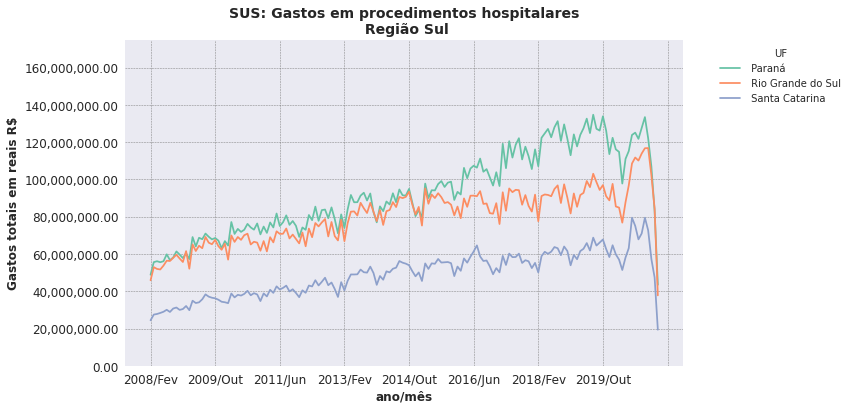

In [72]:
#Sul
fig, ax = plt.subplots(figsize=(10,6)) 
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('Set2', 7))
atendimento_ordenado_por_total.T[[' Paraná', ' Rio Grande do Sul', ' Santa Catarina']].plot(ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}')) 
plt.title('SUS: Valor total de gastos com procedimentos hospitalares por Unidade da Federação', weight='bold', fontsize=12)
plt.xlabel('ano/mês', weight='bold', fontsize=12)
plt.ylabel('Gastos totais em reais R$', weight='bold', fontsize=12)
plt.title('SUS: Gastos em procedimentos hospitalares\n Região Sul', weight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 175000000.00)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

Na **região Sul**: **Paraná e Rio Grande do Sul** tiveram **maiores gastos** no período analisado. No caso do **Paraná** há um **aumento crescente dos gastos**.
**Santa Catarina** é o estado com **menores gastos**, provavelmente por ter a população menor que os outros estados da região Sul:

- Paraná: 11.516.840 habitantes

- Rio Grande do Sul: 11.422.973 habitantes

- Santa Catarina: 7.252.502 habitantes

Fonte:
[IBGE - Estimativa populacional de 2020](https://ftp.ibge.gov.br/Estimativas_de_Populacao/Estimativas_2020/estimativa_dou_2020.pdf)

Rio Grande do Sul e Santa Catarina apresentam o maior período de gastos em 2020.

####Região Centro-Oeste

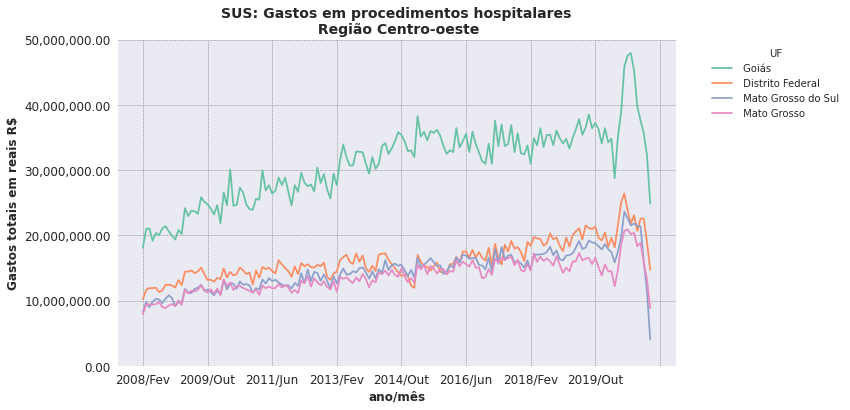

In [73]:
#Centro-oeste
fig, ax = plt.subplots(figsize=(10,6)) 
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('Set2', 7))
ax = atendimento_ordenado_por_total.T[[' Goiás', ' Distrito Federal', ' Mato Grosso do Sul', ' Mato Grosso']].plot(ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}')) 
plt.title('SUS: Valor total de gastos com procedimentos hospitalares por Unidade da Federação', weight='bold', fontsize=12)
plt.xlabel('ano/mês', weight='bold', fontsize=12)
plt.ylabel('Gastos totais em reais R$', weight='bold', fontsize=12)
plt.title('SUS: Gastos em procedimentos hospitalares\n Região Centro-oeste', weight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 50000000.00)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

Na **região Centro-oeste:** **Goiás** é o estado com **maiores gastos**. Enquanto isso, **Distrito Federal, Mato Grosso do Sul e Mato Grosso** estão com os **gastos extrementamente similares** ao longo do período analisado.
O que faz sentido, já que a estimativa populacional dos estados da Região Centro-Oeste é a seguinte:

- Goiás: 7.113.540 habitantes

- Distrito Federal: 3.055.149 habitantes

- Mato Grosso do Sul: 2.809.394 habitantes

- Mato Grosso: 3.526.220 habitantes

Fonte:
[IBGE - Estimativa populacional de 2020](https://ftp.ibge.gov.br/Estimativas_de_Populacao/Estimativas_2020/estimativa_dou_2020.pdf)

Todos os Estados apresentam picos de gastos em 2020, principalmente Goiás. 


####Região Norte

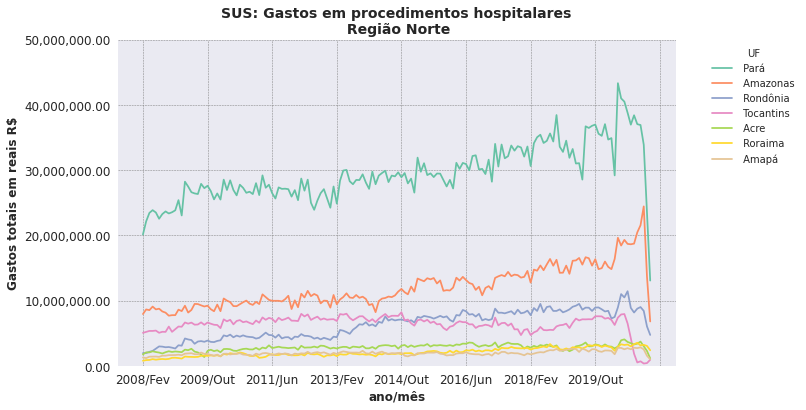

In [75]:
#Norte
fig, ax = plt.subplots(figsize=(10,6)) 
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('Set2', 7))
atendimento_ordenado_por_total.T[[' Pará', ' Amazonas', ' Rondônia', ' Tocantins', ' Acre', ' Roraima',' Amapá']].plot(ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}')) 
plt.xlabel('ano/mês', weight='bold', fontsize=12)
plt.ylabel('Gastos totais em reais R$', weight='bold', fontsize=12)
plt.title('SUS: Gastos em procedimentos hospitalares\n Região Norte', weight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 50000000.00)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

Na **região Norte**: **Pará** é o **estado com mais gastos** hospitalares. Pará e Amazonas possuem picos evidentes em 2020.
Se olharmos com atenção vamos notar que **Amazonas** possui um **aumento de gastos ao longo do tempo** analisado, **porém seus gastos estão próximos aos estados** Rondônia e Tocantins, que possuem uma **população consideravelmente menor** (aproximadamente 2,5 vezes menor):

- Pará: 8.690.745 habitantes

- Amazonas: 4.207.714 habitantes

- Rondônia: 1.796.460 habitantes

- Tocantins: 1.590.248 habitantes

- Acre: 894.470 habitantes

- Roraima: 631.181 habitantes

- Amapá: 861.773 habitantes

Fonte:
[IBGE - Estimativa populacional de 2020](https://ftp.ibge.gov.br/Estimativas_de_Populacao/Estimativas_2020/estimativa_dou_2020.pdf)

####Região Nordeste

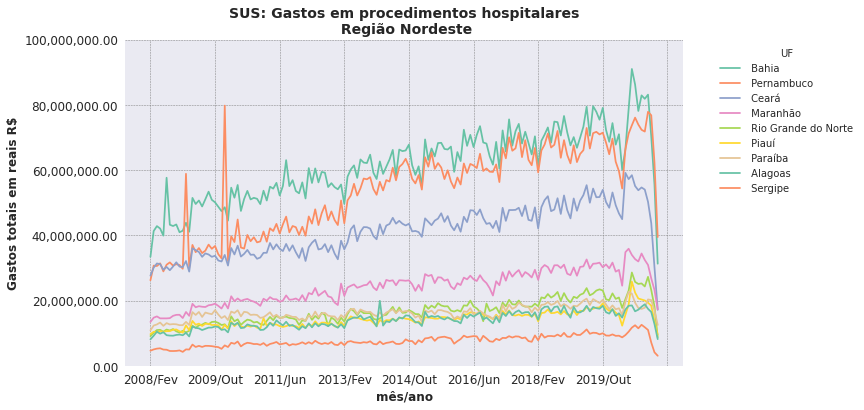

In [76]:
#Nordeste
fig, ax = plt.subplots(figsize=(10,6)) 
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('Paired', 9))
atendimento_ordenado_por_total.T[[' Bahia', ' Pernambuco',' Ceará', ' Maranhão', ' Rio Grande do Norte', ' Piauí', ' Paraíba',' Alagoas', ' Sergipe']].plot(ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}')) 
plt.xlabel('mês/ano', weight='bold', fontsize=12)
plt.ylabel('Gastos totais em reais R$', weight='bold', fontsize=12)
plt.title('SUS: Gastos em procedimentos hospitalares\n Região Nordeste', weight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 100000000.00)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

Na **região Nordeste**: **Bahia e Pernambuco** são os **estados com mais gastos hospitalares**.
Temos **picos** em destaque nesse gráfico: 

- **Bahia: em 2008**

- **Pernambuco: em 2008 e 2009**

- **Alagoas: em 2014**

- **Todos os Estados: em 2020**

O pico de Pernambuco em 2009 chama muita atenção, pois ele é um dos valores mais altos no gráfico. 
Sergipe é o estado menos populoso da região nordeste e por isso os gastos são tão baixos quando comparados aos outros estados da região. 


###**Os gastos totais são proporcionais ao tamanho populacional?**

Para verificar se os gastos totais são proporcionais ao tamanho populacional,  [os dados mais recentes (2020)](https://https://ftp.ibge.gov.br/Estimativas_de_Populacao/Estimativas_2020/estimativa_dou_2020.pdf) de estimativa populacional foram coletados. Como a estimativa do IBGE é feita por ano, vou utilizar um Dataframe de gastos totais por atendimento somente do ano 2020:

In [77]:
gastos_2020 = pd.read_csv('https://github.com/vqrca/bootcamp_alura_projeto_1/blob/main/Dados/gastos_2020_atendimento.csv?raw=True', encoding='ISO-8859-1', 
            skiprows=3, sep=';', skipfooter = 12, thousands='.', decimal =',')
gastos_2020.head()

Unidade da Federação 2008 2009 2010  ... 2018       2019        2020       Total
0          11 Rondônia    -    -    -  ...    -  158805.60  9087292.36  9246097.96
1              12 Acre    -    -    -  ...    -          -  3045245.80  3045245.80
2          13 Amazonas    -    -    -  ...    -          - 21129394.43 21129394.43
3           14 Roraima    -    -    -  ...    -          -  3401864.29  3401864.29
4              15 Pará    -    -    -  ...    -   35698.47 42157047.52 42192745.99

[5 rows x 15 columns]

In [78]:
gastos_2020['Unidade da Federação'] = gastos_2020['Unidade da Federação'].apply(lambda x: x[2:])
gastos_2020.head()

Unidade da Federação 2008 2009 2010  ... 2018       2019        2020       Total
0             Rondônia    -    -    -  ...    -  158805.60  9087292.36  9246097.96
1                 Acre    -    -    -  ...    -          -  3045245.80  3045245.80
2             Amazonas    -    -    -  ...    -          - 21129394.43 21129394.43
3              Roraima    -    -    -  ...    -          -  3401864.29  3401864.29
4                 Pará    -    -    -  ...    -   35698.47 42157047.52 42192745.99

[5 rows x 15 columns]

In [79]:
#Retirar anos com valores nulos:
gastos_2020_filt =gastos_2020.mean().index.tolist()
gastos_2020_filt.insert(0, 'Unidade da Federação') #inserir na posição 0
gastos_2020_filt

['Unidade da Federação', '2020', 'Total']

In [80]:
u2020 = gastos_2020[gastos_2020_filt]
u2020.head()

Unidade da Federação        2020       Total
0             Rondônia  9087292.36  9246097.96
1                 Acre  3045245.80  3045245.80
2             Amazonas 21129394.43 21129394.43
3              Roraima  3401864.29  3401864.29
4                 Pará 42157047.52 42192745.99

In [81]:
dados_2020_pronto = u2020.drop('Total', axis=1)
dados_2020_pronto 

Unidade da Federação         2020
0               Rondônia   9087292.36
1                   Acre   3045245.80
2               Amazonas  21129394.43
3                Roraima   3401864.29
4                   Pará  42157047.52
5                  Amapá   2009912.57
6              Tocantins   7424637.88
7               Maranhão  34741678.78
8                  Piauí  15164309.45
9                  Ceará  54722217.45
10   Rio Grande do Norte  21387479.34
11               Paraíba  17405875.81
12            Pernambuco  64014301.54
13               Alagoas  15273051.24
14               Sergipe   8038024.42
15                 Bahia  69239326.88
16          Minas Gerais 138898983.61
17        Espírito Santo  29031444.03
18        Rio de Janeiro  88025199.12
19             São Paulo 299329158.10
20                Paraná  96364958.00
21        Santa Catarina  57695648.75
22     Rio Grande do Sul  85828420.99
23    Mato Grosso do Sul  17296694.88
24           Mato Grosso  13128571.49
25                 Goiás  35075746.55
26      Distrito Federal  22695926.32

In [82]:
dados_2020_pronto = dados_2020_pronto.set_index('Unidade da Federação')
dados_2020_pronto

2020
Unidade da Federação             
 Rondônia              9087292.36
 Acre                  3045245.80
 Amazonas             21129394.43
 Roraima               3401864.29
 Pará                 42157047.52
 Amapá                 2009912.57
 Tocantins             7424637.88
 Maranhão             34741678.78
 Piauí                15164309.45
 Ceará                54722217.45
 Rio Grande do Norte  21387479.34
 Paraíba              17405875.81
 Pernambuco           64014301.54
 Alagoas              15273051.24
 Sergipe               8038024.42
 Bahia                69239326.88
 Minas Gerais        138898983.61
 Espírito Santo       29031444.03
 Rio de Janeiro       88025199.12
 São Paulo           299329158.10
 Paraná               96364958.00
 Santa Catarina       57695648.75
 Rio Grande do Sul    85828420.99
 Mato Grosso do Sul   17296694.88
 Mato Grosso          13128571.49
 Goiás                35075746.55
 Distrito Federal     22695926.32

As Estimativas populacionais para cada Estado foram obtidas no [IBGE](https//ftp.ibge.gov.br/Estimativas_de_Populacao/Estimativas_2020/estimativa_dou_2020.pdf), e eu criei uma lista com as estimativas seguindo a mesma ordem do DataFrame *dados_2020_pronto*:

In [84]:
populacao = [1796460, 894470, 4207714, 631181, 8690745, 861773, 1590248, 7114598, 3281480, 9187103, 3534165, 4039277, 9616621, 3351543,2318822, 14930634,
             21292666,4064052,17366189,46289333,11516840,7252502,11422973,2809394, 3526220,7113540,3055149]

Inserção da coluna 'População' com as estimativas populacionais contidas na lista *populacao*:

In [85]:
dados_2020_pronto['População'] = populacao
dados_2020_pronto

2020  População
Unidade da Federação                        
 Rondônia              9087292.36    1796460
 Acre                  3045245.80     894470
 Amazonas             21129394.43    4207714
 Roraima               3401864.29     631181
 Pará                 42157047.52    8690745
 Amapá                 2009912.57     861773
 Tocantins             7424637.88    1590248
 Maranhão             34741678.78    7114598
 Piauí                15164309.45    3281480
 Ceará                54722217.45    9187103
 Rio Grande do Norte  21387479.34    3534165
 Paraíba              17405875.81    4039277
 Pernambuco           64014301.54    9616621
 Alagoas              15273051.24    3351543
 Sergipe               8038024.42    2318822
 Bahia                69239326.88   14930634
 Minas Gerais        138898983.61   21292666
 Espírito Santo       29031444.03    4064052
 Rio de Janeiro       88025199.12   17366189
 São Paulo           299329158.10   46289333
 Paraná               96364958.00   11516840
 Santa Catarina       57695648.75    7252502
 Rio Grande do Sul    85828420.99   11422973
 Mato Grosso do Sul   17296694.88    2809394
 Mato Grosso          13128571.49    3526220
 Goiás                35075746.55    7113540
 Distrito Federal     22695926.32    3055149

Cálculo para verificar a Proporção dos gastos totais hospitalares por habitante em 2020:

    gastos em 2020/estimativa populacional de 2020

Inserção de uma nova coluna chamada 'Gastos/Habitantes' no Dataframe:



In [86]:
dados_2020_pronto['Gastos/Habitantes'] = dados_2020_pronto['2020']/dados_2020_pronto['População']
dados_2020_pronto.sort_values(by='Gastos/Habitantes', ascending=False, inplace=True) #Ordernar pelo maior valor
dados_2020_pronto

2020  População  Gastos/Habitantes
Unidade da Federação                                           
 Paraná               96364958.00   11516840               8.37
 Santa Catarina       57695648.75    7252502               7.96
 Rio Grande do Sul    85828420.99   11422973               7.51
 Distrito Federal     22695926.32    3055149               7.43
 Espírito Santo       29031444.03    4064052               7.14
 Pernambuco           64014301.54    9616621               6.66
 Minas Gerais        138898983.61   21292666               6.52
 São Paulo           299329158.10   46289333               6.47
 Mato Grosso do Sul   17296694.88    2809394               6.16
 Rio Grande do Norte  21387479.34    3534165               6.05
 Ceará                54722217.45    9187103               5.96
 Roraima               3401864.29     631181               5.39
 Rio de Janeiro       88025199.12   17366189               5.07
 Rondônia              9087292.36    1796460               5.06
 Amazonas             21129394.43    4207714               5.02
 Goiás                35075746.55    7113540               4.93
 Maranhão             34741678.78    7114598               4.88
 Pará                 42157047.52    8690745               4.85
 Tocantins             7424637.88    1590248               4.67
 Bahia                69239326.88   14930634               4.64
 Piauí                15164309.45    3281480               4.62
 Alagoas              15273051.24    3351543               4.56
 Paraíba              17405875.81    4039277               4.31
 Mato Grosso          13128571.49    3526220               3.72
 Sergipe               8038024.42    2318822               3.47
 Acre                  3045245.80     894470               3.40
 Amapá                 2009912.57     861773               2.33

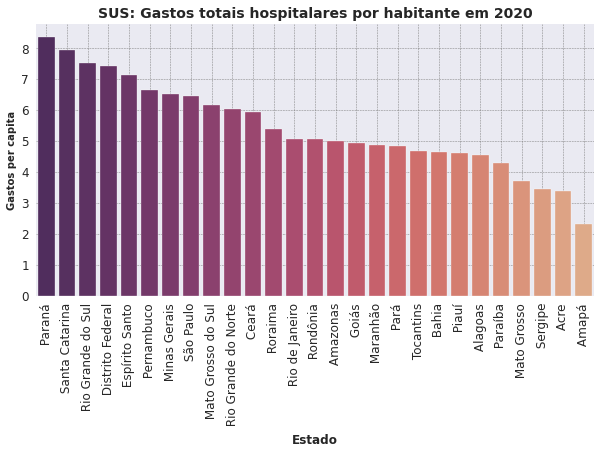

In [87]:
fig, ax = plt.subplots(figsize=(10,5)) 
sns.set_style('darkgrid')
sns.set_palette(list(reversed(sns.color_palette('flare', 27))))

sns.barplot(dados_2020_pronto.index, dados_2020_pronto['Gastos/Habitantes'])

#Plotando as legendas e mudando o tamanho das fontes
plt.title('SUS: Gastos totais hospitalares por habitante em 2020', fontsize=14, weight='bold')
plt.xlabel('Estado', fontsize=12, weight='bold')
plt.ylabel('Gastos per capita', fontsize=10, weight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

Como podemos observar no gráfico acima os gastos por habitantes não foram distribuídos na mesma proporção para todos os Estados em 2020. Os **Estados que mais gastaram por número de habitantes** foram: **Paraná, Santa Catarina e Rio Grande do Sul**. Os **Estados que menos gastaram por número de habitantes** foram **Sergipe, Acre e Amapá**. 
Outro destaque desse gráfico é o **Rio de Janeiro**, que **não segue o mesmo padrão de gastos por habitantes observados nos outros Estados da região Sudeste** e está com os gastos próximos a Rondônia e Amazonas. 

###**Há picos de gastos em períodos associados com surtos de doenças?**

**2008 - Bahia**

- [Aumento nos casos de Meningite](https://periodicos.ufba.br/index.php/cmbio/article/view/20325/16425)
- [Surto de doença de Chagas aguda associada à transmissão oral](https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0037-86822008000300014&lng=en&nrm=iso&tlng=en)
- [Dengue (32.335 casos notificados)](http://bvsms.saude.gov.br/bvs/pacsaude/not_24082009.php#:~:text=Neste%20intervalo%2C%20em%202009%2C%20foram,queda%20(96%2C2%25).) 

**2008 - Pernambuco**
- [Dengue (37.695 casos notificados)](http://bvsms.saude.gov.br/bvs/pacsaude/not_24082009.php#:~:text=Neste%20intervalo%2C%20em%202009%2C%20foram,queda%20(96%2C2%25).) 

**2008 - Rio de Janeiro**
- [Dengue (248.769 casos notificados)](http://bvsms.saude.gov.br/bvs/pacsaude/not_24082009.php#:~:text=Neste%20intervalo%2C%20em%202009%2C%20foram,queda%20(96%2C2%25).) 

**2009 - Pernambuco**
- O estado de Pernambuco notificou, em 2009 e 2010, 631 casos de Influenza, sendo 166 casos confirmados para influenza pandêmica H1N1 2009. 

- Em 2009, o estado de Pernambuco notificou
501 casos de leishmaniose tegumentar americana, com coeficiente de detecção de 5,7 casos por 100.000 habitantes.

Fonte: [Sistema Nacional de Vigilância em Saúde - Relatório de Situação](http://bvsms.saude.gov.br/bvs/publicacoes/sistema_nacional_vigilancia_saude_pe_5ed.pdf)

**2013 - Rio de Janeiro**
- [Casos de Dengue](https://info.dengue.mat.br/alerta/rio/dengue)

**2014 - Alagoas**

- [Casos de Dengue](https://g1.globo.com/al/alagoas/noticia/2014/11/casos-de-dengue-em-2014-em-al-ja-superam-numero-registrado-em-2013.html)


**2016 - Rio de Janeiro**
- [Casos de Dengue](https://info.dengue.mat.br/alerta/rio/dengue)

**2019 - Rio de Janeiro**
- Casos de Dengue. O Estado registrou 14.648 pessoas infectadas com o vírus da dengue entre março e junho de 2019.

- Casos de Chikungunya

- Casos de Zika vírus 

[Matéria - G1 Globo comparando 2019 com 2020](https://g1.globo.com/rj/rio-de-janeiro/noticia/2020/07/02/casos-de-dengue-chikungunya-e-zika-tem-quedas-de-ate-993percent-no-rio-especialista-e-sms-dizem-que-isolamento-social-ajudou.ghtml)

**2020 - Em todos os Estados**
- [Pandemia do novo coronavírus (SARS-CoV-2)](https://covid.saude.gov.br/)

Os primeiros casos de SARS-CoV-2 foram detectados em fevereiro de 2020. Já estamos em maio de 2021 e até o momento a pandemia não foi controlada.
Até o momento (23/05/21), temos 16.047.439 de casos confirmados e 448.208 óbitos.

Durante esse período várias cidades tiveram o sistema de saúde colapsado, pois não havia disponibilidade de UTIs para internação. 

De acordo com a [Friocruz](https://portal.fiocruz.br/noticia/observatorio-covid-19-aponta-maior-colapso-sanitario-e-hospitalar-da-historia-do-brasil), trata-se do maior colapso sanitário e hospitalar da história do Brasil.

A imagem abaixo representa a taxa de ocupação (%) de leitos de UTI para pacientes adultos acometidos pela SARS-CoV-2, no período de julho de 2020 até março de 2021:

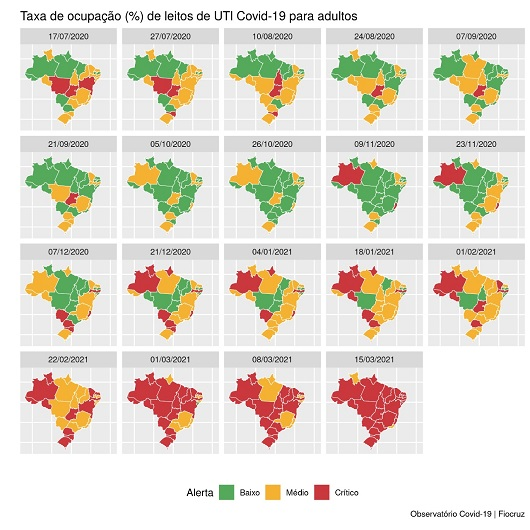
Fonte: Fiocruz 



#**Parte II - Análise do número de internações em todos os Estados Brasileiros**

##**Importando os dados**

In [88]:
internacoes_ano = pd.read_csv('https://github.com/vqrca/bootcamp_alura_projeto_1/blob/main/Dados/internacoes_ano_atendimento.csv?raw=True', 
                           encoding='ISO-8859-1',skiprows=3, sep='';', skipfooter = 12)

media_permanencia = pd.read_csv('https://github.com/vqrca/bootcamp_alura_projeto_1/blob/main/Dados/internacoes_media_permanencia_processamento_ano.csv?raw=True', 
                           encoding='ISO-8859-1',skiprows=3, sep=';', skipfooter = 12, decimal ='',' )

##**Estrutura dos dados**

####**Internações por ano**

In [89]:
internacoes_ano

Unidade da Federação    2007     2008  ...     2020    2021     Total
0              11 Rondônia    2376    73088  ...   101902   14106   1387140
1                  12 Acre    2187    49010  ...    42431    8274    637069
2              13 Amazonas   13459   165614  ...   181192   33377   2248754
3               14 Roraima    2035    25560  ...    38942    8365    465989
4                  15 Pará   37857   507219  ...   431692   72474   6479075
5                 16 Amapá    2760    33113  ...    34381    5950    478668
6             17 Tocantins    6421    98558  ...    56424    1563   1177323
7              21 Maranhão   24664   325629  ...   388853   68730   5374355
8                 22 Piauí   12007   225907  ...   184006   34558   2871888
9                 23 Ceará   18737   492674  ...   450624   70693   6341079
10  24 Rio Grande do Norte   10294   161497  ...   159378   28094   2192512
11              25 Paraíba   10973   223310  ...   154416   31044   2598201
12           26 Pernambuco   35172   491204  ...   486987   97967   7007333
13              27 Alagoas    7565   179536  ...   143419   30386   2238491
14              28 Sergipe    5084    99867  ...    85621   12812   1224414
15                29 Bahia   22319   847075  ...   694367  116872  10893833
16         31 Minas Gerais   72046  1122740  ...  1107477  201651  15561580
17       32 Espírito Santo   11472   183888  ...   223242   38552   2896809
18       33 Rio de Janeiro   29525   642573  ...   649307  126951   8705876
19            35 São Paulo  100043  2202033  ...  2204269  466466  31150267
20               41 Paraná   45779   735004  ...   734631  119961  10352114
21       42 Santa Catarina   24844   373379  ...   430343   73234   5728232
22    43 Rio Grande do Sul   44375   719203  ...   663214  121898   9708322
23   50 Mato Grosso do Sul    9979   153622  ...   153661   20966   2137794
24          51 Mato Grosso   11471   174477  ...   166993   29183   2421359
25                52 Goiás   23122   357921  ...   303337   53267   4532259
26     53 Distrito Federal   16396   184851  ...   208415   43529   2559110

[27 rows x 17 columns]

In [90]:
internacoes_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unidade da Federação  27 non-null     object
 1   2007                  27 non-null     int64 
 2   2008                  27 non-null     int64 
 3   2009                  27 non-null     int64 
 4   2010                  27 non-null     int64 
 5   2011                  27 non-null     int64 
 6   2012                  27 non-null     int64 
 7   2013                  27 non-null     int64 
 8   2014                  27 non-null     int64 
 9   2015                  27 non-null     int64 
 10  2016                  27 non-null     int64 
 11  2017                  27 non-null     int64 
 12  2018                  27 non-null     int64 
 13  2019                  27 non-null     int64 
 14  2020                  27 non-null     int64 
 15  2021                  27 non-null     int6

Neste DataFrame temos o número de internações por unidade da federação por ano desde de 2007 até Março de 2021. 
A última coluna representa os valores totais para todo o período.

####**Internações - tempo médio de permanência**

In [91]:
media_permanencia

Unidade da Federação  2008  2009  2010  ...  2019  2020  2021  Total
0              11 Rondônia  3.70  3.70  3.90  ...  4.80  4.70  5.30   4.40
1                  12 Acre  4.40  4.40  4.40  ...  4.90  4.80  5.10   4.70
2              13 Amazonas  4.70  4.80  4.80  ...  5.20  5.30  5.60   5.10
3               14 Roraima  4.80  4.70  5.10  ...  5.80  5.80  6.30   5.20
4                  15 Pará  3.70  3.70  3.70  ...  4.10  4.20  4.30   3.90
5                 16 Amapá  4.90  4.70  4.70  ...  5.30  5.00  5.20   5.10
6             17 Tocantins  4.60  4.60  4.40  ...  5.60  5.20  3.70   4.70
7              21 Maranhão  4.80  4.70  4.40  ...  4.60  4.90  5.30   4.60
8                 22 Piauí  4.40  4.30  4.10  ...  4.90  4.90  5.00   4.50
9                 23 Ceará  5.00  5.10  5.10  ...  5.60  5.70  6.00   5.40
10  24 Rio Grande do Norte  5.60  5.60  5.70  ...  5.80  5.70  5.70   5.80
11              25 Paraíba  5.00  5.10  5.20  ...  5.60  5.70  5.90   5.50
12           26 Pernambuco  6.70  6.60  6.20  ...  5.50  5.60  5.60   5.90
13              27 Alagoas  5.20  5.50  5.40  ...  5.30  5.60  5.50   5.40
14              28 Sergipe  4.60  4.90  5.30  ...  5.80  5.80  5.50   5.20
15                29 Bahia  4.30  4.30  4.30  ...  4.60  4.80  5.00   4.60
16         31 Minas Gerais  5.70  5.70  5.70  ...  5.10  5.10  5.20   5.40
17       32 Espírito Santo  5.90  5.80  5.70  ...  4.80  5.00  5.40   5.30
18       33 Rio de Janeiro  9.70  9.50  9.30  ...  7.30  7.30  6.80   8.50
19            35 São Paulo  7.00  6.90  6.80  ...  5.50  5.80  6.00   6.30
20               41 Paraná  5.20  5.00  5.10  ...  4.30  4.60  5.00   4.80
21       42 Santa Catarina  5.60  5.60  5.50  ...  4.50  4.70  5.10   5.10
22    43 Rio Grande do Sul  5.80  5.90  6.00  ...  6.10  6.10  6.40   6.10
23   50 Mato Grosso do Sul  4.70  4.70  4.80  ...  4.60  4.90  5.10   4.80
24          51 Mato Grosso  4.20  4.40  4.50  ...  4.50  4.50  4.70   4.50
25                52 Goiás  5.00  5.10  5.10  ...  4.80  5.10  5.40   5.00
26     53 Distrito Federal  6.30  6.40  6.70  ...  5.80  5.50  5.60   6.30

[27 rows x 16 columns]

In [92]:
media_permanencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unidade da Federação  27 non-null     object 
 1   2008                  27 non-null     float64
 2   2009                  27 non-null     float64
 3   2010                  27 non-null     float64
 4   2011                  27 non-null     float64
 5   2012                  27 non-null     float64
 6   2013                  27 non-null     float64
 7   2014                  27 non-null     float64
 8   2015                  27 non-null     float64
 9   2016                  27 non-null     float64
 10  2017                  27 non-null     float64
 11  2018                  27 non-null     float64
 12  2019                  27 non-null     float64
 13  2020                  27 non-null     float64
 14  2021                  27 non-null     float64
 15  Total                 27 

Neste DataFrame temos o número o tempo médio de permanência das internações por unidade da federação por ano desde  2008 até 2021 (Lembrando que 2021 só contém dados até março). A última coluna representa os valores totais para todo o período.

## **Análise exploratória dos dados**

####**Internações por ano**

In [93]:
internacoes_ano.describe()

2007       2008       2009  ...       2020      2021       Total
count     27.00      27.00      27.00  ...      27.00     27.00       27.00
mean   22331.93  401798.22  411471.59  ...  388130.52  71515.67  5532216.52
std    22600.11  455359.97  465938.67  ...  449907.22  92436.25  6374461.77
min     2035.00   25560.00   28860.00  ...   34381.00   1563.00   465989.00
25%     8772.00  157559.50  156765.50  ...  148540.00  24530.00  2165153.00
50%    13459.00  223310.00  234216.00  ...  208415.00  38552.00  2871888.00
75%    27184.50  499946.50  512698.00  ...  468805.50  85600.50  6743204.00
max   100043.00 2202033.00 2269176.00  ... 2204269.00 466466.00 31150267.00

[8 rows x 16 columns]

A média das internações está consideravelmente mais baixa em 2007. Portanto, será necessário retirar essa coluna.

####**Internações - tempo médio de permanência**

In [94]:
media_permanencia.describe()

2008  2009  2010  2011  2012  2013  ...  2017  2018  2019  2020  2021  Total
count 27.00 27.00 27.00 27.00 27.00 27.00  ... 27.00 27.00 27.00 27.00 27.00  27.00
mean   5.24  5.25  5.26  5.28  5.32  5.30  ...  5.26  5.21  5.21  5.27  5.40   5.26
std    1.20  1.17  1.13  1.09  1.08  1.05  ...  0.75  0.71  0.68  0.63  0.63   0.88
min    3.70  3.70  3.70  3.70  3.80  3.80  ...  4.10  4.10  4.10  4.20  3.70   3.90
25%    4.60  4.65  4.45  4.55  4.60  4.75  ...  4.80  4.75  4.70  4.85  5.10   4.70
50%    5.00  5.00  5.10  5.20  5.10  5.20  ...  5.20  5.10  5.20  5.10  5.40   5.10
75%    5.65  5.65  5.70  5.55  5.65  5.65  ...  5.65  5.60  5.60  5.70  5.65   5.45
max    9.70  9.50  9.30  9.20  9.20  9.20  ...  8.10  7.60  7.30  7.30  6.80   8.50

[8 rows x 15 columns]

Neste Dataframe não temos dados nulos e não será necessário retirar nenhuma coluna referente aos anos.

##**Tratamento da base de dados**

####**Internações por ano**

Retirar números que estão antes do nome de cada Estado na coluna 'Unidade da Federaçao'

In [95]:
internacoes_ano['Unidade da Federação'] = internacoes_ano['Unidade da Federação'].apply(lambda x: x[2:])
internacoes_ano

Unidade da Federação    2007     2008  ...     2020    2021     Total
0               Rondônia    2376    73088  ...   101902   14106   1387140
1                   Acre    2187    49010  ...    42431    8274    637069
2               Amazonas   13459   165614  ...   181192   33377   2248754
3                Roraima    2035    25560  ...    38942    8365    465989
4                   Pará   37857   507219  ...   431692   72474   6479075
5                  Amapá    2760    33113  ...    34381    5950    478668
6              Tocantins    6421    98558  ...    56424    1563   1177323
7               Maranhão   24664   325629  ...   388853   68730   5374355
8                  Piauí   12007   225907  ...   184006   34558   2871888
9                  Ceará   18737   492674  ...   450624   70693   6341079
10   Rio Grande do Norte   10294   161497  ...   159378   28094   2192512
11               Paraíba   10973   223310  ...   154416   31044   2598201
12            Pernambuco   35172   491204  ...   486987   97967   7007333
13               Alagoas    7565   179536  ...   143419   30386   2238491
14               Sergipe    5084    99867  ...    85621   12812   1224414
15                 Bahia   22319   847075  ...   694367  116872  10893833
16          Minas Gerais   72046  1122740  ...  1107477  201651  15561580
17        Espírito Santo   11472   183888  ...   223242   38552   2896809
18        Rio de Janeiro   29525   642573  ...   649307  126951   8705876
19             São Paulo  100043  2202033  ...  2204269  466466  31150267
20                Paraná   45779   735004  ...   734631  119961  10352114
21        Santa Catarina   24844   373379  ...   430343   73234   5728232
22     Rio Grande do Sul   44375   719203  ...   663214  121898   9708322
23    Mato Grosso do Sul    9979   153622  ...   153661   20966   2137794
24           Mato Grosso   11471   174477  ...   166993   29183   2421359
25                 Goiás   23122   357921  ...   303337   53267   4532259
26      Distrito Federal   16396   184851  ...   208415   43529   2559110

[27 rows x 17 columns]

In [96]:
internacoes_ano.mean().index

Index(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', 'Total'],
      dtype='object')

In [97]:
#Retirar a coluna de 2007:
usaveis_ano =internacoes_ano.drop('2007', axis=1)
usaveis_ano

Unidade da Federação     2008     2009  ...     2020    2021     Total
0               Rondônia    73088    96612  ...   101902   14106   1387140
1                   Acre    49010    46359  ...    42431    8274    637069
2               Amazonas   165614   155100  ...   181192   33377   2248754
3                Roraima    25560    28860  ...    38942    8365    465989
4                   Pará   507219   528358  ...   431692   72474   6479075
5                  Amapá    33113    37333  ...    34381    5950    478668
6              Tocantins    98558   100278  ...    56424    1563   1177323
7               Maranhão   325629   362117  ...   388853   68730   5374355
8                  Piauí   225907   238843  ...   184006   34558   2871888
9                  Ceará   492674   492035  ...   450624   70693   6341079
10   Rio Grande do Norte   161497   166786  ...   159378   28094   2192512
11               Paraíba   223310   234216  ...   154416   31044   2598201
12            Pernambuco   491204   497038  ...   486987   97967   7007333
13               Alagoas   179536   177656  ...   143419   30386   2238491
14               Sergipe    99867    92960  ...    85621   12812   1224414
15                 Bahia   847075   875609  ...   694367  116872  10893833
16          Minas Gerais  1122740  1110909  ...  1107477  201651  15561580
17        Espírito Santo   183888   191030  ...   223242   38552   2896809
18        Rio de Janeiro   642573   642807  ...   649307  126951   8705876
19             São Paulo  2202033  2269176  ...  2204269  466466  31150267
20                Paraná   735004   764001  ...   734631  119961  10352114
21        Santa Catarina   373379   389299  ...   430343   73234   5728232
22     Rio Grande do Sul   719203   729375  ...   663214  121898   9708322
23    Mato Grosso do Sul   153622   158431  ...   153661   20966   2137794
24           Mato Grosso   174477   177585  ...   166993   29183   2421359
25                 Goiás   357921   361816  ...   303337   53267   4532259
26      Distrito Federal   184851   185144  ...   208415   43529   2559110

[27 rows x 16 columns]

In [98]:
#Deixar 'Unidade da Federação' como index:
usaveis_ano = usaveis_ano.set_index('Unidade da Federação')
usaveis_ano

2008     2009     2010  ...     2020    2021     Total
Unidade da Federação                             ...                           
 Rondônia               73088    96612   100443  ...   101902   14106   1387140
 Acre                   49010    46359    49778  ...    42431    8274    637069
 Amazonas              165614   155100   161830  ...   181192   33377   2248754
 Roraima                25560    28860    32827  ...    38942    8365    465989
 Pará                  507219   528358   528658  ...   431692   72474   6479075
 Amapá                  33113    37333    36458  ...    34381    5950    478668
 Tocantins              98558   100278   103059  ...    56424    1563   1177323
 Maranhão              325629   362117   395304  ...   388853   68730   5374355
 Piauí                 225907   238843   233769  ...   184006   34558   2871888
 Ceará                 492674   492035   487049  ...   450624   70693   6341079
 Rio Grande do Norte   161497   166786   172370  ...   159378   28094   2192512
 Paraíba               223310   234216   231920  ...   154416   31044   2598201
 Pernambuco            491204   497038   515899  ...   486987   97967   7007333
 Alagoas               179536   177656   180977  ...   143419   30386   2238491
 Sergipe                99867    92960    93524  ...    85621   12812   1224414
 Bahia                 847075   875609   886578  ...   694367  116872  10893833
 Minas Gerais         1122740  1110909  1136979  ...  1107477  201651  15561580
 Espírito Santo        183888   191030   195450  ...   223242   38552   2896809
 Rio de Janeiro        642573   642807   666324  ...   649307  126951   8705876
 São Paulo            2202033  2269176  2339758  ...  2204269  466466  31150267
 Paraná                735004   764001   784951  ...   734631  119961  10352114
 Santa Catarina        373379   389299   389198  ...   430343   73234   5728232
 Rio Grande do Sul     719203   729375   722331  ...   663214  121898   9708322
 Mato Grosso do Sul    153622   158431   163411  ...   153661   20966   2137794
 Mato Grosso           174477   177585   180163  ...   166993   29183   2421359
 Goiás                 357921   361816   371237  ...   303337   53267   4532259
 Distrito Federal      184851   185144   186895  ...   208415   43529   2559110

[27 rows x 15 columns]

In [99]:
#Retirar a coluna 'Total':
usaveis_ano2 =usaveis_ano.drop('Total', axis=1)
usaveis_ano2

2008     2009     2010  ...     2019     2020    2021
Unidade da Federação                             ...                          
 Rondônia               73088    96612   100443  ...   122292   101902   14106
 Acre                   49010    46359    49778  ...    44803    42431    8274
 Amazonas              165614   155100   161830  ...   195873   181192   33377
 Roraima                25560    28860    32827  ...    44720    38942    8365
 Pará                  507219   528358   528658  ...   482673   431692   72474
 Amapá                  33113    37333    36458  ...    40300    34381    5950
 Tocantins              98558   100278   103059  ...    82688    56424    1563
 Maranhão              325629   362117   395304  ...   460761   388853   68730
 Piauí                 225907   238843   233769  ...   220226   184006   34558
 Ceará                 492674   492035   487049  ...   527009   450624   70693
 Rio Grande do Norte   161497   166786   172370  ...   181806   159378   28094
 Paraíba               223310   234216   231920  ...   188245   154416   31044
 Pernambuco            491204   497038   515899  ...   582225   486987   97967
 Alagoas               179536   177656   180977  ...   172904   143419   30386
 Sergipe                99867    92960    93524  ...    96486    85621   12812
 Bahia                 847075   875609   886578  ...   846002   694367  116872
 Minas Gerais         1122740  1110909  1136979  ...  1278742  1107477  201651
 Espírito Santo        183888   191030   195450  ...   249787   223242   38552
 Rio de Janeiro        642573   642807   666324  ...   729724   649307  126951
 São Paulo            2202033  2269176  2339758  ...  2527777  2204269  466466
 Paraná                735004   764001   784951  ...   887744   734631  119961
 Santa Catarina        373379   389299   389198  ...   508575   430343   73234
 Rio Grande do Sul     719203   729375   722331  ...   768181   663214  121898
 Mato Grosso do Sul    153622   158431   163411  ...   176518   153661   20966
 Mato Grosso           174477   177585   180163  ...   196015   166993   29183
 Goiás                 357921   361816   371237  ...   342388   303337   53267
 Distrito Federal      184851   185144   186895  ...   230975   208415   43529

[27 rows x 14 columns]

In [100]:
#Transposição do DataFrame:
usaveis_ano2.T

Unidade da Federação   Rondônia   Acre  ...   Goiás   Distrito Federal
2008                      73088  49010  ...  357921             184851
2009                      96612  46359  ...  361816             185144
2010                     100443  49778  ...  371237             186895
2011                      97936  52112  ...  352880             187789
2012                      95786  52766  ...  329904             187228
2013                     107352  51771  ...  349089             187197
2014                     116967  52201  ...  351106             179459
2015                     111617  48244  ...  350792             167812
2016                     110906  46563  ...  326774             187892
2017                     114784  45417  ...  330721             198415
2018                     120973  45153  ...  327905             207113
2019                     122292  44803  ...  342388             230975
2020                     101902  42431  ...  303337             208415
2021                      14106   8274  ...   53267              43529

[14 rows x 27 columns]

Será necessário retirar o ano 2021 também, pois como os dados estão parciais (somente até março) essa coluna está muito discrepante quando comparada aos outros anos).

In [101]:
#Retirar a coluna '2021':
usaveis_ano3 = usaveis_ano2.T.drop('2021', axis=0)
usaveis_ano3

Unidade da Federação   Rondônia   Acre  ...   Goiás   Distrito Federal
2008                      73088  49010  ...  357921             184851
2009                      96612  46359  ...  361816             185144
2010                     100443  49778  ...  371237             186895
2011                      97936  52112  ...  352880             187789
2012                      95786  52766  ...  329904             187228
2013                     107352  51771  ...  349089             187197
2014                     116967  52201  ...  351106             179459
2015                     111617  48244  ...  350792             167812
2016                     110906  46563  ...  326774             187892
2017                     114784  45417  ...  330721             198415
2018                     120973  45153  ...  327905             207113
2019                     122292  44803  ...  342388             230975
2020                     101902  42431  ...  303337             208415

[13 rows x 27 columns]

In [102]:
usaveis_ano_ord = usaveis_ano3.T
usaveis_ano_ord.head()

2008    2009    2010  ...    2018    2019    2020
Unidade da Federação                          ...                        
 Rondônia              73088   96612  100443  ...  120973  122292  101902
 Acre                  49010   46359   49778  ...   45153   44803   42431
 Amazonas             165614  155100  161830  ...  186073  195873  181192
 Roraima               25560   28860   32827  ...   43462   44720   38942
 Pará                 507219  528358  528658  ...  493685  482673  431692

[5 rows x 13 columns]

Ordenar Estados pelo número total de internações:

In [103]:
usaveis_ano_ord ['Total'] = usaveis_ano_ord.sum(axis=1)
usaveis_ano_ord

2008     2009     2010  ...     2019     2020     Total
Unidade da Federação                             ...                            
 Rondônia               73088    96612   100443  ...   122292   101902   1370658
 Acre                   49010    46359    49778  ...    44803    42431    626608
 Amazonas              165614   155100   161830  ...   195873   181192   2201918
 Roraima                25560    28860    32827  ...    44720    38942    455589
 Pará                  507219   528358   528658  ...   482673   431692   6368744
 Amapá                  33113    37333    36458  ...    40300    34381    469958
 Tocantins              98558   100278   103059  ...    82688    56424   1169339
 Maranhão              325629   362117   395304  ...   460761   388853   5280961
 Piauí                 225907   238843   233769  ...   220226   184006   2825323
 Ceará                 492674   492035   487049  ...   527009   450624   6251649
 Rio Grande do Norte   161497   166786   172370  ...   181806   159378   2154124
 Paraíba               223310   234216   231920  ...   188245   154416   2556184
 Pernambuco            491204   497038   515899  ...   582225   486987   6874194
 Alagoas               179536   177656   180977  ...   172904   143419   2200540
 Sergipe                99867    92960    93524  ...    96486    85621   1206518
 Bahia                 847075   875609   886578  ...   846002   694367  10754642
 Minas Gerais         1122740  1110909  1136979  ...  1278742  1107477  15287883
 Espírito Santo        183888   191030   195450  ...   249787   223242   2846785
 Rio de Janeiro        642573   642807   666324  ...   729724   649307   8549400
 São Paulo            2202033  2269176  2339758  ...  2527777  2204269  30583758
 Paraná                735004   764001   784951  ...   887744   734631  10186374
 Santa Catarina        373379   389299   389198  ...   508575   430343   5630154
 Rio Grande do Sul     719203   729375   722331  ...   768181   663214   9542049
 Mato Grosso do Sul    153622   158431   163411  ...   176518   153661   2106849
 Mato Grosso           174477   177585   180163  ...   196015   166993   2380705
 Goiás                 357921   361816   371237  ...   342388   303337   4455870
 Distrito Federal      184851   185144   186895  ...   230975   208415   2499185

[27 rows x 14 columns]

In [105]:
ano_por_total = usaveis_ano_ord.sort_values('Total', ascending=False)
ano_por_total

2008     2009     2010  ...     2019     2020     Total
Unidade da Federação                             ...                            
 São Paulo            2202033  2269176  2339758  ...  2527777  2204269  30583758
 Minas Gerais         1122740  1110909  1136979  ...  1278742  1107477  15287883
 Bahia                 847075   875609   886578  ...   846002   694367  10754642
 Paraná                735004   764001   784951  ...   887744   734631  10186374
 Rio Grande do Sul     719203   729375   722331  ...   768181   663214   9542049
 Rio de Janeiro        642573   642807   666324  ...   729724   649307   8549400
 Pernambuco            491204   497038   515899  ...   582225   486987   6874194
 Pará                  507219   528358   528658  ...   482673   431692   6368744
 Ceará                 492674   492035   487049  ...   527009   450624   6251649
 Santa Catarina        373379   389299   389198  ...   508575   430343   5630154
 Maranhão              325629   362117   395304  ...   460761   388853   5280961
 Goiás                 357921   361816   371237  ...   342388   303337   4455870
 Espírito Santo        183888   191030   195450  ...   249787   223242   2846785
 Piauí                 225907   238843   233769  ...   220226   184006   2825323
 Paraíba               223310   234216   231920  ...   188245   154416   2556184
 Distrito Federal      184851   185144   186895  ...   230975   208415   2499185
 Mato Grosso           174477   177585   180163  ...   196015   166993   2380705
 Amazonas              165614   155100   161830  ...   195873   181192   2201918
 Alagoas               179536   177656   180977  ...   172904   143419   2200540
 Rio Grande do Norte   161497   166786   172370  ...   181806   159378   2154124
 Mato Grosso do Sul    153622   158431   163411  ...   176518   153661   2106849
 Rondônia               73088    96612   100443  ...   122292   101902   1370658
 Sergipe                99867    92960    93524  ...    96486    85621   1206518
 Tocantins              98558   100278   103059  ...    82688    56424   1169339
 Acre                   49010    46359    49778  ...    44803    42431    626608
 Amapá                  33113    37333    36458  ...    40300    34381    469958
 Roraima                25560    28860    32827  ...    44720    38942    455589

[27 rows x 14 columns]

In [106]:
internacoes_final = ano_por_total.drop('Total', axis=1)
internacoes_final.head()

2008     2009     2010  ...     2018     2019     2020
Unidade da Federação                             ...                           
 São Paulo            2202033  2269176  2339758  ...  2464481  2527777  2204269
 Minas Gerais         1122740  1110909  1136979  ...  1239954  1278742  1107477
 Bahia                 847075   875609   886578  ...   824771   846002   694367
 Paraná                735004   764001   784951  ...   874110   887744   734631
 Rio Grande do Sul     719203   729375   722331  ...   746131   768181   663214

[5 rows x 13 columns]

####**Internações - tempo médio de permanência**

Retirar números que estão antes do nome de cada Estado na coluna 'Unidade da Federaçao':

In [107]:
media_permanencia['Unidade da Federação'] = media_permanencia['Unidade da Federação'].apply(lambda x: x[2:])
media_permanencia

Unidade da Federação  2008  2009  2010  2011  ...  2018  2019  2020  2021  Total
0               Rondônia  3.70  3.70  3.90  4.30  ...  4.60  4.80  4.70  5.30   4.40
1                   Acre  4.40  4.40  4.40  4.60  ...  4.90  4.90  4.80  5.10   4.70
2               Amazonas  4.70  4.80  4.80  4.80  ...  5.20  5.20  5.30  5.60   5.10
3                Roraima  4.80  4.70  5.10  4.90  ...  5.30  5.80  5.80  6.30   5.20
4                   Pará  3.70  3.70  3.70  3.70  ...  4.10  4.10  4.20  4.30   3.90
5                  Amapá  4.90  4.70  4.70  4.90  ...  5.20  5.30  5.00  5.20   5.10
6              Tocantins  4.60  4.60  4.40  4.40  ...  5.30  5.60  5.20  3.70   4.70
7               Maranhão  4.80  4.70  4.40  4.50  ...  4.50  4.60  4.90  5.30   4.60
8                  Piauí  4.40  4.30  4.10  4.00  ...  4.90  4.90  4.90  5.00   4.50
9                  Ceará  5.00  5.10  5.10  5.20  ...  5.60  5.60  5.70  6.00   5.40
10   Rio Grande do Norte  5.60  5.60  5.70  5.60  ...  5.80  5.80  5.70  5.70   5.80
11               Paraíba  5.00  5.10  5.20  5.40  ...  5.70  5.60  5.70  5.90   5.50
12            Pernambuco  6.70  6.60  6.20  6.10  ...  5.50  5.50  5.60  5.60   5.90
13               Alagoas  5.20  5.50  5.40  5.50  ...  5.00  5.30  5.60  5.50   5.40
14               Sergipe  4.60  4.90  5.30  5.20  ...  5.70  5.80  5.80  5.50   5.20
15                 Bahia  4.30  4.30  4.30  4.40  ...  4.80  4.60  4.80  5.00   4.60
16          Minas Gerais  5.70  5.70  5.70  5.70  ...  5.10  5.10  5.10  5.20   5.40
17        Espírito Santo  5.90  5.80  5.70  5.50  ...  4.90  4.80  5.00  5.40   5.30
18        Rio de Janeiro  9.70  9.50  9.30  9.20  ...  7.60  7.30  7.30  6.80   8.50
19             São Paulo  7.00  6.90  6.80  6.80  ...  5.60  5.50  5.80  6.00   6.30
20                Paraná  5.20  5.00  5.10  5.10  ...  4.40  4.30  4.60  5.00   4.80
21        Santa Catarina  5.60  5.60  5.50  5.50  ...  4.70  4.50  4.70  5.10   5.10
22     Rio Grande do Sul  5.80  5.90  6.00  6.10  ...  6.10  6.10  6.10  6.40   6.10
23    Mato Grosso do Sul  4.70  4.70  4.80  4.70  ...  4.70  4.60  4.90  5.10   4.80
24           Mato Grosso  4.20  4.40  4.50  4.50  ...  4.60  4.50  4.50  4.70   4.50
25                 Goiás  5.00  5.10  5.10  5.20  ...  4.80  4.80  5.10  5.40   5.00
26      Distrito Federal  6.30  6.40  6.70  6.80  ...  6.20  5.80  5.50  5.60   6.30

[27 rows x 16 columns]

In [108]:
#Deixar 'Unidade da Federação' como index:
media_permanencia.set_index('Unidade da Federação')

2008  2009  2010  2011  ...  2019  2020  2021  Total
Unidade da Federação                          ...                         
 Rondônia             3.70  3.70  3.90  4.30  ...  4.80  4.70  5.30   4.40
 Acre                 4.40  4.40  4.40  4.60  ...  4.90  4.80  5.10   4.70
 Amazonas             4.70  4.80  4.80  4.80  ...  5.20  5.30  5.60   5.10
 Roraima              4.80  4.70  5.10  4.90  ...  5.80  5.80  6.30   5.20
 Pará                 3.70  3.70  3.70  3.70  ...  4.10  4.20  4.30   3.90
 Amapá                4.90  4.70  4.70  4.90  ...  5.30  5.00  5.20   5.10
 Tocantins            4.60  4.60  4.40  4.40  ...  5.60  5.20  3.70   4.70
 Maranhão             4.80  4.70  4.40  4.50  ...  4.60  4.90  5.30   4.60
 Piauí                4.40  4.30  4.10  4.00  ...  4.90  4.90  5.00   4.50
 Ceará                5.00  5.10  5.10  5.20  ...  5.60  5.70  6.00   5.40
 Rio Grande do Norte  5.60  5.60  5.70  5.60  ...  5.80  5.70  5.70   5.80
 Paraíba              5.00  5.10  5.20  5.40  ...  5.60  5.70  5.90   5.50
 Pernambuco           6.70  6.60  6.20  6.10  ...  5.50  5.60  5.60   5.90
 Alagoas              5.20  5.50  5.40  5.50  ...  5.30  5.60  5.50   5.40
 Sergipe              4.60  4.90  5.30  5.20  ...  5.80  5.80  5.50   5.20
 Bahia                4.30  4.30  4.30  4.40  ...  4.60  4.80  5.00   4.60
 Minas Gerais         5.70  5.70  5.70  5.70  ...  5.10  5.10  5.20   5.40
 Espírito Santo       5.90  5.80  5.70  5.50  ...  4.80  5.00  5.40   5.30
 Rio de Janeiro       9.70  9.50  9.30  9.20  ...  7.30  7.30  6.80   8.50
 São Paulo            7.00  6.90  6.80  6.80  ...  5.50  5.80  6.00   6.30
 Paraná               5.20  5.00  5.10  5.10  ...  4.30  4.60  5.00   4.80
 Santa Catarina       5.60  5.60  5.50  5.50  ...  4.50  4.70  5.10   5.10
 Rio Grande do Sul    5.80  5.90  6.00  6.10  ...  6.10  6.10  6.40   6.10
 Mato Grosso do Sul   4.70  4.70  4.80  4.70  ...  4.60  4.90  5.10   4.80
 Mato Grosso          4.20  4.40  4.50  4.50  ...  4.50  4.50  4.70   4.50
 Goiás                5.00  5.10  5.10  5.20  ...  4.80  5.10  5.40   5.00
 Distrito Federal     6.30  6.40  6.70  6.80  ...  5.80  5.50  5.60   6.30

[27 rows x 15 columns]

In [109]:
#Ordenar Estados pelo valor da coluna 'Total':
media_permanencia_sort = media_permanencia.sort_values('Total', ascending=False)
media_permanencia_sort

Unidade da Federação  2008  2009  2010  2011  ...  2018  2019  2020  2021  Total
18        Rio de Janeiro  9.70  9.50  9.30  9.20  ...  7.60  7.30  7.30  6.80   8.50
26      Distrito Federal  6.30  6.40  6.70  6.80  ...  6.20  5.80  5.50  5.60   6.30
19             São Paulo  7.00  6.90  6.80  6.80  ...  5.60  5.50  5.80  6.00   6.30
22     Rio Grande do Sul  5.80  5.90  6.00  6.10  ...  6.10  6.10  6.10  6.40   6.10
12            Pernambuco  6.70  6.60  6.20  6.10  ...  5.50  5.50  5.60  5.60   5.90
10   Rio Grande do Norte  5.60  5.60  5.70  5.60  ...  5.80  5.80  5.70  5.70   5.80
11               Paraíba  5.00  5.10  5.20  5.40  ...  5.70  5.60  5.70  5.90   5.50
9                  Ceará  5.00  5.10  5.10  5.20  ...  5.60  5.60  5.70  6.00   5.40
16          Minas Gerais  5.70  5.70  5.70  5.70  ...  5.10  5.10  5.10  5.20   5.40
13               Alagoas  5.20  5.50  5.40  5.50  ...  5.00  5.30  5.60  5.50   5.40
17        Espírito Santo  5.90  5.80  5.70  5.50  ...  4.90  4.80  5.00  5.40   5.30
14               Sergipe  4.60  4.90  5.30  5.20  ...  5.70  5.80  5.80  5.50   5.20
3                Roraima  4.80  4.70  5.10  4.90  ...  5.30  5.80  5.80  6.30   5.20
5                  Amapá  4.90  4.70  4.70  4.90  ...  5.20  5.30  5.00  5.20   5.10
21        Santa Catarina  5.60  5.60  5.50  5.50  ...  4.70  4.50  4.70  5.10   5.10
2               Amazonas  4.70  4.80  4.80  4.80  ...  5.20  5.20  5.30  5.60   5.10
25                 Goiás  5.00  5.10  5.10  5.20  ...  4.80  4.80  5.10  5.40   5.00
20                Paraná  5.20  5.00  5.10  5.10  ...  4.40  4.30  4.60  5.00   4.80
23    Mato Grosso do Sul  4.70  4.70  4.80  4.70  ...  4.70  4.60  4.90  5.10   4.80
6              Tocantins  4.60  4.60  4.40  4.40  ...  5.30  5.60  5.20  3.70   4.70
1                   Acre  4.40  4.40  4.40  4.60  ...  4.90  4.90  4.80  5.10   4.70
15                 Bahia  4.30  4.30  4.30  4.40  ...  4.80  4.60  4.80  5.00   4.60
7               Maranhão  4.80  4.70  4.40  4.50  ...  4.50  4.60  4.90  5.30   4.60
8                  Piauí  4.40  4.30  4.10  4.00  ...  4.90  4.90  4.90  5.00   4.50
24           Mato Grosso  4.20  4.40  4.50  4.50  ...  4.60  4.50  4.50  4.70   4.50
0               Rondônia  3.70  3.70  3.90  4.30  ...  4.60  4.80  4.70  5.30   4.40
4                   Pará  3.70  3.70  3.70  3.70  ...  4.10  4.10  4.20  4.30   3.90

[27 rows x 16 columns]

In [110]:
#Determinar index:
media_permanencia_sort.set_index('Unidade da Federação')

2008  2009  2010  2011  ...  2019  2020  2021  Total
Unidade da Federação                          ...                         
 Rio de Janeiro       9.70  9.50  9.30  9.20  ...  7.30  7.30  6.80   8.50
 Distrito Federal     6.30  6.40  6.70  6.80  ...  5.80  5.50  5.60   6.30
 São Paulo            7.00  6.90  6.80  6.80  ...  5.50  5.80  6.00   6.30
 Rio Grande do Sul    5.80  5.90  6.00  6.10  ...  6.10  6.10  6.40   6.10
 Pernambuco           6.70  6.60  6.20  6.10  ...  5.50  5.60  5.60   5.90
 Rio Grande do Norte  5.60  5.60  5.70  5.60  ...  5.80  5.70  5.70   5.80
 Paraíba              5.00  5.10  5.20  5.40  ...  5.60  5.70  5.90   5.50
 Ceará                5.00  5.10  5.10  5.20  ...  5.60  5.70  6.00   5.40
 Minas Gerais         5.70  5.70  5.70  5.70  ...  5.10  5.10  5.20   5.40
 Alagoas              5.20  5.50  5.40  5.50  ...  5.30  5.60  5.50   5.40
 Espírito Santo       5.90  5.80  5.70  5.50  ...  4.80  5.00  5.40   5.30
 Sergipe              4.60  4.90  5.30  5.20  ...  5.80  5.80  5.50   5.20
 Roraima              4.80  4.70  5.10  4.90  ...  5.80  5.80  6.30   5.20
 Amapá                4.90  4.70  4.70  4.90  ...  5.30  5.00  5.20   5.10
 Santa Catarina       5.60  5.60  5.50  5.50  ...  4.50  4.70  5.10   5.10
 Amazonas             4.70  4.80  4.80  4.80  ...  5.20  5.30  5.60   5.10
 Goiás                5.00  5.10  5.10  5.20  ...  4.80  5.10  5.40   5.00
 Paraná               5.20  5.00  5.10  5.10  ...  4.30  4.60  5.00   4.80
 Mato Grosso do Sul   4.70  4.70  4.80  4.70  ...  4.60  4.90  5.10   4.80
 Tocantins            4.60  4.60  4.40  4.40  ...  5.60  5.20  3.70   4.70
 Acre                 4.40  4.40  4.40  4.60  ...  4.90  4.80  5.10   4.70
 Bahia                4.30  4.30  4.30  4.40  ...  4.60  4.80  5.00   4.60
 Maranhão             4.80  4.70  4.40  4.50  ...  4.60  4.90  5.30   4.60
 Piauí                4.40  4.30  4.10  4.00  ...  4.90  4.90  5.00   4.50
 Mato Grosso          4.20  4.40  4.50  4.50  ...  4.50  4.50  4.70   4.50
 Rondônia             3.70  3.70  3.90  4.30  ...  4.80  4.70  5.30   4.40
 Pará                 3.70  3.70  3.70  3.70  ...  4.10  4.20  4.30   3.90

[27 rows x 15 columns]

In [111]:
#Excluir coluna 'Total':
media_permanencia_sem_total = media_permanencia_sort.drop('Total', axis=1)
media_permanencia_sem_total

Unidade da Federação  2008  2009  2010  2011  ...  2017  2018  2019  2020  2021
18        Rio de Janeiro  9.70  9.50  9.30  9.20  ...  8.10  7.60  7.30  7.30  6.80
26      Distrito Federal  6.30  6.40  6.70  6.80  ...  6.00  6.20  5.80  5.50  5.60
19             São Paulo  7.00  6.90  6.80  6.80  ...  5.80  5.60  5.50  5.80  6.00
22     Rio Grande do Sul  5.80  5.90  6.00  6.10  ...  6.00  6.10  6.10  6.10  6.40
12            Pernambuco  6.70  6.60  6.20  6.10  ...  5.60  5.50  5.50  5.60  5.60
10   Rio Grande do Norte  5.60  5.60  5.70  5.60  ...  5.90  5.80  5.80  5.70  5.70
11               Paraíba  5.00  5.10  5.20  5.40  ...  5.70  5.70  5.60  5.70  5.90
9                  Ceará  5.00  5.10  5.10  5.20  ...  5.70  5.60  5.60  5.70  6.00
16          Minas Gerais  5.70  5.70  5.70  5.70  ...  5.30  5.10  5.10  5.10  5.20
13               Alagoas  5.20  5.50  5.40  5.50  ...  5.20  5.00  5.30  5.60  5.50
17        Espírito Santo  5.90  5.80  5.70  5.50  ...  5.00  4.90  4.80  5.00  5.40
14               Sergipe  4.60  4.90  5.30  5.20  ...  5.40  5.70  5.80  5.80  5.50
3                Roraima  4.80  4.70  5.10  4.90  ...  5.20  5.30  5.80  5.80  6.30
5                  Amapá  4.90  4.70  4.70  4.90  ...  5.20  5.20  5.30  5.00  5.20
21        Santa Catarina  5.60  5.60  5.50  5.50  ...  4.80  4.70  4.50  4.70  5.10
2               Amazonas  4.70  4.80  4.80  4.80  ...  5.20  5.20  5.20  5.30  5.60
25                 Goiás  5.00  5.10  5.10  5.20  ...  4.80  4.80  4.80  5.10  5.40
20                Paraná  5.20  5.00  5.10  5.10  ...  4.50  4.40  4.30  4.60  5.00
23    Mato Grosso do Sul  4.70  4.70  4.80  4.70  ...  4.80  4.70  4.60  4.90  5.10
6              Tocantins  4.60  4.60  4.40  4.40  ...  5.20  5.30  5.60  5.20  3.70
1                   Acre  4.40  4.40  4.40  4.60  ...  5.10  4.90  4.90  4.80  5.10
15                 Bahia  4.30  4.30  4.30  4.40  ...  4.80  4.80  4.60  4.80  5.00
7               Maranhão  4.80  4.70  4.40  4.50  ...  4.70  4.50  4.60  4.90  5.30
8                  Piauí  4.40  4.30  4.10  4.00  ...  4.80  4.90  4.90  4.90  5.00
24           Mato Grosso  4.20  4.40  4.50  4.50  ...  4.60  4.60  4.50  4.50  4.70
0               Rondônia  3.70  3.70  3.90  4.30  ...  4.60  4.60  4.80  4.70  5.30
4                   Pará  3.70  3.70  3.70  3.70  ...  4.10  4.10  4.10  4.20  4.30

[27 rows x 15 columns]

In [112]:
#Determinar index novamente:
media_permanencia_final = media_permanencia_sem_total.set_index('Unidade da Federação')
media_permanencia_final

2008  2009  2010  2011  ...  2018  2019  2020  2021
Unidade da Federação                          ...                        
 Rio de Janeiro       9.70  9.50  9.30  9.20  ...  7.60  7.30  7.30  6.80
 Distrito Federal     6.30  6.40  6.70  6.80  ...  6.20  5.80  5.50  5.60
 São Paulo            7.00  6.90  6.80  6.80  ...  5.60  5.50  5.80  6.00
 Rio Grande do Sul    5.80  5.90  6.00  6.10  ...  6.10  6.10  6.10  6.40
 Pernambuco           6.70  6.60  6.20  6.10  ...  5.50  5.50  5.60  5.60
 Rio Grande do Norte  5.60  5.60  5.70  5.60  ...  5.80  5.80  5.70  5.70
 Paraíba              5.00  5.10  5.20  5.40  ...  5.70  5.60  5.70  5.90
 Ceará                5.00  5.10  5.10  5.20  ...  5.60  5.60  5.70  6.00
 Minas Gerais         5.70  5.70  5.70  5.70  ...  5.10  5.10  5.10  5.20
 Alagoas              5.20  5.50  5.40  5.50  ...  5.00  5.30  5.60  5.50
 Espírito Santo       5.90  5.80  5.70  5.50  ...  4.90  4.80  5.00  5.40
 Sergipe              4.60  4.90  5.30  5.20  ...  5.70  5.80  5.80  5.50
 Roraima              4.80  4.70  5.10  4.90  ...  5.30  5.80  5.80  6.30
 Amapá                4.90  4.70  4.70  4.90  ...  5.20  5.30  5.00  5.20
 Santa Catarina       5.60  5.60  5.50  5.50  ...  4.70  4.50  4.70  5.10
 Amazonas             4.70  4.80  4.80  4.80  ...  5.20  5.20  5.30  5.60
 Goiás                5.00  5.10  5.10  5.20  ...  4.80  4.80  5.10  5.40
 Paraná               5.20  5.00  5.10  5.10  ...  4.40  4.30  4.60  5.00
 Mato Grosso do Sul   4.70  4.70  4.80  4.70  ...  4.70  4.60  4.90  5.10
 Tocantins            4.60  4.60  4.40  4.40  ...  5.30  5.60  5.20  3.70
 Acre                 4.40  4.40  4.40  4.60  ...  4.90  4.90  4.80  5.10
 Bahia                4.30  4.30  4.30  4.40  ...  4.80  4.60  4.80  5.00
 Maranhão             4.80  4.70  4.40  4.50  ...  4.50  4.60  4.90  5.30
 Piauí                4.40  4.30  4.10  4.00  ...  4.90  4.90  4.90  5.00
 Mato Grosso          4.20  4.40  4.50  4.50  ...  4.60  4.50  4.50  4.70
 Rondônia             3.70  3.70  3.90  4.30  ...  4.60  4.80  4.70  5.30
 Pará                 3.70  3.70  3.70  3.70  ...  4.10  4.10  4.20  4.30

[27 rows x 14 columns]

##**Análise dos dados**

####**Internações por ano**

Número de internações por ano, em todos os Estados:

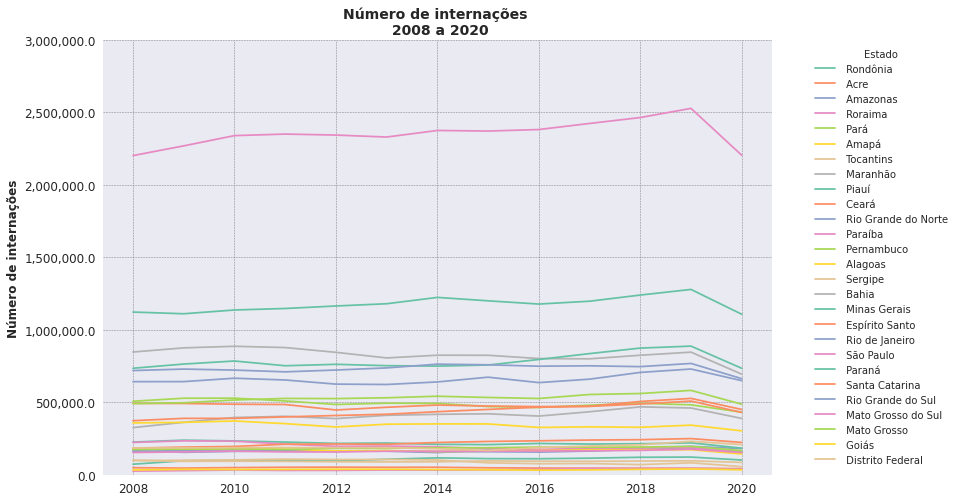

In [114]:
fig, ax = plt.subplots(figsize=(12,8)) 
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('Set2', 20))

usaveis_ano3.plot(ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f}'))
plt.title('Número de internações \n 2008 a 2020', weight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Número de internações', weight='bold', fontsize=12)
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 3000000)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

Como temos todos os Estados representados no gráfico a visualização e 
interpretação ficam comprometidas. A única informação evidente neste gráfico é que o número de internações não varia muito ao longo do tempo. Temos uma queda em 2020, que deve ser reflexo dos dados estarem represados e ainda não terem sido processados.
Portanto, vamos analisar os Estados com maior número de internações adiante.

###**Quais estados tiveram os maiores número de internações de 2008 a 2020?**

Gráfico de barras mostrando os números de internação de todos os Estados para cada ano, por ordem decrescente:

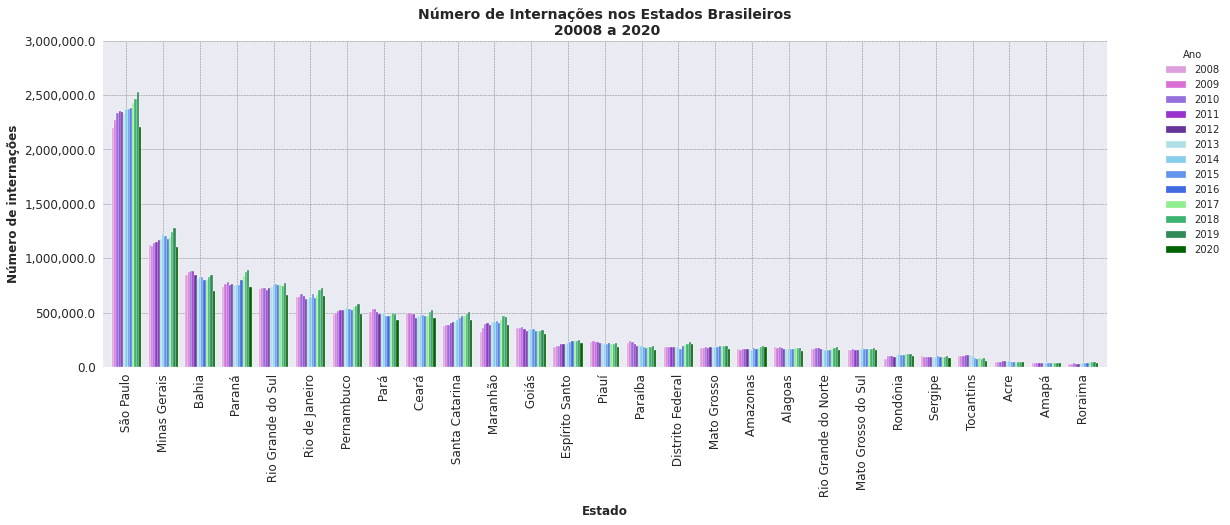

In [116]:
width_n = 0.8
ax= internacoes_final.plot(kind='bar', width=width_n, figsize=(18,6), color =['plum', 'orchid', 'mediumpurple', 'darkorchid', 'rebeccapurple',
                                                                  'powderblue', 'skyblue', 'cornflowerblue', 'royalblue', 
                                                                  'lightgreen', 'mediumseagreen', 'seagreen', 'darkgreen'])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f}'))
plt.title('Número de Internações nos Estados Brasileiros\n 20008 a 2020', weight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Estado', weight='bold', fontsize=12)
plt.ylabel('Número de internações', weight='bold', fontsize=12)
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 3000000)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

Os Estados com **maior número de internações por ano** (2008-2020) foram **São Paulo, Minas Gerais, Bahia, Paraná e Rio Grande do Sul**.

Análise mais detalhada:

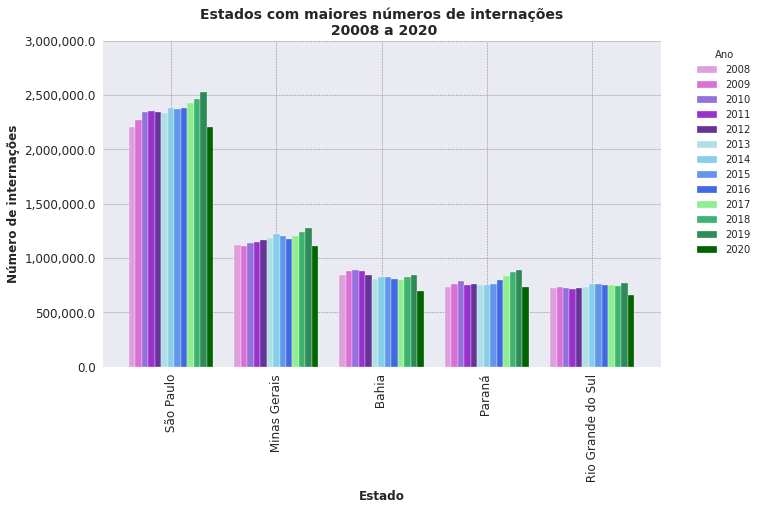

In [117]:
width_n = 0.8
ax= internacoes_final.head(5).plot(kind='bar', width=width_n, figsize=(10,6), color =['plum', 'orchid', 'mediumpurple', 'darkorchid', 'rebeccapurple',
                                                                  'powderblue', 'skyblue', 'cornflowerblue', 'royalblue', 
                                                                  'lightgreen', 'mediumseagreen', 'seagreen', 'darkgreen'])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f}'))
plt.title('Estados com maiores números de internações\n 20008 a 2020', weight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Estado', weight='bold', fontsize=12)
plt.ylabel('Número de internações', weight='bold', fontsize=12)
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 3000000)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

Em São Paulo, Minas Gerais e Paraná vemos um aumento crescente após 2017.
Todos os Estados apresentam uma queda em 2020, provavelmente pelos dados ainda não terem sido completamente processados.

###**O aumento de gastos e internações estão crescendo juntos?**



**Quando comparamos os Estados com mais gastos hospitalares com aqueles com maior número de internações, vemos que os dados não mostram o mesmo resultado**.
Quando falamos em **mais gastos hospitalares** temos: **São Paulo, Minas Gerais, Paraná, Rio Grande do Sul e Rio de Janeiro**.
Já quando falamos em **número de internações** temos: **São Paulo, Minas Gerais, Bahia, Paraná e Rio Grande do Sul**. 
Portanto, quando analisamos o **número de internações** o **Rio de Janeiro** fica em **sexto lugar**. 

Lembrando que os valores de Gastos hospitalares totais da Rio de Janeiro e Bahia são os seguintes: 

Rio de Janeiro: 10.337.389.922.09

Bahia:  9.791.541.570.52


###**Qual é a média de permanência nas internações por ano em cada Estado?**

Gráfico com os valores de média de permanência totais:

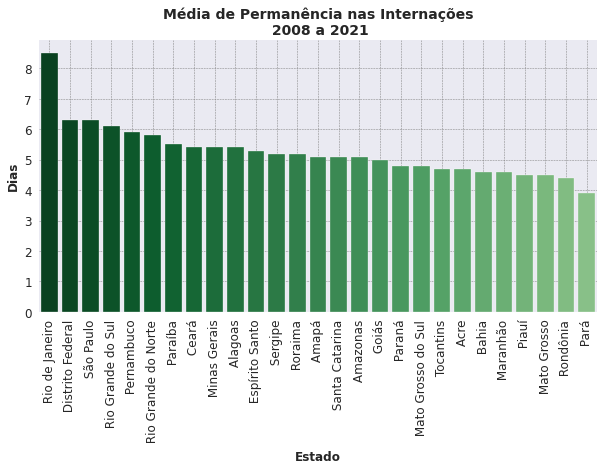

In [119]:
fig, ax = plt.subplots(figsize=(10,5)) 
sns.set_style('darkgrid')
sns.set_palette(list(reversed((sns.color_palette('Greens', 50)))))
sns.barplot(x='Unidade da Federação', y='Total', data=media_permanencia_sort)
plt.title('Média de Permanência nas Internações\n 2008 a 2021', weight='bold', fontsize=14)
plt.xlabel('Estado', weight='bold', fontsize=12)
plt.ylabel('Dias', weight='bold', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

Porém, quando analisamos a média de permanência (em dias) nas internações, vemos que o **Rio de Janeiro** é o estado onde os pacientes possuem **maior permanência** (8,5 dias). Enquanto isso, **Pará** é o estado com **menor permanência** (3,9 dias). 

Análise detalhada, mostrando todos os anos:

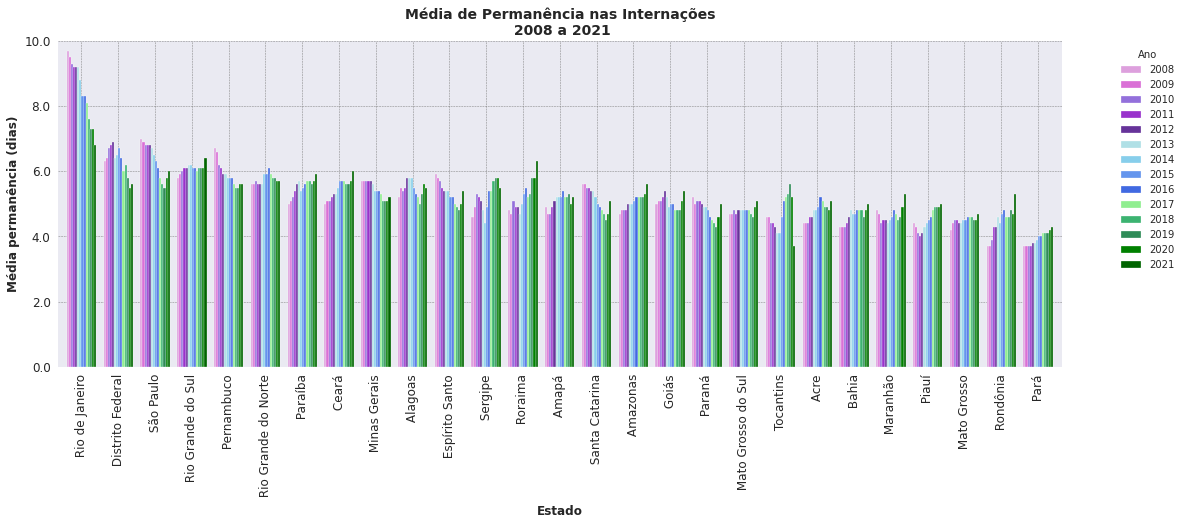

In [120]:
width_n = 0.8
ax= media_permanencia_final.plot(kind='bar', width=width_n, figsize=(18,6), color =['plum', 'orchid', 'mediumpurple', 'darkorchid', 'rebeccapurple',
                                                                  'powderblue', 'skyblue', 'cornflowerblue', 'royalblue', 
                                                                  'lightgreen', 'mediumseagreen', 'seagreen', 'green','darkgreen',])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f}'))
plt.title('Média de Permanência nas Internações\n 2008 a 2021', weight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Estado', weight='bold', fontsize=12)
plt.ylabel('Média permanência (dias)', weight='bold', fontsize=12)
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 10)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

Analisando os 5 Estados com maiores médias de permanência nas internações:

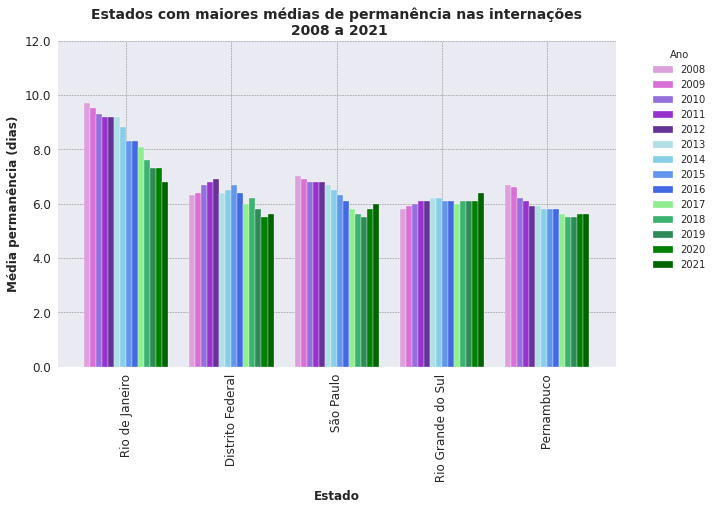

In [122]:
width_n = 0.8
ax= media_permanencia_final.head(5).plot(kind='bar', width=width_n, figsize=(10,6), color =['plum', 'orchid', 'mediumpurple', 'darkorchid', 'rebeccapurple',
                                                                  'powderblue', 'skyblue', 'cornflowerblue', 'royalblue', 
                                                                  'lightgreen', 'mediumseagreen', 'seagreen', 'green','darkgreen',])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f}'))
plt.title('Estados com maiores médias de permanência nas internações\n 2008 a 2021', weight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Estado', weight='bold', fontsize=12)
plt.ylabel('Média permanência (dias)', weight='bold', fontsize=12)
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 12)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

Os **Estados** que apresentam **maiores médias de permanência** nas internações são: **Rio de Janeiro, Distrito Federal, São Paulo, Rio Grande do Sul e Pernambuco**. 
Quando observamos o gráfico por anos, vemos que no **Rio de Janeiro** há uma **queda ao longo dos anos na média de permanência das internações**. Porém, quando feita a análise de número de internações o Rio de Janeiro ficou em sexto lugar e apresentou pouca variação entre os números ao longo dos anos.
**São Paulo** é o **Estado com maior número de internações do País**, **mas** na **média de permanência das internações** fica em **terceiro lugar**. 

#**Parte III - Análise do número de óbitos e taxa de mortalidade em todos os Estados Brasileiros**

##**Importando os dados**

In [123]:
obitos_ano = pd.read_csv('https://github.com/vqrca/bootcamp_alura_projeto_1/blob/main/Dados/obitos_ano.csv?raw=True', 
                           encoding='ISO-8859-1',skiprows=3, sep='';', skipfooter = 12) 

taxa_mortalidade_ano = pd.read_csv('https://github.com/vqrca/bootcamp_alura_projeto_1/blob/main/Dados/taxa_mortalidade_ano_atendimento.csv?raw=True', 
                           encoding='ISO-8859-1',skiprows=3, sep='';', skipfooter = 12, thousands='.', decimal=',')

taxa_mort_2019_2021 = pd.read_csv('https://github.com/vqrca/bootcamp_alura_projeto_1/blob/main/Dados/taxa_mortalidade_2019-2021_meses_processamento.csv?raw=True', 
                           encoding='ISO-8859-1',skiprows=3, sep='';', skipfooter = 12, thousands='.', decimal=',')

##**Estrutura dos dados**

Os dataframes de número de óbitos e taxa de mortalidade possuem dados referentes aos meses e anos por atendimento. Ambos possuem linhas que correspondem as 27 Unidades de Federação e colunas contendo os valores para cada mês e ano. A última coluna apresenta os valores totais para todo período. 

- O Dataframe **óbitos** apresenta dados do período de 2008 até março de 2021
- O Dataframe **taxa de mortalidade** apresenta dados do período de 2007 até março de 2021.
- O Dataframe **Taxa de mortalidade 2019-2021**  apresenta dados do período de janeiro de 2019 até março de 2021.





###**Óbitos**

In [124]:
obitos_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unidade da Federação  27 non-null     object
 1   2008                  27 non-null     int64 
 2   2009                  27 non-null     int64 
 3   2010                  27 non-null     int64 
 4   2011                  27 non-null     int64 
 5   2012                  27 non-null     int64 
 6   2013                  27 non-null     int64 
 7   2014                  27 non-null     int64 
 8   2015                  27 non-null     int64 
 9   2016                  27 non-null     int64 
 10  2017                  27 non-null     int64 
 11  2018                  27 non-null     int64 
 12  2019                  27 non-null     int64 
 13  2020                  27 non-null     int64 
 14  2021                  27 non-null     int64 
 15  Total                 27 non-null     int6

In [125]:
obitos_ano.head()

Unidade da Federação  2008  2009  2010  ...   2019   2020  2021   Total
0          11 Rondônia   969  1375  2007  ...   3523   3973  1327   37058
1              12 Acre   998  1144  1349  ...   1543   1906   536   18615
2          13 Amazonas  2948  3113  3175  ...   6500   9377  4742   64963
3           14 Roraima   383   561   754  ...   1428   1666   799   12466
4              15 Pará  7521  8541  9039  ...  11574  14952  3670  139591

[5 rows x 16 columns]

###**Taxa de mortalidade por ano**

In [126]:
taxa_mortalidade_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unidade da Federação  27 non-null     object 
 1   2007                  27 non-null     float64
 2   2008                  27 non-null     float64
 3   2009                  27 non-null     float64
 4   2010                  27 non-null     float64
 5   2011                  27 non-null     float64
 6   2012                  27 non-null     float64
 7   2013                  27 non-null     float64
 8   2014                  27 non-null     float64
 9   2015                  27 non-null     float64
 10  2016                  27 non-null     float64
 11  2017                  27 non-null     float64
 12  2018                  27 non-null     float64
 13  2019                  27 non-null     float64
 14  2020                  27 non-null     float64
 15  2021                  27 

In [127]:
taxa_mortalidade_ano.head()

Unidade da Federação  2007  2008  2009  2010  ...  2018  2019  2020  2021  Total
0          11 Rondônia  2.65  1.38  1.46  2.06  ...  2.90  2.76  4.02  6.84   2.67
1              12 Acre  5.26  2.28  2.25  2.73  ...  3.39  3.50  4.48  3.88   2.92
2          13 Amazonas  2.63  1.84  2.05  2.07  ...  3.16  3.24  5.46 10.82   2.89
3           14 Roraima  1.03  1.54  1.97  2.27  ...  2.99  3.17  4.36  8.61   2.68
4              15 Pará  1.87  1.49  1.64  1.72  ...  2.35  2.36  3.51  3.61   2.15

[5 rows x 17 columns]

###**Taxa de Mortalidade de Janeiro de 2019 a março de 2021**

In [128]:
taxa_mort_2019_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unidade da Federação  27 non-null     object 
 1   2019/Jan              27 non-null     float64
 2   2019/Fev              27 non-null     float64
 3   2019/Mar              27 non-null     float64
 4   2019/Abr              27 non-null     float64
 5   2019/Mai              27 non-null     float64
 6   2019/Jun              27 non-null     float64
 7   2019/Jul              27 non-null     float64
 8   2019/Ago              27 non-null     float64
 9   2019/Set              27 non-null     float64
 10  2019/Out              27 non-null     float64
 11  2019/Nov              27 non-null     float64
 12  2019/Dez              27 non-null     float64
 13  2020/Jan              27 non-null     float64
 14  2020/Fev              27 non-null     float64
 15  2020/Mar              27 

In [129]:
taxa_mort_2019_2021.head()

Unidade da Federação  2019/Jan  2019/Fev  ...  2021/Fev  2021/Mar  Total
0          11 Rondônia      3.07      2.81  ...      5.15      8.69   3.57
1              12 Acre      4.11      3.69  ...      5.40      5.17   4.03
2          13 Amazonas      3.27      3.22  ...      9.36     11.33   4.86
3           14 Roraima      3.48      3.95  ...      9.75      8.76   4.14
4              15 Pará      2.54      2.38  ...      3.60      4.61   2.97

[5 rows x 29 columns]

## **Análise exploratória dos dados**

###**Óbitos**

In [130]:
obitos_ano.describe()

2008      2009      2010  ...      2020     2021      Total
count    27.00     27.00     27.00  ...     27.00    27.00      27.00
mean  13049.93  14341.22  15206.11  ...  21920.96  6609.11  227478.70
std   20286.04  21554.25  22908.53  ...  29669.36  8949.89  322814.51
min     383.00    561.00    754.00  ...   1406.00    71.00   12466.00
25%    3166.00   3674.50   3714.50  ...   7188.50  2054.50   70352.50
50%    5402.00   5170.00   5711.00  ...  10284.00  3670.00  107886.00
75%   14406.50  16204.00  16264.00  ...  25762.00  7829.50  262769.00
max   98983.00 105139.00 112082.00  ... 145045.00 43408.00 1571473.00

[8 rows x 15 columns]

No DataFrame óbitos temos colunas com todos os valores preenchidos. Portanto, será necessário retirar a coluna 2021, já que os dados são parciais, correspondendo apenas até março de 2021.

###**Taxa de mortalidade por ano**

In [131]:
taxa_mortalidade_ano.describe()

2007  2008  2009  2010  2011  2012  ...  2017  2018  2019  2020  2021  Total
count 27.00 27.00 27.00 27.00 27.00 27.00  ... 27.00 27.00 27.00 27.00 27.00  27.00
mean   3.94  2.67  2.88  3.05  3.20  3.27  ...  3.80  3.80  3.85  5.22  5.92   3.57
std    1.39  0.96  0.96  0.99  0.94  0.94  ...  0.98  0.98  0.99  1.20  1.79   0.95
min    1.03  1.20  1.27  1.34  1.49  1.80  ...  2.36  2.29  2.36  3.51  3.61   2.11
25%    3.04  2.01  2.26  2.46  2.40  2.53  ...  3.10  3.10  3.21  4.41  4.70   2.88
50%    4.13  2.56  2.78  2.94  3.30  3.25  ...  3.77  3.73  3.76  5.10  5.45   3.53
75%    4.82  3.20  3.43  3.48  3.63  3.61  ...  4.22  4.24  4.23  5.63  6.92   4.12
max    6.80  4.67  4.89  5.53  5.68  5.97  ...  6.65  6.77  6.82  9.18 10.82   6.35

[8 rows x 16 columns]

Nenhuma das colunas apresenta dados nulos. Será necessário retirar a coluna 'Total', que aparentemente é uma média das outras colunas.

###**Taxa de Mortalidade de Janeiro de 2019 a março de 2021**

In [132]:
taxa_mort_2019_2021.describe()

2019/Jan  2019/Fev  2019/Mar  ...  2021/Fev  2021/Mar  Total
count     27.00     27.00     27.00  ...     27.00     27.00  27.00
mean       4.07      3.84      3.79  ...      5.81      7.34   4.63
std        1.02      1.04      1.04  ...      1.89      1.81   1.08
min        2.54      2.08      1.81  ...      0.99      4.61   2.97
25%        3.38      3.31      3.30  ...      4.89      6.12   3.96
50%        3.98      3.72      3.73  ...      5.63      6.83   4.49
75%        4.47      4.26      4.25  ...      6.69      8.61   5.02
max        7.04      6.43      7.13  ...      9.75     11.33   8.02

[8 rows x 28 columns]

Nenhuma das colunas apresenta dados nulos. Será necessário retirar a coluna 'Total', que aparentemente é uma média das outras colunas.

##**Tratamento da base de dados**

###**Óbitos**

In [133]:
obitos_ano.head()

Unidade da Federação  2008  2009  2010  ...   2019   2020  2021   Total
0          11 Rondônia   969  1375  2007  ...   3523   3973  1327   37058
1              12 Acre   998  1144  1349  ...   1543   1906   536   18615
2          13 Amazonas  2948  3113  3175  ...   6500   9377  4742   64963
3           14 Roraima   383   561   754  ...   1428   1666   799   12466
4              15 Pará  7521  8541  9039  ...  11574  14952  3670  139591

[5 rows x 16 columns]

Retirar números que estão antes do nome de cada Estado na coluna 'Unidade da Federaçao':

In [134]:
obitos_ano['Unidade da Federação'] = obitos_ano['Unidade da Federação'].apply(lambda x: x[2:])
obitos_ano

Unidade da Federação   2008    2009    2010  ...    2019    2020   2021    Total
0               Rondônia    969    1375    2007  ...    3523    3973   1327    37058
1                   Acre    998    1144    1349  ...    1543    1906    536    18615
2               Amazonas   2948    3113    3175  ...    6500    9377   4742    64963
3                Roraima    383     561     754  ...    1428    1666    799    12466
4                   Pará   7521    8541    9039  ...   11574   14952   3670   139591
5                  Amapá    703     855     846  ...    1127    1406    451    13005
6              Tocantins   2367    2408    2644  ...    2767    2946     71    33714
7               Maranhão   3837    4519    5259  ...   11114   14188   4005   113499
8                  Piauí   3915    4236    4254  ...    6612    7268   2037    75742
9                  Ceará  12724   14712   14408  ...   20104   23440   5825   223990
10   Rio Grande do Norte   4021    4575    5095  ...    7292    7862   2072    78673
11               Paraíba   6337    7859    8182  ...    9336   10284   3106   109961
12            Pernambuco  15863   17645   17121  ...   25038   28084   8078   288700
13               Alagoas   3384    4545    4819  ...    6632    7109   2218    80390
14               Sergipe   2283    2574    3082  ...    5038    5582   1484    51266
15                 Bahia  18454   21035   22348  ...   31620   34424   9225   356386
16          Minas Gerais  44339   47175   48449  ...   59567   62116  19225   704829
17        Espírito Santo   5402    6276    6606  ...    9229   11907   3728   107886
18        Rio de Janeiro  28256   30721   36648  ...   49669   58500  16547   552753
19             São Paulo  98983  105139  112082  ...  127860  145045  43408  1571473
20                Paraná  23652   26519   27845  ...   33701   37386  12794   402022
21        Santa Catarina  12950   14763   15407  ...   21220   21965   7581   236838
22     Rio Grande do Sul  30427   32914   33550  ...   39839   41617  14110   481591
23    Mato Grosso do Sul   4266    5031    5675  ...    6796    7767   2373    79780
24           Mato Grosso   4438    5170    5711  ...    7210    7654   2209    84353
25                 Goiás   7363    8677    9338  ...   12458   15194   4409   141619
26      Distrito Federal   5565    5131    4872  ...    6651    8248   2416    80762

[27 rows x 16 columns]

In [135]:
#Retirar a coluna '2021':
usaveis_obitos = obitos_ano.drop('2021', axis=1)
usaveis_obitos

Unidade da Federação   2008    2009  ...    2019    2020    Total
0               Rondônia    969    1375  ...    3523    3973    37058
1                   Acre    998    1144  ...    1543    1906    18615
2               Amazonas   2948    3113  ...    6500    9377    64963
3                Roraima    383     561  ...    1428    1666    12466
4                   Pará   7521    8541  ...   11574   14952   139591
5                  Amapá    703     855  ...    1127    1406    13005
6              Tocantins   2367    2408  ...    2767    2946    33714
7               Maranhão   3837    4519  ...   11114   14188   113499
8                  Piauí   3915    4236  ...    6612    7268    75742
9                  Ceará  12724   14712  ...   20104   23440   223990
10   Rio Grande do Norte   4021    4575  ...    7292    7862    78673
11               Paraíba   6337    7859  ...    9336   10284   109961
12            Pernambuco  15863   17645  ...   25038   28084   288700
13               Alagoas   3384    4545  ...    6632    7109    80390
14               Sergipe   2283    2574  ...    5038    5582    51266
15                 Bahia  18454   21035  ...   31620   34424   356386
16          Minas Gerais  44339   47175  ...   59567   62116   704829
17        Espírito Santo   5402    6276  ...    9229   11907   107886
18        Rio de Janeiro  28256   30721  ...   49669   58500   552753
19             São Paulo  98983  105139  ...  127860  145045  1571473
20                Paraná  23652   26519  ...   33701   37386   402022
21        Santa Catarina  12950   14763  ...   21220   21965   236838
22     Rio Grande do Sul  30427   32914  ...   39839   41617   481591
23    Mato Grosso do Sul   4266    5031  ...    6796    7767    79780
24           Mato Grosso   4438    5170  ...    7210    7654    84353
25                 Goiás   7363    8677  ...   12458   15194   141619
26      Distrito Federal   5565    5131  ...    6651    8248    80762

[27 rows x 15 columns]

In [136]:
#Retirar a coluna 'Total':
usaveis_obitos2 = usaveis_obitos.drop('Total', axis=1)
usaveis_obitos2

Unidade da Federação   2008    2009    2010  ...    2017    2018    2019    2020
0               Rondônia    969    1375    2007  ...    3524    3450    3523    3973
1                   Acre    998    1144    1349  ...    1359    1470    1543    1906
2               Amazonas   2948    3113    3175  ...    5304    5785    6500    9377
3                Roraima    383     561     754  ...    1161    1300    1428    1666
4                   Pará   7521    8541    9039  ...   11671   11743   11574   14952
5                  Amapá    703     855     846  ...     863    1023    1127    1406
6              Tocantins   2367    2408    2644  ...    2484    2163    2767    2946
7               Maranhão   3837    4519    5259  ...   10325   10601   11114   14188
8                  Piauí   3915    4236    4254  ...    6167    6262    6612    7268
9                  Ceará  12724   14712   14408  ...   18937   19078   20104   23440
10   Rio Grande do Norte   4021    4575    5095  ...    6360    6498    7292    7862
11               Paraíba   6337    7859    8182  ...    8626    8649    9336   10284
12            Pernambuco  15863   17645   17121  ...   24229   23856   25038   28084
13               Alagoas   3384    4545    4819  ...    7099    6413    6632    7109
14               Sergipe   2283    2574    3082  ...    4432    4791    5038    5582
15                 Bahia  18454   21035   22348  ...   29240   29509   31620   34424
16          Minas Gerais  44339   47175   48449  ...   56182   56736   59567   62116
17        Espírito Santo   5402    6276    6606  ...    9228    9044    9229   11907
18        Rio de Janeiro  28256   30721   36648  ...   43660   47578   49669   58500
19             São Paulo  98983  105139  112082  ...  121615  123751  127860  145045
20                Paraná  23652   26519   27845  ...   31282   33006   33701   37386
21        Santa Catarina  12950   14763   15407  ...   19383   20412   21220   21965
22     Rio Grande do Sul  30427   32914   33550  ...   37817   38713   39839   41617
23    Mato Grosso do Sul   4266    5031    5675  ...    6485    6515    6796    7767
24           Mato Grosso   4438    5170    5711  ...    6902    6965    7210    7654
25                 Goiás   7363    8677    9338  ...   11195   11133   12458   15194
26      Distrito Federal   5565    5131    4872  ...    6161    6548    6651    8248

[27 rows x 14 columns]

In [137]:
#Definir o index:
usaveis_obitos2 = usaveis_obitos2.set_index('Unidade da Federação')
usaveis_obitos2

2008    2009    2010  ...    2018    2019    2020
Unidade da Federação                         ...                        
 Rondônia               969    1375    2007  ...    3450    3523    3973
 Acre                   998    1144    1349  ...    1470    1543    1906
 Amazonas              2948    3113    3175  ...    5785    6500    9377
 Roraima                383     561     754  ...    1300    1428    1666
 Pará                  7521    8541    9039  ...   11743   11574   14952
 Amapá                  703     855     846  ...    1023    1127    1406
 Tocantins             2367    2408    2644  ...    2163    2767    2946
 Maranhão              3837    4519    5259  ...   10601   11114   14188
 Piauí                 3915    4236    4254  ...    6262    6612    7268
 Ceará                12724   14712   14408  ...   19078   20104   23440
 Rio Grande do Norte   4021    4575    5095  ...    6498    7292    7862
 Paraíba               6337    7859    8182  ...    8649    9336   10284
 Pernambuco           15863   17645   17121  ...   23856   25038   28084
 Alagoas               3384    4545    4819  ...    6413    6632    7109
 Sergipe               2283    2574    3082  ...    4791    5038    5582
 Bahia                18454   21035   22348  ...   29509   31620   34424
 Minas Gerais         44339   47175   48449  ...   56736   59567   62116
 Espírito Santo        5402    6276    6606  ...    9044    9229   11907
 Rio de Janeiro       28256   30721   36648  ...   47578   49669   58500
 São Paulo            98983  105139  112082  ...  123751  127860  145045
 Paraná               23652   26519   27845  ...   33006   33701   37386
 Santa Catarina       12950   14763   15407  ...   20412   21220   21965
 Rio Grande do Sul    30427   32914   33550  ...   38713   39839   41617
 Mato Grosso do Sul    4266    5031    5675  ...    6515    6796    7767
 Mato Grosso           4438    5170    5711  ...    6965    7210    7654
 Goiás                 7363    8677    9338  ...   11133   12458   15194
 Distrito Federal      5565    5131    4872  ...    6548    6651    8248

[27 rows x 13 columns]

###**Taxa de mortalidade por ano**

In [138]:
taxa_mortalidade_ano.head()

Unidade da Federação  2007  2008  2009  2010  ...  2018  2019  2020  2021  Total
0          11 Rondônia  2.65  1.38  1.46  2.06  ...  2.90  2.76  4.02  6.84   2.67
1              12 Acre  5.26  2.28  2.25  2.73  ...  3.39  3.50  4.48  3.88   2.92
2          13 Amazonas  2.63  1.84  2.05  2.07  ...  3.16  3.24  5.46 10.82   2.89
3           14 Roraima  1.03  1.54  1.97  2.27  ...  2.99  3.17  4.36  8.61   2.68
4              15 Pará  1.87  1.49  1.64  1.72  ...  2.35  2.36  3.51  3.61   2.15

[5 rows x 17 columns]

Retirar números que estão antes do nome de cada Estado na coluna 'Unidade da Federaçao':

In [139]:
taxa_mortalidade_ano['Unidade da Federação'] = taxa_mortalidade_ano['Unidade da Federação'].apply(lambda x: x[2:])
taxa_mortalidade_ano

Unidade da Federação  2007  2008  2009  2010  ...  2018  2019  2020  2021  Total
0               Rondônia  2.65  1.38  1.46  2.06  ...  2.90  2.76  4.02  6.84   2.67
1                   Acre  5.26  2.28  2.25  2.73  ...  3.39  3.50  4.48  3.88   2.92
2               Amazonas  2.63  1.84  2.05  2.07  ...  3.16  3.24  5.46 10.82   2.89
3                Roraima  1.03  1.54  1.97  2.27  ...  2.99  3.17  4.36  8.61   2.68
4                   Pará  1.87  1.49  1.64  1.72  ...  2.35  2.36  3.51  3.61   2.15
5                  Amapá  4.35  2.11  2.27  2.41  ...  2.78  2.72  4.45  4.67   2.72
6              Tocantins  3.05  2.42  2.42  2.51  ...  3.39  3.46  4.14  4.16   2.86
7               Maranhão  1.97  1.20  1.27  1.34  ...  2.29  2.42  3.72  4.28   2.11
8                  Piauí  3.49  1.71  1.79  1.76  ...  2.90  3.05  4.08  3.84   2.64
9                  Ceará  5.01  2.76  2.94  2.94  ...  3.83  3.87  5.25  4.95   3.53
10   Rio Grande do Norte  3.04  2.56  2.78  2.94  ...  3.80  3.87  4.97  4.85   3.59
11               Paraíba  4.38  2.85  3.43  3.44  ...  4.74  4.96  6.71  7.34   4.23
12            Pernambuco  4.13  3.30  3.50  3.33  ...  4.27  4.31  5.96  6.30   4.12
13               Alagoas  3.44  1.92  2.58  2.78  ...  3.74  3.80  5.09  5.18   3.59
14               Sergipe  3.95  2.33  3.03  3.32  ...  5.07  5.24  6.51  4.78   4.19
15                 Bahia  3.83  2.30  2.40  2.53  ...  3.59  3.76  5.00  5.16   3.27
16          Minas Gerais  5.34  3.99  4.20  4.29  ...  4.59  4.63  5.70  7.00   4.53
17        Espírito Santo  4.45  3.10  3.22  3.47  ...  3.73  3.75  5.57  5.54   3.72
18        Rio de Janeiro  6.80  4.61  4.89  5.53  ...  6.77  6.82  9.18  8.75   6.35
19             São Paulo  6.68  4.67  4.64  4.75  ...  5.02  5.03  6.66  7.42   5.04
20                Paraná  4.36  3.31  3.43  3.58  ...  3.82  3.84  5.24  6.76   3.88
21        Santa Catarina  5.17  3.51  3.79  3.97  ...  4.21  4.16  5.40  6.47   4.13
22     Rio Grande do Sul  4.77  4.33  4.49  4.61  ...  5.23  5.18  6.41  8.31   4.96
23    Mato Grosso do Sul  4.30  2.91  3.17  3.48  ...  3.87  3.84  5.32  4.72   3.73
24           Mato Grosso  3.48  2.62  2.90  3.18  ...  3.71  3.64  4.66  5.45   3.48
25                 Goiás  2.04  2.10  2.36  2.51  ...  3.44  3.63  5.10  6.05   3.12
26      Distrito Federal  4.87  2.83  2.78  2.76  ...  3.05  2.94  3.87  4.15   3.16

[27 rows x 17 columns]

In [140]:
#Definir o index:
taxa_mortalidade = taxa_mortalidade_ano.mean().index.tolist()
taxa_mortalidade.insert(0, 'Unidade da Federação') #inserir na posição 0
taxa_mortalidade

['Unidade da Federação',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 'Total']

In [141]:
taxa = taxa_mortalidade_ano[taxa_mortalidade]
taxa.head()

Unidade da Federação  2007  2008  2009  2010  ...  2018  2019  2020  2021  Total
0             Rondônia  2.65  1.38  1.46  2.06  ...  2.90  2.76  4.02  6.84   2.67
1                 Acre  5.26  2.28  2.25  2.73  ...  3.39  3.50  4.48  3.88   2.92
2             Amazonas  2.63  1.84  2.05  2.07  ...  3.16  3.24  5.46 10.82   2.89
3              Roraima  1.03  1.54  1.97  2.27  ...  2.99  3.17  4.36  8.61   2.68
4                 Pará  1.87  1.49  1.64  1.72  ...  2.35  2.36  3.51  3.61   2.15

[5 rows x 17 columns]

In [142]:
taxa = taxa.set_index('Unidade da Federação')
taxa

2007  2008  2009  2010  ...  2019  2020  2021  Total
Unidade da Federação                          ...                         
 Rondônia             2.65  1.38  1.46  2.06  ...  2.76  4.02  6.84   2.67
 Acre                 5.26  2.28  2.25  2.73  ...  3.50  4.48  3.88   2.92
 Amazonas             2.63  1.84  2.05  2.07  ...  3.24  5.46 10.82   2.89
 Roraima              1.03  1.54  1.97  2.27  ...  3.17  4.36  8.61   2.68
 Pará                 1.87  1.49  1.64  1.72  ...  2.36  3.51  3.61   2.15
 Amapá                4.35  2.11  2.27  2.41  ...  2.72  4.45  4.67   2.72
 Tocantins            3.05  2.42  2.42  2.51  ...  3.46  4.14  4.16   2.86
 Maranhão             1.97  1.20  1.27  1.34  ...  2.42  3.72  4.28   2.11
 Piauí                3.49  1.71  1.79  1.76  ...  3.05  4.08  3.84   2.64
 Ceará                5.01  2.76  2.94  2.94  ...  3.87  5.25  4.95   3.53
 Rio Grande do Norte  3.04  2.56  2.78  2.94  ...  3.87  4.97  4.85   3.59
 Paraíba              4.38  2.85  3.43  3.44  ...  4.96  6.71  7.34   4.23
 Pernambuco           4.13  3.30  3.50  3.33  ...  4.31  5.96  6.30   4.12
 Alagoas              3.44  1.92  2.58  2.78  ...  3.80  5.09  5.18   3.59
 Sergipe              3.95  2.33  3.03  3.32  ...  5.24  6.51  4.78   4.19
 Bahia                3.83  2.30  2.40  2.53  ...  3.76  5.00  5.16   3.27
 Minas Gerais         5.34  3.99  4.20  4.29  ...  4.63  5.70  7.00   4.53
 Espírito Santo       4.45  3.10  3.22  3.47  ...  3.75  5.57  5.54   3.72
 Rio de Janeiro       6.80  4.61  4.89  5.53  ...  6.82  9.18  8.75   6.35
 São Paulo            6.68  4.67  4.64  4.75  ...  5.03  6.66  7.42   5.04
 Paraná               4.36  3.31  3.43  3.58  ...  3.84  5.24  6.76   3.88
 Santa Catarina       5.17  3.51  3.79  3.97  ...  4.16  5.40  6.47   4.13
 Rio Grande do Sul    4.77  4.33  4.49  4.61  ...  5.18  6.41  8.31   4.96
 Mato Grosso do Sul   4.30  2.91  3.17  3.48  ...  3.84  5.32  4.72   3.73
 Mato Grosso          3.48  2.62  2.90  3.18  ...  3.64  4.66  5.45   3.48
 Goiás                2.04  2.10  2.36  2.51  ...  3.63  5.10  6.05   3.12
 Distrito Federal     4.87  2.83  2.78  2.76  ...  2.94  3.87  4.15   3.16

[27 rows x 16 columns]

In [143]:
#Retirar a coluna 'Total':
taxa_final = taxa.drop('Total', axis=1)
taxa_final

2007  2008  2009  2010  ...  2018  2019  2020  2021
Unidade da Federação                          ...                        
 Rondônia             2.65  1.38  1.46  2.06  ...  2.90  2.76  4.02  6.84
 Acre                 5.26  2.28  2.25  2.73  ...  3.39  3.50  4.48  3.88
 Amazonas             2.63  1.84  2.05  2.07  ...  3.16  3.24  5.46 10.82
 Roraima              1.03  1.54  1.97  2.27  ...  2.99  3.17  4.36  8.61
 Pará                 1.87  1.49  1.64  1.72  ...  2.35  2.36  3.51  3.61
 Amapá                4.35  2.11  2.27  2.41  ...  2.78  2.72  4.45  4.67
 Tocantins            3.05  2.42  2.42  2.51  ...  3.39  3.46  4.14  4.16
 Maranhão             1.97  1.20  1.27  1.34  ...  2.29  2.42  3.72  4.28
 Piauí                3.49  1.71  1.79  1.76  ...  2.90  3.05  4.08  3.84
 Ceará                5.01  2.76  2.94  2.94  ...  3.83  3.87  5.25  4.95
 Rio Grande do Norte  3.04  2.56  2.78  2.94  ...  3.80  3.87  4.97  4.85
 Paraíba              4.38  2.85  3.43  3.44  ...  4.74  4.96  6.71  7.34
 Pernambuco           4.13  3.30  3.50  3.33  ...  4.27  4.31  5.96  6.30
 Alagoas              3.44  1.92  2.58  2.78  ...  3.74  3.80  5.09  5.18
 Sergipe              3.95  2.33  3.03  3.32  ...  5.07  5.24  6.51  4.78
 Bahia                3.83  2.30  2.40  2.53  ...  3.59  3.76  5.00  5.16
 Minas Gerais         5.34  3.99  4.20  4.29  ...  4.59  4.63  5.70  7.00
 Espírito Santo       4.45  3.10  3.22  3.47  ...  3.73  3.75  5.57  5.54
 Rio de Janeiro       6.80  4.61  4.89  5.53  ...  6.77  6.82  9.18  8.75
 São Paulo            6.68  4.67  4.64  4.75  ...  5.02  5.03  6.66  7.42
 Paraná               4.36  3.31  3.43  3.58  ...  3.82  3.84  5.24  6.76
 Santa Catarina       5.17  3.51  3.79  3.97  ...  4.21  4.16  5.40  6.47
 Rio Grande do Sul    4.77  4.33  4.49  4.61  ...  5.23  5.18  6.41  8.31
 Mato Grosso do Sul   4.30  2.91  3.17  3.48  ...  3.87  3.84  5.32  4.72
 Mato Grosso          3.48  2.62  2.90  3.18  ...  3.71  3.64  4.66  5.45
 Goiás                2.04  2.10  2.36  2.51  ...  3.44  3.63  5.10  6.05
 Distrito Federal     4.87  2.83  2.78  2.76  ...  3.05  2.94  3.87  4.15

[27 rows x 15 columns]

###**Taxa de Mortalidade de Janeiro de 2019 a março de 2021**

In [144]:
taxa_mort_2019_2021.head()

Unidade da Federação  2019/Jan  2019/Fev  ...  2021/Fev  2021/Mar  Total
0          11 Rondônia      3.07      2.81  ...      5.15      8.69   3.57
1              12 Acre      4.11      3.69  ...      5.40      5.17   4.03
2          13 Amazonas      3.27      3.22  ...      9.36     11.33   4.86
3           14 Roraima      3.48      3.95  ...      9.75      8.76   4.14
4              15 Pará      2.54      2.38  ...      3.60      4.61   2.97

[5 rows x 29 columns]

Retirar números que estão antes do nome de cada Estado na coluna 'Unidade da Federaçao':

In [145]:
taxa_mort_2019_2021['Unidade da Federação'] = taxa_mort_2019_2021['Unidade da Federação'].apply(lambda x: x[2:])
taxa_mort_2019_2021

Unidade da Federação  2019/Jan  2019/Fev  ...  2021/Fev  2021/Mar  Total
0               Rondônia      3.07      2.81  ...      5.15      8.69   3.57
1                   Acre      4.11      3.69  ...      5.40      5.17   4.03
2               Amazonas      3.27      3.22  ...      9.36     11.33   4.86
3                Roraima      3.48      3.95  ...      9.75      8.76   4.14
4                   Pará      2.54      2.38  ...      3.60      4.61   2.97
5                  Amapá      3.19      2.08  ...      4.11      6.10   3.62
6              Tocantins      4.32      4.32  ...      0.99      6.15   3.88
7               Maranhão      2.63      2.32  ...      3.90      6.28   3.12
8                  Piauí      2.89      3.09  ...      4.53      4.87   3.57
9                  Ceará      3.78      3.57  ...      4.88      6.64   4.55
10   Rio Grande do Norte      4.56      3.70  ...      5.76      5.71   4.47
11               Paraíba      5.10      4.80  ...      7.33      8.56   5.91
12            Pernambuco      4.38      4.20  ...      6.34      6.83   5.16
13               Alagoas      3.98      3.92  ...      5.14      6.65   4.49
14               Sergipe      5.68      6.16  ...      6.96      6.34   5.94
15                 Bahia      3.78      3.39  ...      5.41      5.75   4.40
16          Minas Gerais      4.73      4.42  ...      6.42      7.88   5.29
17        Espírito Santo      4.02      3.50  ...      5.71      6.81   4.69
18        Rio de Janeiro      7.04      6.43  ...      9.35     10.42   8.02
19             São Paulo      5.37      4.90  ...      7.08      9.08   5.97
20                Paraná      4.03      3.72  ...      6.33      8.44   4.66
21        Santa Catarina      4.35      3.92  ...      6.34      8.66   4.88
22     Rio Grande do Sul      5.43      5.09  ...      7.18     10.95   5.96
23    Mato Grosso do Sul      3.57      3.80  ...      5.63      6.87   4.58
24           Mato Grosso      3.77      4.18  ...      4.90      7.33   4.25
25                 Goiás      3.84      3.52  ...      5.58      8.17   4.48
26      Distrito Federal      3.11      2.70  ...      3.64      5.23   3.47

[27 rows x 29 columns]

In [146]:
#Definir o Index:
taxa_2019_2021 = taxa_mort_2019_2021.mean().index.tolist()
taxa_2019_2021.insert(0, 'Unidade da Federação') #inserir na posição 0
taxa_2019_2021

['Unidade da Federação',
 '2019/Jan',
 '2019/Fev',
 '2019/Mar',
 '2019/Abr',
 '2019/Mai',
 '2019/Jun',
 '2019/Jul',
 '2019/Ago',
 '2019/Set',
 '2019/Out',
 '2019/Nov',
 '2019/Dez',
 '2020/Jan',
 '2020/Fev',
 '2020/Mar',
 '2020/Abr',
 '2020/Mai',
 '2020/Jun',
 '2020/Jul',
 '2020/Ago',
 '2020/Set',
 '2020/Out',
 '2020/Nov',
 '2020/Dez',
 '2021/Jan',
 '2021/Fev',
 '2021/Mar',
 'Total']

In [147]:
taxa2 = taxa_mort_2019_2021[taxa_2019_2021]
taxa2.head()

Unidade da Federação  2019/Jan  2019/Fev  ...  2021/Fev  2021/Mar  Total
0             Rondônia      3.07      2.81  ...      5.15      8.69   3.57
1                 Acre      4.11      3.69  ...      5.40      5.17   4.03
2             Amazonas      3.27      3.22  ...      9.36     11.33   4.86
3              Roraima      3.48      3.95  ...      9.75      8.76   4.14
4                 Pará      2.54      2.38  ...      3.60      4.61   2.97

[5 rows x 29 columns]

In [148]:
taxa2 = taxa2.set_index('Unidade da Federação')
taxa2

2019/Jan  2019/Fev  2019/Mar  ...  2021/Fev  2021/Mar  Total
Unidade da Federação                                ...                           
 Rondônia                 3.07      2.81      2.68  ...      5.15      8.69   3.57
 Acre                     4.11      3.69      3.63  ...      5.40      5.17   4.03
 Amazonas                 3.27      3.22      3.73  ...      9.36     11.33   4.86
 Roraima                  3.48      3.95      1.81  ...      9.75      8.76   4.14
 Pará                     2.54      2.38      2.41  ...      3.60      4.61   2.97
 Amapá                    3.19      2.08      3.17  ...      4.11      6.10   3.62
 Tocantins                4.32      4.32      4.05  ...      0.99      6.15   3.88
 Maranhão                 2.63      2.32      2.61  ...      3.90      6.28   3.12
 Piauí                    2.89      3.09      2.87  ...      4.53      4.87   3.57
 Ceará                    3.78      3.57      3.73  ...      4.88      6.64   4.55
 Rio Grande do Norte      4.56      3.70      4.11  ...      5.76      5.71   4.47
 Paraíba                  5.10      4.80      4.72  ...      7.33      8.56   5.91
 Pernambuco               4.38      4.20      4.39  ...      6.34      6.83   5.16
 Alagoas                  3.98      3.92      3.90  ...      5.14      6.65   4.49
 Sergipe                  5.68      6.16      4.95  ...      6.96      6.34   5.94
 Bahia                    3.78      3.39      3.60  ...      5.41      5.75   4.40
 Minas Gerais             4.73      4.42      4.53  ...      6.42      7.88   5.29
 Espírito Santo           4.02      3.50      3.69  ...      5.71      6.81   4.69
 Rio de Janeiro           7.04      6.43      7.13  ...      9.35     10.42   8.02
 São Paulo                5.37      4.90      4.75  ...      7.08      9.08   5.97
 Paraná                   4.03      3.72      3.60  ...      6.33      8.44   4.66
 Santa Catarina           4.35      3.92      4.11  ...      6.34      8.66   4.88
 Rio Grande do Sul        5.43      5.09      4.87  ...      7.18     10.95   5.96
 Mato Grosso do Sul       3.57      3.80      3.75  ...      5.63      6.87   4.58
 Mato Grosso              3.77      4.18      3.57  ...      4.90      7.33   4.25
 Goiás                    3.84      3.52      3.43  ...      5.58      8.17   4.48
 Distrito Federal         3.11      2.70      2.67  ...      3.64      5.23   3.47

[27 rows x 28 columns]

In [149]:
taxa3 = taxa2.drop('Total', axis=1)
taxa3

2019/Jan  2019/Fev  ...  2021/Fev  2021/Mar
Unidade da Federação                      ...                    
 Rondônia                 3.07      2.81  ...      5.15      8.69
 Acre                     4.11      3.69  ...      5.40      5.17
 Amazonas                 3.27      3.22  ...      9.36     11.33
 Roraima                  3.48      3.95  ...      9.75      8.76
 Pará                     2.54      2.38  ...      3.60      4.61
 Amapá                    3.19      2.08  ...      4.11      6.10
 Tocantins                4.32      4.32  ...      0.99      6.15
 Maranhão                 2.63      2.32  ...      3.90      6.28
 Piauí                    2.89      3.09  ...      4.53      4.87
 Ceará                    3.78      3.57  ...      4.88      6.64
 Rio Grande do Norte      4.56      3.70  ...      5.76      5.71
 Paraíba                  5.10      4.80  ...      7.33      8.56
 Pernambuco               4.38      4.20  ...      6.34      6.83
 Alagoas                  3.98      3.92  ...      5.14      6.65
 Sergipe                  5.68      6.16  ...      6.96      6.34
 Bahia                    3.78      3.39  ...      5.41      5.75
 Minas Gerais             4.73      4.42  ...      6.42      7.88
 Espírito Santo           4.02      3.50  ...      5.71      6.81
 Rio de Janeiro           7.04      6.43  ...      9.35     10.42
 São Paulo                5.37      4.90  ...      7.08      9.08
 Paraná                   4.03      3.72  ...      6.33      8.44
 Santa Catarina           4.35      3.92  ...      6.34      8.66
 Rio Grande do Sul        5.43      5.09  ...      7.18     10.95
 Mato Grosso do Sul       3.57      3.80  ...      5.63      6.87
 Mato Grosso              3.77      4.18  ...      4.90      7.33
 Goiás                    3.84      3.52  ...      5.58      8.17
 Distrito Federal         3.11      2.70  ...      3.64      5.23

[27 rows x 27 columns]

##**Análise dos dados**

###**Quais Estados possuem maior número de óbitos**?

Análise prelimiar do Dataframe Óbtitos, plotando um gráfico pelo valor total de óbitos para todo o período: 2008 a 2020


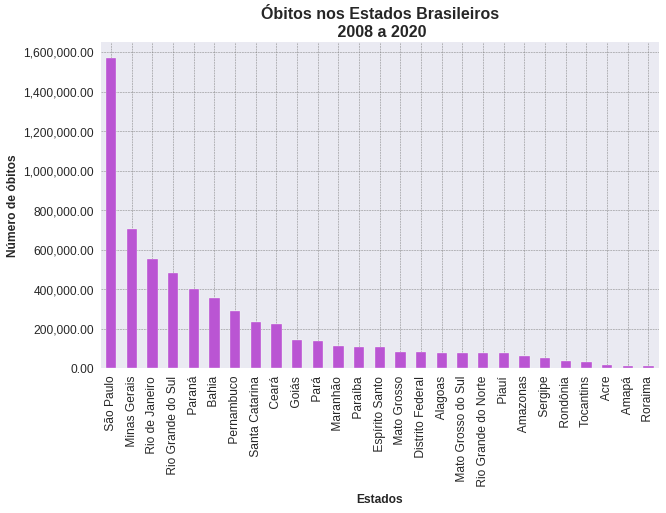

In [150]:
dados_sort = usaveis_obitos[['Unidade da Federação', 'Total']].sort_values(by = 'Total', ascending = False)

plt.style.use('seaborn')
ax = dados_sort.plot(x="Unidade da Federação", y = 'Total', kind ="bar", figsize=(10,6), legend=None, color='mediumorchid')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Óbitos nos Estados Brasileiros\n 2008 a 2020', size=16, weight='bold')
plt.xlabel("Estados", weight='bold', size = 12)
plt.ylabel("Número de óbitos", weight='bold', size = 12)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xticks(size=12, rotation=90)

plt.show()

Os **estados** com **maior número de óbitos** são **São Paulo, Minas Gerais, Rio de Janeiro e Rio Grande do Sul.**

Visão geral do número de óbitos em cada Estado por ano (2008 a 2020):

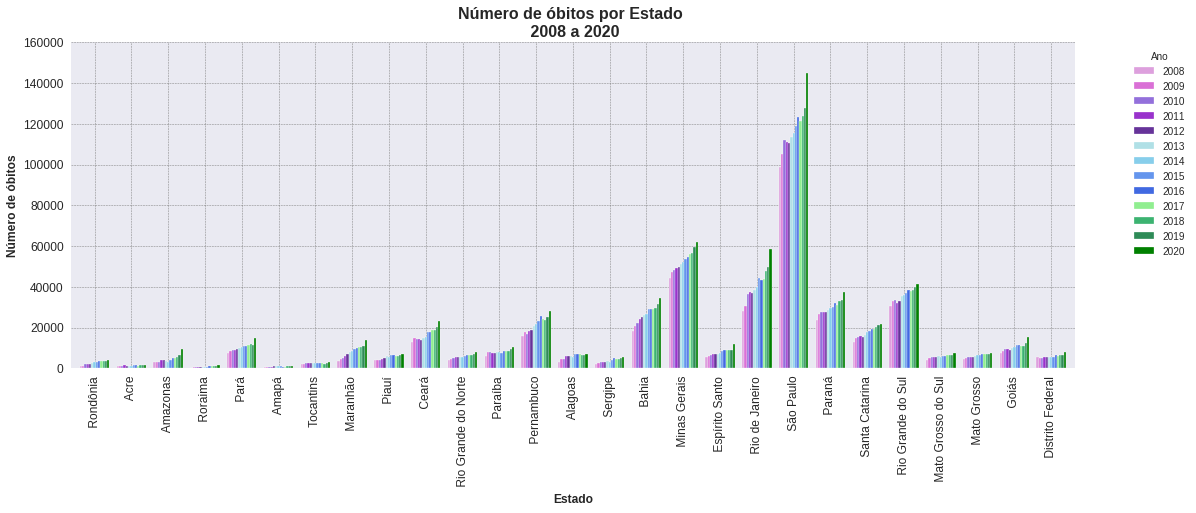

In [151]:
width_n = 0.8
ax= usaveis_obitos2.plot(kind='bar', width=width_n, figsize=(18,6), color =['plum', 'orchid', 'mediumpurple', 'darkorchid', 'rebeccapurple',
                                                                  'powderblue', 'skyblue', 'cornflowerblue', 'royalblue', 
                                                                  'lightgreen', 'mediumseagreen', 'seagreen', 'green','darkgreen',])
plt.title('Número de óbitos por Estado \n 2008 a 2020', weight='bold', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Estado', weight='bold', fontsize=12)
plt.ylabel('Número de óbitos', weight='bold', fontsize=12)
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.ylim(0, 160000)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

Análise detalhada do número de óbitos por Região:

####**Região Norte**

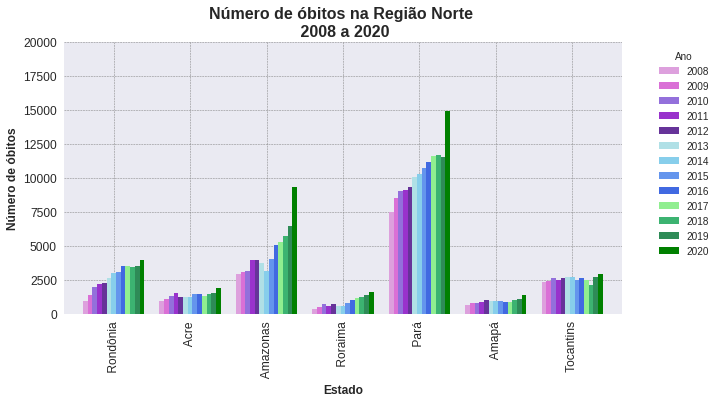

In [ ]:
width_n = 0.8
ax= usaveis_obitos2.head(7).plot(kind='bar', width=width_n, figsize=(10,5), color =['plum', 'orchid', 'mediumpurple', 'darkorchid', 'rebeccapurple',
                                                                  'powderblue', 'skyblue', 'cornflowerblue', 'royalblue', 
                                                                  'lightgreen', 'mediumseagreen', 'seagreen', 'green','darkgreen',])
plt.title('Número de óbitos na Região Norte \n 2008 a 2020', weight='bold', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Estado', weight='bold', fontsize=12)
plt.ylabel('Número de óbitos', weight='bold', fontsize=12)
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.ylim(0, 20000)
plt.show()

Na **Região Norte** os Estados com **maior número de óbitos** são **Pará e Amazonas**.
Nesses Estados o número de óbitos teve um **aumento expressivo em 2020**. 

####**Região Nordeste**

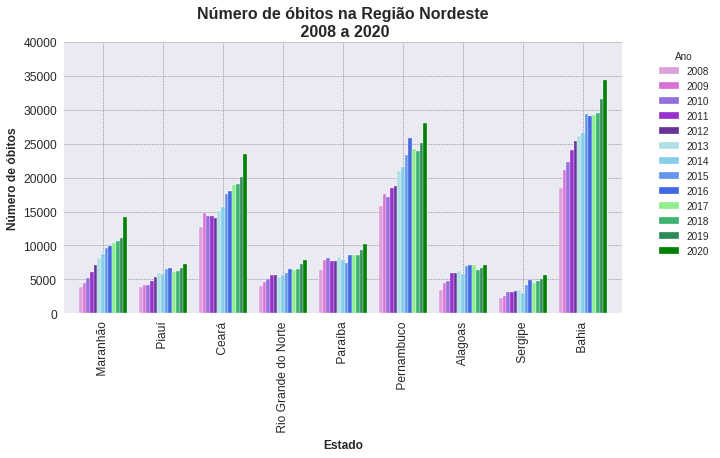

In [152]:
width_n = 0.8
ax= usaveis_obitos2[7:16].plot(kind='bar', width=width_n, figsize=(10,5), color =['plum', 'orchid', 'mediumpurple', 'darkorchid', 'rebeccapurple',
                                                                  'powderblue', 'skyblue', 'cornflowerblue', 'royalblue', 
                                                                  'lightgreen', 'mediumseagreen', 'seagreen', 'green','darkgreen',])
plt.title('Número de óbitos na Região Nordeste\n 2008 a 2020', weight='bold', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Estado', weight='bold', fontsize=12)
plt.ylabel('Número de óbitos', weight='bold', fontsize=12)
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.ylim(0, 40000)
plt.show()

Na **Região Nordeste** os Estados com **maior número de óbitos** são **Bahia e Pernambuco**.
Nos **Estados Maranhão, Ceará, Pernambuco e Bahia** o número de óbitos teve um **aumento expressivo em 2020**. 

####**Região Sudeste**

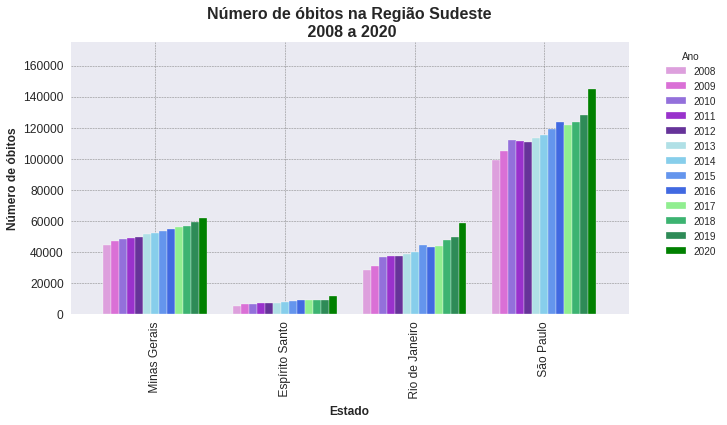

In [153]:
width_n = 0.8
ax= usaveis_obitos2[16:20].plot(kind='bar', width=width_n, figsize=(10,5), color =['plum', 'orchid', 'mediumpurple', 'darkorchid', 'rebeccapurple',
                                                                  'powderblue', 'skyblue', 'cornflowerblue', 'royalblue', 
                                                                  'lightgreen', 'mediumseagreen', 'seagreen', 'green','darkgreen',])
plt.title('Número de óbitos na Região Sudeste\n 2008 a 2020', weight='bold', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Estado', weight='bold', fontsize=12)
plt.ylabel('Número de óbitos', weight='bold', fontsize=12)
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.ylim(0, 175000)
plt.show()

Na **Região Sudeste** os Estados com **maior número de óbitos** são **São Paulo e Rio de Janeiro**.
Nesses Estados o número de óbitos teve um **aumento considerável em 2020**. 

####**Região Sul**

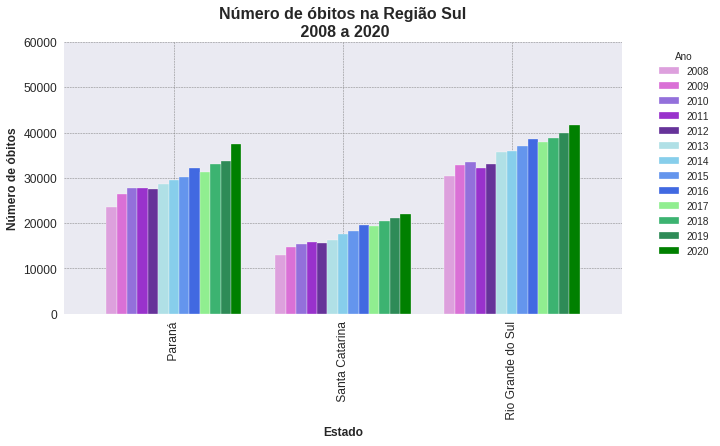

In [154]:
width_n = 0.8
ax= usaveis_obitos2[20:23].plot(kind='bar', width=width_n, figsize=(10,5), color =['plum', 'orchid', 'mediumpurple', 'darkorchid', 'rebeccapurple',
                                                                  'powderblue', 'skyblue', 'cornflowerblue', 'royalblue', 
                                                                  'lightgreen', 'mediumseagreen', 'seagreen', 'green','darkgreen',])
plt.title('Número de óbitos na Região Sul\n 2008 a 2020', weight='bold', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Estado', weight='bold', fontsize=12)
plt.ylabel('Número de óbitos', weight='bold', fontsize=12)
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.ylim(0, 60000)
plt.show()

Na **Região Sul** os Estados com **maior número de óbitos** são **Rio Grande do Sul e Paraná**.
**Paraná** foi o estado com **maior aumento do número de óbitos** em **2020**. 

####**Região Centro-Oeste**

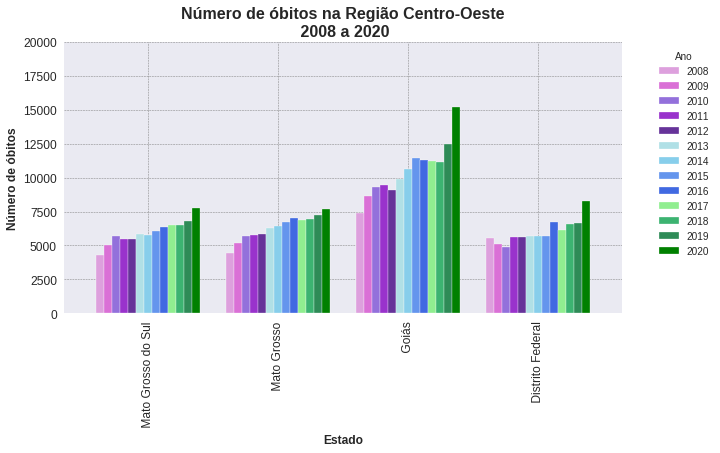

In [155]:
width_n = 0.8
ax= usaveis_obitos2.tail(4).plot(kind='bar', width=width_n, figsize=(10,5), color =['plum', 'orchid', 'mediumpurple', 'darkorchid', 'rebeccapurple',
                                                                  'powderblue', 'skyblue', 'cornflowerblue', 'royalblue', 
                                                                  'lightgreen', 'mediumseagreen', 'seagreen', 'green','darkgreen',])
plt.title('Número de óbitos na Região Centro-Oeste\n 2008 a 2020', weight='bold', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Estado', weight='bold', fontsize=12)
plt.ylabel('Número de óbitos', weight='bold', fontsize=12)
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.ylim(0, 20000)
plt.show()

Na **Região Centro-Oeste** o Estado com **maior número de óbitos** é **Goiás**.
Destaque deve ser dado ao número de óbitos em Goiás em 2020, pois passou de 12.458 em 2019 para 15.194 em 2020. 


###**Qual é a taxa de mortalidade em todos os Estados brasileiros de 2007 a 2021?**

A Taxa de mortalidade é a razão entre a quantidade de óbitos e o número de AIH (*Autorização de Internação Hospitalar*) aprovadas, computadas como internações, no período, multiplicada por 100.

Vamos iniciar com uma análise preliminar, mostrando a Taxa de Mortalidade de todos os Estados pela Taxa total para o período de 2007 a 2021:


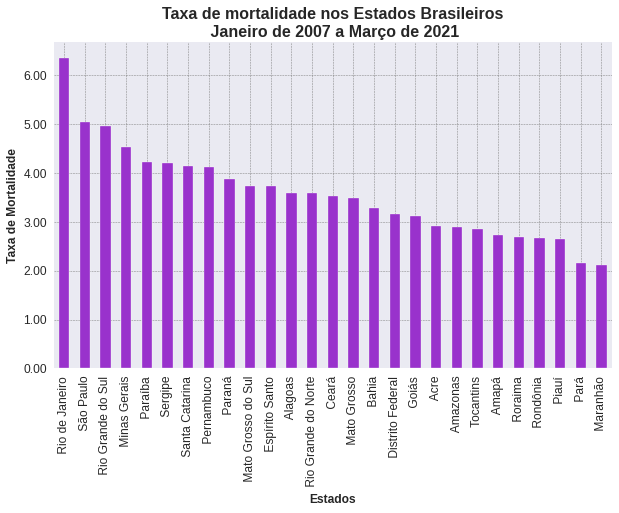

In [156]:
dados2_sort = taxa_mortalidade_ano[['Unidade da Federação', 'Total']].sort_values(by = 'Total', ascending = False)

plt.style.use('seaborn')
ax = dados2_sort.plot(x='Unidade da Federação', y = 'Total', kind ='bar', figsize=(10,6), legend=None, color='darkorchid')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Taxa de mortalidade nos Estados Brasileiros\n Janeiro de 2007 a Março de 2021', size=16, weight='bold')
plt.xlabel("Estados", weight='bold', fontsize=12)
plt.ylabel("Taxa de Mortalidade", weight='bold', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xticks(rotation=90)

plt.show()

Quando analisamos a taxa de mortalidade no período total vemos que o **Rio de Janeiro** é o estado que apresenta a **maior taxa de mortalidade no Brasil**, seguido de São Paulo, Rio Grande do Sul e Minas Gerais. O estados que apresentam **menor taxa de mortalidade** são **Pará e Maranhão**. 

###**Qual é a taxa de mortalidade por ano em todos os Estados brasileiros?**

Agora vamos analisar como essas taxas de mortalidade se comportam por ano:

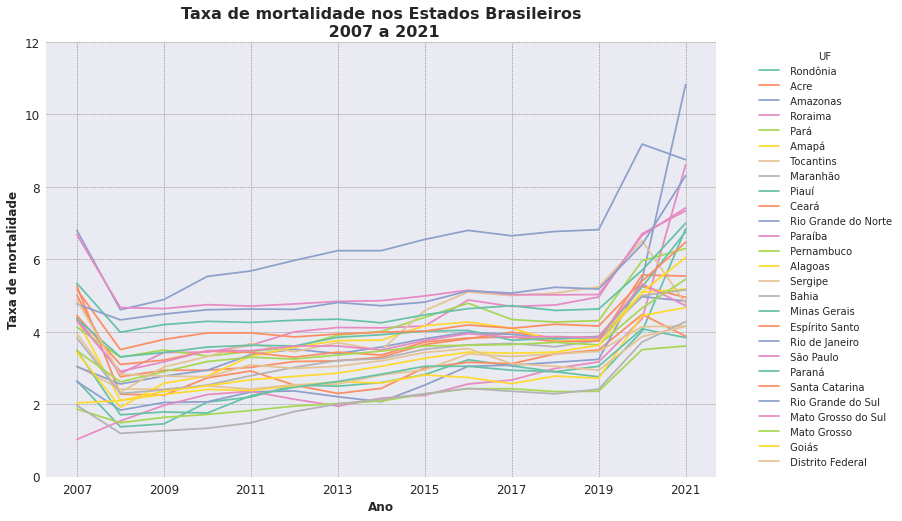

In [158]:
fig, ax = plt.subplots(figsize=(12,8)) 
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('Set2', 20))

taxa_final.T.plot(ax=ax)
plt.title('Taxa de mortalidade nos Estados Brasileiros\n 2007 a 2021', weight='bold', fontsize=16)
plt.xlabel('Ano', weight='bold', fontsize=12)
plt.ylabel('Taxa de mortalidade', weight='bold', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.ylim(0, 12)
plt.show()

Dessa forma fica complicado de entender o que está acontecendo, pois todos os Estados estão juntos. Porém já podemos verificar que entre 2019-2021 há um claro aumento nas taxas de mortalidade.

Para ficar mais evidente, vamos visualizar nos anos 2019-2021:

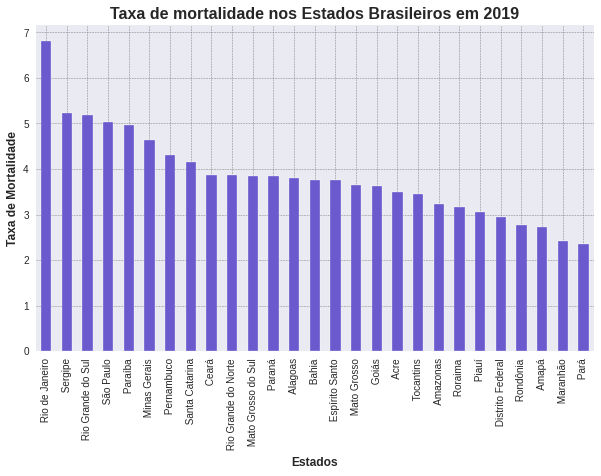

In [159]:
#Em 2019:

dados2_sort = taxa_mortalidade_ano[['Unidade da Federação', '2019']].sort_values(by = '2019', ascending = False)

plt.style.use('seaborn')
ax = dados2_sort.plot(x='Unidade da Federação', y = '2019', kind ='bar', figsize=(10,6), legend=None, color='slateblue')
plt.title('Taxa de mortalidade nos Estados Brasileiros em 2019', size=16, weight='bold')
plt.xlabel('Estados', weight='bold', fontsize=12)
plt.ylabel('Taxa de Mortalidade', weight='bold', fontsize=12)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xticks(rotation=90)

plt.show()

Em **2019** as **Taxas de Mortalidade** atingiram o **máximo de 6.82** (no **Rio de Janeiro**). A menor Taxa foi de 2.36 no Pará. 
**Amazonas e Roraima estavam entre os Estados com menores taxas de mortalidade** (3.24 e 3.17, respectivamente).

Em 2020 e 2021:

In [160]:
#Separando somente os dados de interesse (2020) e ordenando do maior para o menor:
taxa_2020_sort = taxa_mortalidade_ano[['Unidade da Federação', '2020']].sort_values(by = '2020', ascending = False)
taxa_2020_final = taxa_2020_sort.set_index('Unidade da Federação')

In [161]:
#Separando somente os dados de interesse (2021) e ordenando do maior para o menor:
taxa_2021_sort = taxa_mortalidade_ano[['Unidade da Federação', '2021']].sort_values(by = '2021', ascending = False)
taxa_2021_final = taxa_2021_sort.set_index('Unidade da Federação')

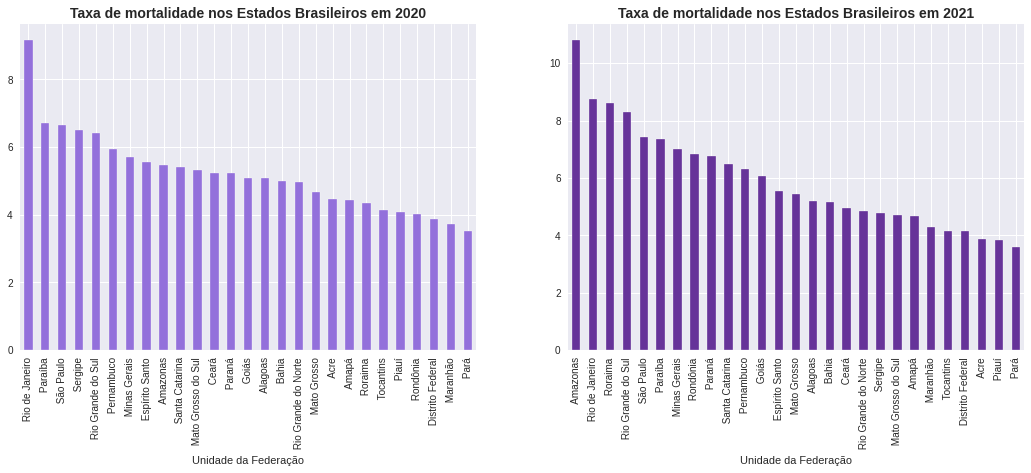

In [162]:
#Visualizando os doi gráficos juntos: 2020 x 2021
fig, axs = plt.subplots(1,2, figsize=(18,6))
taxa_2020_final.plot(kind='bar', ax=axs[0], grid=True, color='mediumpurple',  legend=None)
taxa_2021_final.plot(kind='bar', ax=axs[1], grid=True, color= 'rebeccapurple', legend=None)

axs[0].set_title('Taxa de mortalidade nos Estados Brasileiros em 2020', weight='bold', fontsize=14)
 

axs[1].set_title('Taxa de mortalidade nos Estados Brasileiros em 2021', weight='bold', fontsize=14)


plt.show()

Com esses gráficos fica claro que a **taxa de mortalidade dobrou em Amazonas** **em 2021** (Taxa de 10.82), quando comparado a 2020 (5.46), consequentemente se tornando o **Estado com maior taxa de mortalidade**. 

De acordo com dados de monitoramento da [Fiocruz](https://portal.fiocruz.br), Amazonas ultrapassou o Rio de Janeiro e se tornou o estado com maior a maior taxa de mortalidade por Covid-19 no Brasil desde o começo da pandemia. 

Além de Amazonas, **outros Estados tiveram aumentos significantes em 2021**: **Paraíba, Roraima, Rio Grande do Sul.**
O Rio de janeiro teve um aumento de 6.82 para 9.18 em 2020, mas teve uma pequena queda e ficou em segundo lugar em 2021. 

###**Outros Estados também apresentam o mesmo comportamento de Amazonas na evolução das taxas de mortalidade?**

Para verificar se outros Estados estão na mesma situação de Amazonas, uma análise de correlação será feita.
Esse tipo de análise mostra quão relacionadas duas variáveis são. Valores próximos a -1 significam que as variáveis são fortemente e inversamente correlacionadas: quando uma cresce a outra diminui; valores próximos a 1 são variáveis fortemente e positivamente correlacionadas: as duas crescem ou diminuem juntas, e 0 significa nenhuma correlação.
No pandas existe a função `.corr` que mostra os coeficientes de correlação de 
todas as variáveis:

In [163]:
taxa_final.T.corr().head()

Unidade da Federação   Rondônia   Acre  ...   Goiás   Distrito Federal
Unidade da Federação                    ...                           
 Rondônia                  1.00   0.50  ...    0.92               0.57
 Acre                      0.50   1.00  ...    0.39               0.87
 Amazonas                  0.96   0.46  ...    0.90               0.51
 Roraima                   0.93   0.31  ...    0.93               0.32
 Pará                      0.91   0.54  ...    0.98               0.49

[5 rows x 27 columns]

Os valores obtidos na análise de correlação foram usados para criar um heatmap, que mapeia os valores de uma matriz usando cores. Isso pode facilitar a identificação de variáveis correlacionadas quando se tem muitas variáveis:

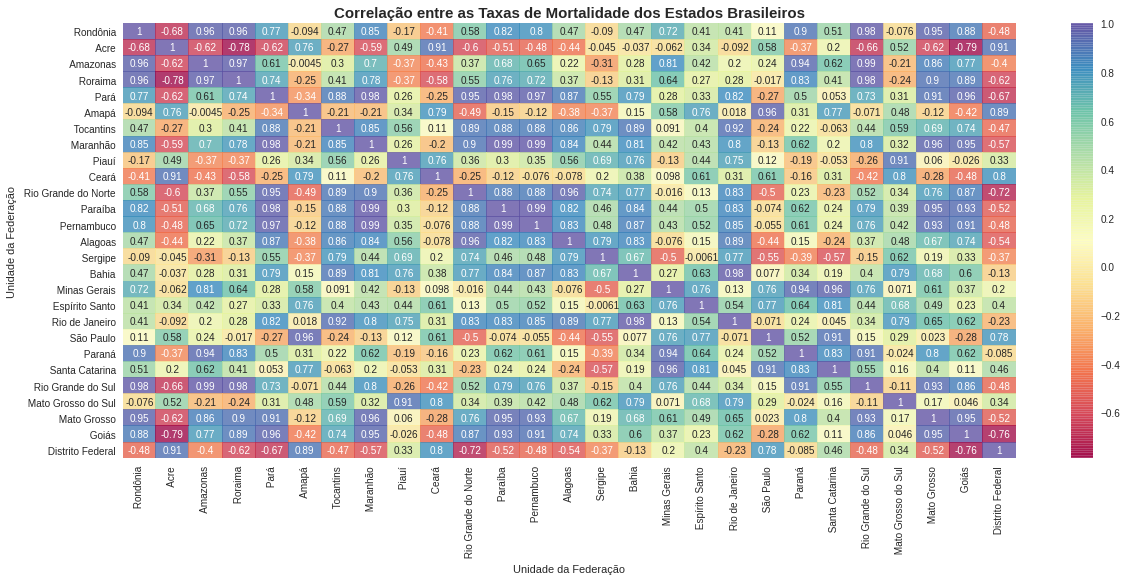

In [164]:
#Heatmap mostrando as correlações:
plt.figure(figsize=(20,8))
sns.heatmap(taxa_final.T.corr().corr(),cmap='Spectral',alpha=0.75, annot=True)
plt.title('Correlação entre as Taxas de Mortalidade dos Estados Brasileiros', fontsize=15, weight='bold')
plt.show()

Gráfico com os Estados que apresentaram alta correlação (acima de 0.9) com Amazonas: Rondônia, Roraima, Paraná e Rio Grande do Sul:

In [ ]:
taxa_mortalidade_ano.head()

In [ ]:
taxa_mort = taxa_mortalidade_ano.drop('Total', axis=1)
taxa_mort.head()

In [ ]:
taxa_mort_f = taxa_mort.set_index('Unidade da Federação')
taxa_mort_f 

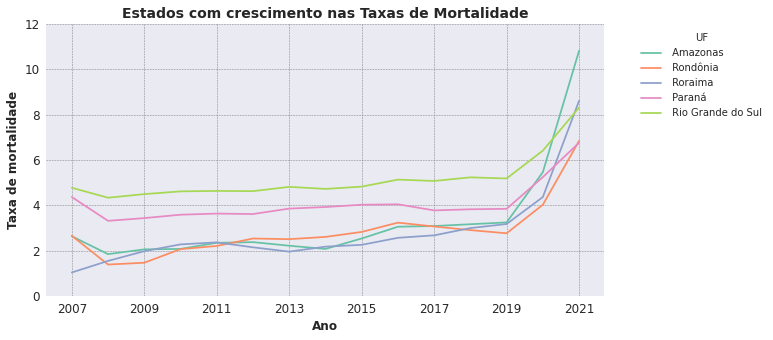

In [209]:
fig, ax = plt.subplots(figsize=(10,5)) 
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('Set2', 20))

taxa_mort_f.T[[' Amazonas', ' Rondônia', ' Roraima', ' Paraná', ' Rio Grande do Sul']].plot(ax=ax)
plt.title('Estados com crescimento nas Taxas de Mortalidade', weight='bold', fontsize=14)
plt.xlabel('Ano', weight='bold', fontsize=12)
plt.ylabel('Taxa de mortalidade', weight='bold', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.ylim(0, 12)
plt.show()

Gráfico mostrando os Estados que tem alta correlação com Amazonas, e que, portanto, apresentam a mesma tendência de alto crescimento nas taxas de mortalidade a partir de 2019. 

###**A taxa de mortalidade aumentou em quais meses de 2020 e 2021 após a pandemia de Sars-CoV-2?**

Para verificar em quais meses de 2020 e 2021 a Pandemia de  SARS-CoV-2 pode ter causado aumento nas taxas de mortalidade, serão analisados os dados somente do período de janeiro de 2019 até fevereiro de 2021.
No Brasil, os primeiros casos de  SARS-CoV-2 foram confirmados em fevereiro de 2020. Vamos ver quando, a partir desse período, temos mudanças significantes nas taxas de mortalidade. 

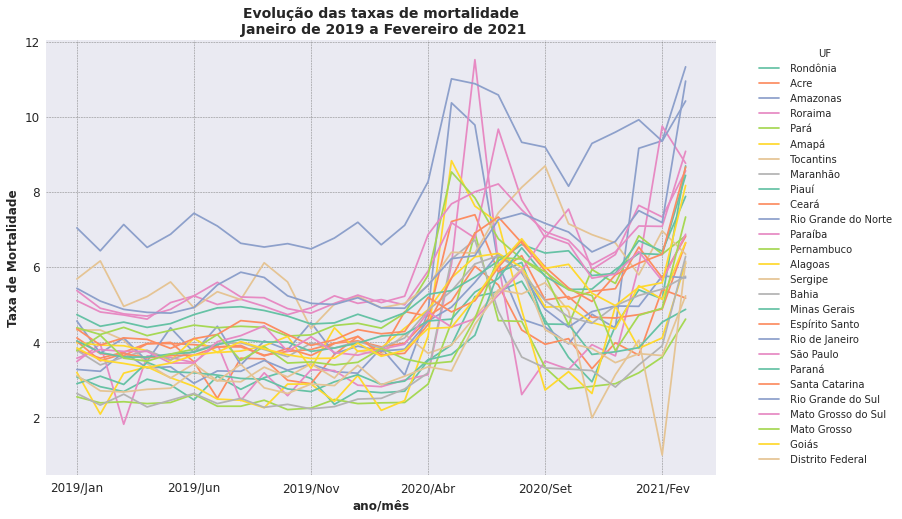

In [224]:
fig, ax = plt.subplots(figsize=(12,8)) 
taxa3.T.plot(ax=ax)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('ano/mês', weight='bold', fontsize=12)
plt.ylabel('Taxa de Mortalidade', weight='bold', fontsize=12)
plt.title('Evolução das taxas de mortalidade\n Janeiro de 2019 a Fevereiro de 2021', weight='bold', fontsize=14)
plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

Para facilitar a visualização, as regiões serão analisadas separadamente:

####**Região Norte**

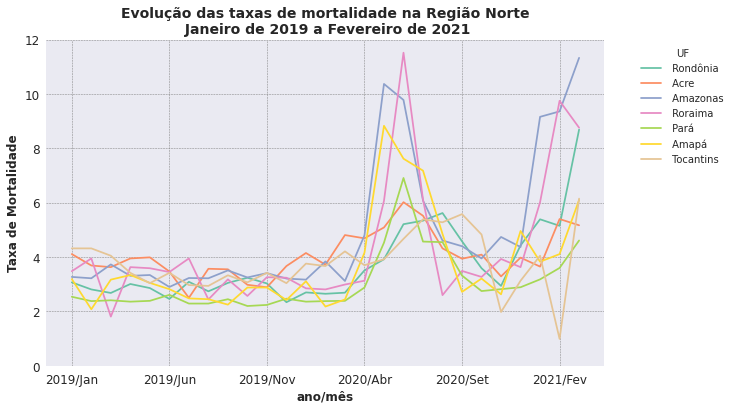

In [225]:
fig, ax = plt.subplots(figsize=(10,6)) 
taxa3.head(7).T.plot(ax=ax)
sns.set_palette(list(reversed(sns.color_palette('Set2', 7))))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('ano/mês', weight='bold', fontsize=12)
plt.ylabel('Taxa de Mortalidade', weight='bold', fontsize=12)
plt.title('Evolução das taxas de mortalidade na Região Norte\n Janeiro de 2019 a Fevereiro de 2021', weight='bold', fontsize=14)
plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylim(0, 12)
plt.show()

Na **Região Norte** há notadamente um **pico nas taxas de mortalidade** se iniciando em **abril de 2020** que se estende até o **final de julho**. **Outro pico** **começou a se desenvolver no final de 2020/início de 2021 em Roraima, Amazonas e Acre**.  

Amazonas vive uma grave crise, resultado do avanço da segunda onda do Sar-cov2 no final de 2020/início de 2021, após conviver com falta de oxigênio nos hospitais das redes pública e particular. 

Em janeiro de 2021, o Amazonas registrou média de 135 óbitos, o que fez o estado subir no ranking semanal, perdendo apenas para São Paulo - que tem população dez vezes maior. A taxa de mortalidade registrada no Amazonas é maior que a dos piores momentos da pandemia em países como a Itália, que viveram dias dramáticos em meados de 2020. 

[Fonte - Situação da Pandemia em Amazonas](https://www.cnnbrasil.com.br/nacional/2021/01/26/amazonas-se-torna-o-estado-com-maior-taxa-de-obitos-por-covid-19-no-brasil)

####**Região Nordeste**

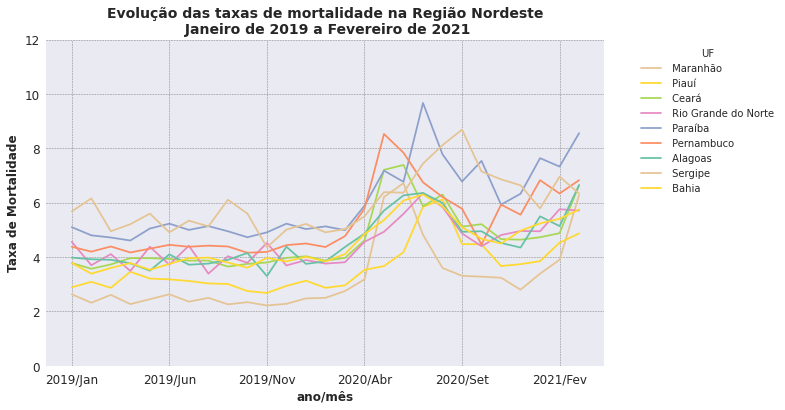

In [226]:
fig, ax = plt.subplots(figsize=(10,6)) 
taxa3[7:16].T.plot(ax=ax)
sns.set_palette(list(reversed(sns.color_palette('Set2', 7))))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('ano/mês', weight='bold', fontsize=12)
plt.ylabel('Taxa de Mortalidade', weight='bold', fontsize=12)
plt.title('Evolução das taxas de mortalidade na Região Nordeste\n Janeiro de 2019 a Fevereiro de 2021', weight='bold', fontsize=14)
plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylim(0, 12)
plt.show()

Na **Região Nordeste** há notadamente há **picos nas taxas de mortalidade** entre **abril - setembro de 2020**.

####**Região Sudeste**

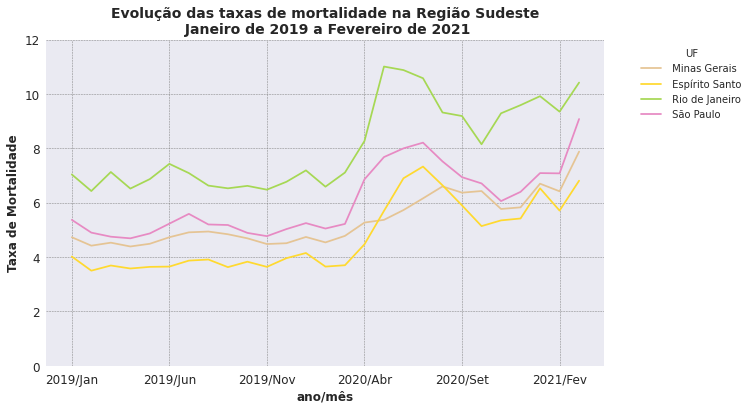

In [227]:
fig, ax = plt.subplots(figsize=(10,6)) 
taxa3[16:20].T.plot(ax=ax)
sns.set_palette(list(reversed(sns.color_palette('Set2', 7))))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('ano/mês', weight='bold', fontsize=12)
plt.ylabel('Taxa de Mortalidade', weight='bold', fontsize=12)
plt.title('Evolução das taxas de mortalidade na Região Sudeste\n Janeiro de 2019 a Fevereiro de 2021', weight='bold', fontsize=14)
plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylim(0, 12)
plt.show()

Na **Região Sudeste** há **picos nas taxas de mortalidade** entre **abril - setembro de 2020**. No **Rio de Janeiro** as **taxas seguem em alta** até o final do período analisado. Em **fevereiro de 2021** as **taxas voltam a subir**  em **todos os Estados**.

####**Região Sul**

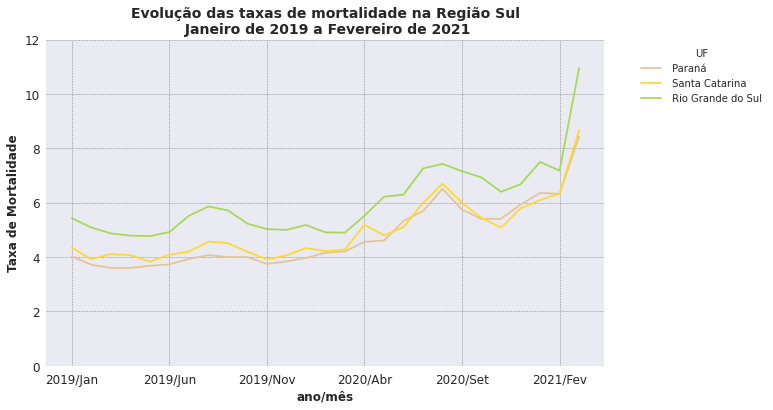

In [229]:
fig, ax = plt.subplots(figsize=(10,6)) 
taxa3[20:23].T.plot(ax=ax)
sns.set_palette(list(reversed(sns.color_palette('Set2', 7))))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('ano/mês', weight='bold', fontsize=12)
plt.ylabel('Taxa de Mortalidade', weight='bold', fontsize=12)
plt.title('Evolução das taxas de mortalidade na Região Sul\n Janeiro de 2019 a Fevereiro de 2021', weight='bold', fontsize=14)
plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylim(0, 12)
plt.show()

Na **Região Sul** há um **aumento nas taxas de mortalidade** **após julho de 2020** e em **fevereiro de 2021** temos um **aumento** notadamente maior em **todos os Estados**.

####**Região Centro-Oeste**

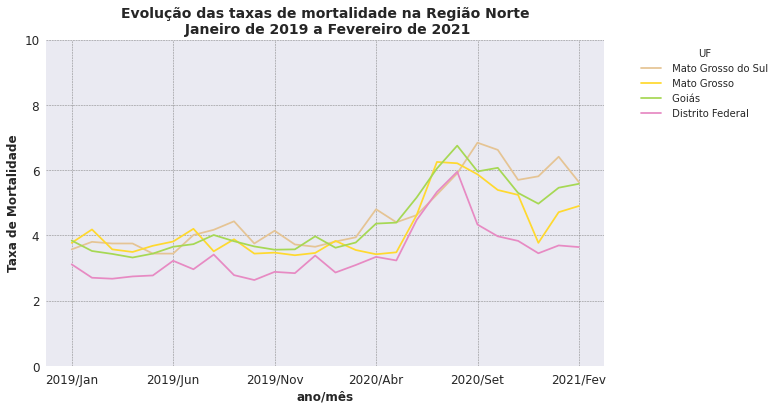

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) 
taxa4.tail(4).T.plot(ax=ax)
sns.set_palette(list(reversed(sns.color_palette('Set2', 7))))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('ano/mês', weight='bold', fontsize=12)
plt.ylabel('Taxa de Mortalidade', weight='bold', fontsize=12)
plt.title('Evolução das taxas de mortalidade na Região Norte\n Janeiro de 2019 a Fevereiro de 2021', weight='bold', fontsize=14)
plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylim(0, 10)
plt.show()

Na **Região Centro-Oeste** há notadamente há um **aumento nas taxas de mortalidade** **após julho de 2020**. **Após setembro de 2020** as **taxas** de mortalidade **começaram a cair no Distrito Federal**. 

#**Conclusões**

- Os **dados de gastos totais hospitalares** nos mostraram que no período de **fevereiro de 2008 a março de  2021** os **Estados** Brasileiros com **mais gastos** em **procedimentos hospitalares** foram: **São Paulo, Minas Gerais, Paraná, Rio Grande do Sul e Rio de Janeiro**. 


- Quando a análise foi feita por região foi possível observar que:

 **Região Sudeste:** **São Paulo** é o estado com **mais gastos hospitalares**, o que deve ser reflexo do grande tamanho populacional do estado. No **Rio de janeiro** pode-se destacar **picos de gastos** em alguns períodos como **final de 2009, fevereiro de 2013 e junho de 2016.**

 **Região Sul:** **Paraná e Rio Grande do Sul** tiveram **maiores gastos** no período analisado. No caso do Paraná há um aumento crescente dos gastos. Santa Catarina é o estado com menores gastos, provavelmente por ter a população menor que os outros estados da região Sul.
 
 **Região Centro-oeste:** **Goiás** é o estado com **maiores gastos**. Enquanto isso, Distrito Federal, Mato Grosso do Sul e Mato Grosso estão com os gastos extremamente similares ao longo do período analisado. O que faz sentido, já que Goiás é o estado mais populoso da região e os outros estados possuem as estimativas populacionais similares.
 
 **Região Norte:** **Pará** é o estado com **mais gastos hospitalares**. Pará e Amazonas possuem picos evidentes em 2020. Se olharmos com atenção vamos notar que **Amazonas possui um aumento de gastos ao longo do tempo analisado**, porém seus gastos estão próximos aos estados Rondônia e Tocantins, que possuem uma população consideravelmente menor (aproximadamente 2,5 vezes menor).

 **Região Nordeste:** **Bahia e Pernambuco** são os estados com **mais gastos hospitalares**. Temos picos em destaque nesse análise: Bahia (2008), Pernambuco (2008 e 2009), Alagoas (2014), todos os Estados (2020). O pico de Pernambuco em 2009 chama muita atenção, pois ele é um dos valores mais altos no gráfico. Sergipe é o estado menos populoso da região nordeste e por isso os gastos são tão baixos quando comparados aos outros estados da região.

- Porém, quando analisamos os **gastos por habitantes**, vemos que os **gastos não foram distribuídos na mesma proporção para todos os Estados em 2020**. Os **Estados que mais gastaram por número de habitantes** foram: **Paraná, Santa Catarina e Rio Grande do Sul**. Os Estados que menos gastaram por número de habitantes foram Sergipe, Acre e Amapá. Outro destaque dessa análise é o **Rio de Janeiro**, que **não segue o mesmo padrão de gastos por habitantes observados nos outros Estados da região Sudeste** e está com os gastos próximos a Rondônia e Amazonas.

- Finalmente, foi possível associar os **picos de gastos** nos gráficos há alguns **surtos de doenças**: 

  2008 - Bahia: Aumento nos casos de Meningite; Surto de doença de Chagas aguda associada à transmissão oral; Dengue

  2008 - Pernambuco: Casos de dengue 

  2008 - Rio de Janeiro: Casos de dengue 

  2009 - Pernambuco: Casos de Influenza e casos de leishmaniose tegumentar americana

  2013 - Rio de Janeiro: Casos de Dengue

  2014 - Alagoas: Casos de Dengue

  2016 - Rio de Janeiro: Casos de Dengue

  2019 - Rio de Janeiro: Casos de Dengue, Chikungunya e Zika vírus

  **2020 - Em todos os Estados: Pandemia do novo coronavírus (SARS-CoV-2)**. Os primeiros casos de  SARS-CoV-2 foram detectados em fevereiro de 2020. Já estamos em maio de 2021 e até o momento a pandemia não foi controlada. Até o momento (23/05/21), temos 16.047.439 de casos confirmados e 448.208 óbitos.
Durante esse período várias cidades tiveram o sistema de saúde colapsado, pois não havia disponibilidade de UTIs para internação.
De acordo com a Friocruz, trata-se do **maior colapso sanitário e hospitalar da história do Brasil**.

- **Quando comparamos os Estados com mais gastos hospitalares com aqueles com maior número de internações, vemos que os dados não mostram o mesmo resultado**.
Quando falamos em **mais gastos hospitalares** temos: **São Paulo, Minas Gerais, Paraná, Rio Grande do Sul e Rio de Janeiro**.
Já quando falamos em **número de internações** temos: **São Paulo, Minas Gerais, Bahia, Paraná e Rio Grande do Sul**. 
Portanto, quando analisamos o **número de internações** temos **Rio de Janeiro** em **sexto lugar**. 

- Os Estados com **maior número de internações por ano** (2008-2020) foram **São Paulo, Minas Gerais, Bahia, Paraná e Rio Grande do Sul**.

- Porém, quando analisamos a média de permanência (em dias) nas internações, vemos que o **Rio de Janeiro** é o estado onde os pacientes possuem **maior permanência** (8,5 dias). Enquanto isso, **Pará** é o estado com **menor permanência** (3,9 dias). 

- Os **Estados** que apresentam **maiores médias de permanência** nas internações são: **Rio de Janeiro, Distrito Federal, São Paulo, Rio Grande do Sul e Pernambuco**. 

  Quando observamos o gráfico por anos, vemos que no **Rio de Janeiro** há uma **queda ao longo dos anos na média de permanência das internações**. Porém, quando feita a análise de número de internações o Rio de Janeiro ficou em sexto lugar e apresentou pouca variação entre os números ao longo dos anos.

  **São Paulo** é o **Estado com maior número de internações do País**, **mas** na **média de permanência das internações** fica em **terceiro lugar**. 

- Os **estados** com **maior número de óbitos** no período de 2008 a março de 2021 são **São Paulo, Minas Gerais, Rio de Janeiro e Rio Grande do Sul.**

  Na **Região Norte** os Estados com **maior número de óbitos** são **Pará e Amazonas**.
Nesses Estados o número de óbitos teve um **aumento expressivo em 2020**. 

  Na **Região Nordeste** os Estados com **maior número de óbitos** são **Bahia e Pernambuco**.
Nos **Estados Maranhão, Ceará, Pernambuco e Bahia** o número de óbitos teve um **aumento expressivo em 2020**. 

  Na **Região Sudeste** os Estados com **maior número de óbitos** são **São Paulo e Rio de Janeiro**.
Nesses Estados o número de óbitos teve um **aumento considerável em 2020**. 

  Na **Região Sul** os Estados com **maior número de óbitos** são **Rio Grande do Sul e Paraná**. **Paraná** foi o estado com **maior aumento do número de óbitos** em **2020**.

  Na **Região Centro-Oeste** o Estado com **maior número de óbitos** é **Goiás**.
Destaque deve ser dado ao número de óbitos em Goiás em 2020, pois passou de 12.458 em 2019 para 15.194 em 2020. 

- Quando analisamos a taxa de mortalidade no período total vemos que o **Rio de Janeiro** é o estado que apresenta a **maior taxa de mortalidade no Brasil**, seguido de São Paulo, Rio Grande do Sul e Minas Gerais. O estados que apresentam **menor taxa de mortalidade** são **Pará e Maranhão**. 

- Em **2019** a **Taxas de Mortalidade** atingiram o **máximo de 6.82** (no **Rio de Janeiro**).A **menor Taxa** foi de **2.36 no Pará**. **Amazonas e Roraima** estavam entre os Estados com **menores taxas** de mortalidade (3.24 e 3.17, respectivamente).

- Porém, analisando o anos 2020 e 2021: fica claro que a **taxa de mortalidade dobrou em Amazonas** **em 2021** (Taxa de 10.82), quando comparado a 2020 (5.46), consequentemente se tornando o **Estado com maior taxa de mortalidade**. Além de Amazonas, **outros Estados tiveram aumentos significantes em 2021**: **Paraíba, Roraima, Rio Grande do Sul.**
O Rio de janeiro teve um aumento de 6.82 para 9.18 em 2020, mas teve uma pequena queda e ficou em segundo lugar em 2021. 

- Por fim, uma análise de correlação, mostrou que os Estados **Amazonas, Roraima e Rondônia, Paraná e Rio Grande do Sul** apresentam a mesma tendência de alto crescimento nas taxas de mortalidade a partir de 2019. 

- Para verificar em quais meses de 2020 e 2021 a Pandemia de SARS-CoV-2 pode ter causado aumento nas taxas de mortalidade, foram analisados os dados somente do período de janeiro de 2019 até fevereiro de 2021:

  Na **Região Norte** há notadamente um **pico nas taxas de mortalidade** se iniciando em **abril de 2020** que se estende até o **final de julho**. **Outro pico** **começou a se desenvolver no final de 2020/início de 2021 em Roraima, Amazonas e Acre**.  
 
  Na **Região Nordeste** há notadamente há **picos nas taxas de mortalidade** entre **abril - setembro de 2020**.
 
  Na **Região Sudeste** há notadamente há **picos nas taxas de mortalidade** entre **abril - setembro de 2020**. No **Rio de Janeiro** as **taxas seguem em alta** até o final do período analisado. 
 
  Na **Região Sul e na Região Centro-Oeste** há notadamente há um **aumento nas taxas de mortalidade após julho de 2020**. 

  Por fim, a maioria dos Estados, começa a sofrer um segundo pico de altas nas Taxas de Mortalidade no ínicio de 2021. 







#**Considerações finais**

Após todas as análises realizadas nesse projeto, foi possível verificar que o valor total em procedimentos hospitalares não está completamente relacionado ao número de internações. 

Além disso, verificamos a evolução das Taxas de Mortalidade no País e vimos como a Pandemia de  SARS-CoV-2 mudou o cenário e fez com que Amazonas se tornasse o Estado com maior Taxa de Mortalidade do País, mesmo tendo a população 10 vezes menor que o nosso Estado mais populoso: São Paulo. 

A situação de vários Estados, como  Roraima e Rondônia, Paraná e Rio Grande do Sul, é crítica nesse sentido, pois seguem o mesmo padrão de evolução nas taxas de mortalidade que Amazonas. 

Finalmente, mesmo com essa crise sanitária histórica no País, a distribuição dos gastos per capita em procedimentos hospitalares não é proporcional para todos os Estados. Amazonas, por exemplo, em 2020 apresentou cerca da metade dos gastos totais hospitalares por habitante, quando comparado aos estados com maiores gastos per capita: Paraná, Santa Catarina e Rio Grande do Sul. 

Todos os resultados obtidos com as análises desse projeto se tornarão ainda mais preocupantes no futuro, já que o orçamento destinado ao financiamento das ações e serviços de  saúde  para o ano de 2021, aprovado em março, é incompatível com os seus custos mínimos, ainda mais ao se considerar o crescimento exponencial da pandemia de  SARS-CoV-2. 



#**Referências**

[Banco de Dados Coronavírus - Brasil](https://covid.saude.gov.br/)

[IBGE](https://ftp.ibge.gov.br/Estimativas_de_Populacao/Estimativas_2020/estimativa_dou_2020.pdf) - Estimativa populacional brasileira em 2020

[Fiocruz](https://portal.fiocruz.br/) - Fundação Oswaldo Cruz

[SUS](http://conselho.saude.gov.br/ultimas-noticias-cns/1676-carta-aberta-do-cns-as-autoridades-do-legislativo-e-executivo-sobre-a-incompatibilidade-do-orcamento-do-sus-em-2021) - Carta aberta do CNS às autoridades do Legislativo e Executivo sobre a incompatibilidade do orçamento do SUS em 2021

[Tabnet - DATASUS](https://tabnet.datasus.gov.br/cgi/sih/Proced_hosp_loc_int_2008.pdf) - Procedimentos Hospitalares do SUS por local de internação – a partir de 2008




#**Documentação**

[Matplotlib](https://matplotlib.org/)

[Numpy](https://numpy.org/)

[Pandas](https://pandas.pydata.org/)

[Seaborn](https://seaborn.pydata.org/)

# **Agradecimentos**

Gostaria de deixar meu agradecimento aos instrutores do módulo 1 Thiago Gonçalves e Guilherme Silveira.



#**Onde encontrar meu trabalho?**

[LinkedIn](https://www.linkedin.com/in/valqu%C3%ADria-alencar-786a8911b/)

[ResearchGate](https://www.researchgate.net/profile/Valquiria-Alencar)

[Currículo lattes](http://lattes.cnpq.br/7742338443535710)

